In [94]:
import tensorflow
from tensorflow import keras

(train_set, test_set) = keras.datasets.mnist.load_data()
x_train_full, y_train_full = train_set
x_train, y_train = x_train_full[: 50000]/255.0, y_train_full[: 50000]
x_val, y_val = x_train_full[50000: ]/255.0, y_train_full[50000: ]
x_test, y_test = test_set
x_test = x_test/255.0

In [42]:
def get_model(n_hidden=1, n_neu=1, lr=0.001, input_shape=x_train.shape[1: ]):
    input_ = keras.layers.Input(shape=input_shape)
    flatten = keras.layers.Flatten()(input_)
    x = keras.layers.Dense(n_neu, activation="relu", name="h_1")(flatten)
    for n in range(2, n_hidden+1):
        x = keras.layers.Dense(n_neu, activation="relu", name="h_{}".format(n))(x)
    output = keras.layers.Dense(10, activation="softmax")(x)
    model = keras.Model(inputs=[input_], outputs=[output])
    
    optimizer = keras.optimizers.SGD(lr=lr)
    model.compile(loss="sparse_categorical_crossentropy", 
                 optimizer=optimizer,
                 metrics=["accuracy"])
    model.summary()
    return model

In [44]:
get_model(n_hidden=2, n_neu=200)

Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 28, 28)]          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
h_1 (Dense)                  (None, 200)               157000    
_________________________________________________________________
h_2 (Dense)                  (None, 200)               40200     
_________________________________________________________________
dense_22 (Dense)             (None, 10)                2010      
Total params: 199,210
Trainable params: 199,210
Non-trainable params: 0
_________________________________________________________________


In [45]:
keras_clf = keras.wrappers.scikit_learn.KerasClassifier(get_model)

In [47]:
import numpy as np
from sklearn.model_selection import GridSearchCV

param_grids = {
    "n_hidden" : [1, 2, 3],
    "n_neu" : np.arange(10, 400, 50),
    "lr" : [0.003, 0.005, 0.001, 0.0005]
}

grid_search = GridSearchCV(keras_clf, param_grids, cv=3)

In [52]:
import os
import time

dir_name = "my_logs"
dir_path = os.path.join(os.curdir, dir_name)
if os.path.exists(dir_path):
    pass
else:
    os.mkdir(dir_path)
    
def get_run_logdir():
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(dir_path, run_id)

In [53]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", 
                                               save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                 restore_best_weights=True)
run_logdir = get_run_logdir()
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

grid_search.fit(x_train, y_train, epochs=100,
               validation_data=(x_val, y_val),
               callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])

Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        [(None, 28, 28)]          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 784)               0         
_________________________________________________________________
h_1 (Dense)                  (None, 10)                7850      
_________________________________________________________________
dense_23 (Dense)             (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1042/1042 [==============================] - 1s 688us/step - loss: 10.4564 - accuracy: 0.1140
Epoch 2/100
1042/1042 [==============================] - 0s 478us/step - loss: 2.3018 - accuracy: 0.1120
Epoch 3/100
1042/1042 [====================

Epoch 25/100
1042/1042 [==============================] - 1s 483us/step - loss: 2.3013 - accuracy: 0.1130
Epoch 26/100
1042/1042 [==============================] - 1s 493us/step - loss: 2.3009 - accuracy: 0.1142
Epoch 27/100
1042/1042 [==============================] - 1s 480us/step - loss: 2.3008 - accuracy: 0.1162
Epoch 28/100
1042/1042 [==============================] - 1s 488us/step - loss: 2.3007 - accuracy: 0.1155
Epoch 29/100
1042/1042 [==============================] - 1s 488us/step - loss: 2.3010 - accuracy: 0.1144
Epoch 30/100
1042/1042 [==============================] - 0s 478us/step - loss: 2.3006 - accuracy: 0.1159
Epoch 31/100
1042/1042 [==============================] - 1s 483us/step - loss: 2.3009 - accuracy: 0.1147
Epoch 32/100
1042/1042 [==============================] - 1s 508us/step - loss: 2.3010 - accuracy: 0.1138
Epoch 33/100
1042/1042 [==============================] - 1s 492us/step - loss: 2.3014 - accuracy: 0.1111
Epoch 34/100
1042/1042 [======================

Epoch 51/100
1042/1042 [==============================] - 1s 499us/step - loss: 2.3016 - accuracy: 0.1109
Epoch 52/100
1042/1042 [==============================] - 1s 513us/step - loss: 2.3012 - accuracy: 0.1120
Epoch 53/100
1042/1042 [==============================] - 1s 507us/step - loss: 2.3011 - accuracy: 0.1140
Epoch 54/100
1042/1042 [==============================] - 1s 513us/step - loss: 2.3010 - accuracy: 0.1136
Epoch 55/100
1042/1042 [==============================] - 1s 522us/step - loss: 2.3013 - accuracy: 0.1141
Epoch 56/100
1042/1042 [==============================] - 1s 513us/step - loss: 2.3012 - accuracy: 0.1143
Epoch 57/100
1042/1042 [==============================] - 1s 519us/step - loss: 2.3014 - accuracy: 0.1101
Epoch 58/100
1042/1042 [==============================] - 1s 486us/step - loss: 2.3012 - accuracy: 0.1140
Epoch 59/100
1042/1042 [==============================] - 1s 501us/step - loss: 2.3017 - accuracy: 0.1097
Epoch 60/100
1042/1042 [======================

1042/1042 [==============================] - 1s 490us/step - loss: 2.3011 - accuracy: 0.1148
Epoch 78/100
1042/1042 [==============================] - 1s 496us/step - loss: 2.3012 - accuracy: 0.1125
Epoch 79/100
1042/1042 [==============================] - 1s 481us/step - loss: 2.3008 - accuracy: 0.1166
Epoch 80/100
1042/1042 [==============================] - 1s 493us/step - loss: 2.3011 - accuracy: 0.1136
Epoch 81/100
1042/1042 [==============================] - 1s 540us/step - loss: 2.3014 - accuracy: 0.1144
Epoch 82/100
1042/1042 [==============================] - 1s 502us/step - loss: 2.3008 - accuracy: 0.1155
Epoch 83/100
1042/1042 [==============================] - 1s 527us/step - loss: 2.3010 - accuracy: 0.1141
Epoch 84/100
1042/1042 [==============================] - 1s 509us/step - loss: 2.3012 - accuracy: 0.1142
Epoch 85/100
1042/1042 [==============================] - 1s 520us/step - loss: 2.3007 - accuracy: 0.1150
Epoch 86/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 906us/step - loss: 5.8158 - accuracy: 0.1112
Epoch 2/100
1042/1042 [==============================] - 1s 503us/step - loss: 2.3019 - accuracy: 0.1095
Epoch 3/100
1042/1042 [==============================] - 1s 515us/step - loss: 2.3013 - accuracy: 0.1114
Epoch 4/100
1042/1042 [==============================] - 1s 510us/step - loss: 2.3010 - accuracy: 0.1143
Epoch 5/100
1042/1042 [==============================] - 1s 521us/step - loss: 2.3008 - accuracy: 0.1128
Epoch 6/100
1042/1042 [==============================] - 1s 496us/step - loss: 2.3005 - accuracy: 0.1162
Epoch 7/100
1042/1042 [==============================] - 1s 512us/step - loss: 2.3012 - accuracy: 0.1115
Epoch 8/100
1042/1042 [==============================] - 1s 482us/step - loss: 2.3014 - accuracy: 0.1082
Epoch 9/100
1042/1042 [==============================] - 1s 494us/step - loss: 2.3008 - accuracy: 0.1129
Epoch 10/100
1042/1042 [==============================] - 1s 494us/

1042/1042 [==============================] - 1s 522us/step - loss: 2.3007 - accuracy: 0.1150
Epoch 28/100
1042/1042 [==============================] - 1s 524us/step - loss: 2.3012 - accuracy: 0.1123
Epoch 29/100
1042/1042 [==============================] - 1s 508us/step - loss: 2.3010 - accuracy: 0.1123
Epoch 30/100
1042/1042 [==============================] - 1s 552us/step - loss: 2.3013 - accuracy: 0.1140
Epoch 31/100
1042/1042 [==============================] - 1s 520us/step - loss: 2.3004 - accuracy: 0.1141
Epoch 32/100
1042/1042 [==============================] - 1s 499us/step - loss: 2.3009 - accuracy: 0.1126
Epoch 33/100
1042/1042 [==============================] - 1s 512us/step - loss: 2.3006 - accuracy: 0.1146
Epoch 34/100
1042/1042 [==============================] - 1s 526us/step - loss: 2.3007 - accuracy: 0.1153
Epoch 35/100
1042/1042 [==============================] - 1s 507us/step - loss: 2.3011 - accuracy: 0.1117
Epoch 36/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 508us/step - loss: 2.3008 - accuracy: 0.1126
Epoch 54/100
1042/1042 [==============================] - 1s 492us/step - loss: 2.3009 - accuracy: 0.1128
Epoch 55/100
1042/1042 [==============================] - 1s 530us/step - loss: 2.3008 - accuracy: 0.1124
Epoch 56/100
1042/1042 [==============================] - 1s 492us/step - loss: 2.3013 - accuracy: 0.1130
Epoch 57/100
1042/1042 [==============================] - 1s 485us/step - loss: 2.3007 - accuracy: 0.1161
Epoch 58/100
1042/1042 [==============================] - 1s 492us/step - loss: 2.3008 - accuracy: 0.1145
Epoch 59/100
1042/1042 [==============================] - 1s 483us/step - loss: 2.3001 - accuracy: 0.1182
Epoch 60/100
1042/1042 [==============================] - 1s 487us/step - loss: 2.3009 - accuracy: 0.1126
Epoch 61/100
1042/1042 [==============================] - 1s 487us/step - loss: 2.3011 - accuracy: 0.1121
Epoch 62/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 503us/step - loss: 2.3012 - accuracy: 0.1114
Epoch 80/100
1042/1042 [==============================] - 1s 693us/step - loss: 2.3007 - accuracy: 0.1166
Epoch 81/100
1042/1042 [==============================] - 1s 486us/step - loss: 2.3014 - accuracy: 0.1139
Epoch 82/100
1042/1042 [==============================] - 1s 490us/step - loss: 2.3006 - accuracy: 0.1137
Epoch 83/100
1042/1042 [==============================] - 1s 491us/step - loss: 2.3006 - accuracy: 0.1122
Epoch 84/100
1042/1042 [==============================] - 1s 496us/step - loss: 2.3002 - accuracy: 0.1192
Epoch 85/100
1042/1042 [==============================] - 1s 489us/step - loss: 2.3007 - accuracy: 0.1129
Epoch 86/100
1042/1042 [==============================] - 1s 486us/step - loss: 2.3010 - accuracy: 0.1122
Epoch 87/100
1042/1042 [==============================] - 1s 497us/step - loss: 2.3008 - accuracy: 0.1146
Epoch 88/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 499us/step - loss: 2.3016 - accuracy: 0.1146
Epoch 3/100
1042/1042 [==============================] - 1s 507us/step - loss: 2.3013 - accuracy: 0.1141
Epoch 4/100
1042/1042 [==============================] - 1s 496us/step - loss: 2.3011 - accuracy: 0.1153
Epoch 5/100
1042/1042 [==============================] - 1s 503us/step - loss: 2.3008 - accuracy: 0.1128
Epoch 6/100
1042/1042 [==============================] - 1s 504us/step - loss: 2.3011 - accuracy: 0.1146
Epoch 7/100
1042/1042 [==============================] - 1s 486us/step - loss: 2.3008 - accuracy: 0.1164
Epoch 8/100
1042/1042 [==============================] - 0s 478us/step - loss: 2.3009 - accuracy: 0.1135
Epoch 9/100
1042/1042 [==============================] - 0s 478us/step - loss: 2.3017 - accuracy: 0.1104
Epoch 10/100
1042/1042 [==============================] - 0s 471us/step - loss: 2.3006 - accuracy: 0.1146
Epoch 11/100
1042/1042 [==============================] - 0s 473us

1042/1042 [==============================] - 0s 468us/step - loss: 2.3010 - accuracy: 0.1132
Epoch 29/100
1042/1042 [==============================] - 0s 470us/step - loss: 2.3008 - accuracy: 0.1151
Epoch 30/100
1042/1042 [==============================] - 0s 478us/step - loss: 2.3007 - accuracy: 0.1162
Epoch 31/100
1042/1042 [==============================] - 0s 468us/step - loss: 2.3009 - accuracy: 0.1147
Epoch 32/100
1042/1042 [==============================] - 0s 465us/step - loss: 2.3011 - accuracy: 0.1133
Epoch 33/100
1042/1042 [==============================] - 0s 473us/step - loss: 2.3009 - accuracy: 0.1134
Epoch 34/100
1042/1042 [==============================] - 0s 472us/step - loss: 2.3011 - accuracy: 0.1135
Epoch 35/100
1042/1042 [==============================] - 0s 469us/step - loss: 2.3007 - accuracy: 0.1147
Epoch 36/100
1042/1042 [==============================] - 0s 471us/step - loss: 2.3009 - accuracy: 0.1140
Epoch 37/100
1042/1042 [==============================] - 0

1042/1042 [==============================] - 1s 482us/step - loss: 2.3005 - accuracy: 0.1173
Epoch 55/100
1042/1042 [==============================] - 0s 475us/step - loss: 2.3011 - accuracy: 0.1135
Epoch 56/100
1042/1042 [==============================] - 1s 482us/step - loss: 2.3014 - accuracy: 0.1126
Epoch 57/100
1042/1042 [==============================] - 1s 483us/step - loss: 2.3011 - accuracy: 0.1132
Epoch 58/100
1042/1042 [==============================] - 0s 471us/step - loss: 2.3011 - accuracy: 0.1145
Epoch 59/100
1042/1042 [==============================] - 1s 528us/step - loss: 2.3012 - accuracy: 0.1126
Epoch 60/100
1042/1042 [==============================] - 1s 532us/step - loss: 2.3005 - accuracy: 0.1172
Epoch 61/100
1042/1042 [==============================] - 1s 538us/step - loss: 2.3004 - accuracy: 0.1143
Epoch 62/100
1042/1042 [==============================] - 1s 502us/step - loss: 2.3008 - accuracy: 0.1143
Epoch 63/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 497us/step - loss: 2.3011 - accuracy: 0.1128
Epoch 81/100
1042/1042 [==============================] - 1s 482us/step - loss: 2.3006 - accuracy: 0.1147
Epoch 82/100
1042/1042 [==============================] - 1s 486us/step - loss: 2.3008 - accuracy: 0.1144
Epoch 83/100
1042/1042 [==============================] - 1s 485us/step - loss: 2.3011 - accuracy: 0.1136
Epoch 84/100
1042/1042 [==============================] - 0s 474us/step - loss: 2.3011 - accuracy: 0.1141
Epoch 85/100
1042/1042 [==============================] - 0s 477us/step - loss: 2.3008 - accuracy: 0.1140
Epoch 86/100
1042/1042 [==============================] - 1s 485us/step - loss: 2.3009 - accuracy: 0.1128
Epoch 87/100
1042/1042 [==============================] - 1s 480us/step - loss: 2.3008 - accuracy: 0.1140
Epoch 88/100
1042/1042 [==============================] - 1s 503us/step - loss: 2.3009 - accuracy: 0.1161
Epoch 89/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 579us/step - loss: 1.0833 - accuracy: 0.6482
Epoch 4/100
1042/1042 [==============================] - 1s 577us/step - loss: 0.9110 - accuracy: 0.7265
Epoch 5/100
1042/1042 [==============================] - 1s 583us/step - loss: 0.7379 - accuracy: 0.8203
Epoch 6/100
1042/1042 [==============================] - 1s 576us/step - loss: 0.6192 - accuracy: 0.8546
Epoch 7/100
1042/1042 [==============================] - 1s 579us/step - loss: 0.5638 - accuracy: 0.8675
Epoch 8/100
1042/1042 [==============================] - 1s 619us/step - loss: 0.5425 - accuracy: 0.8726
Epoch 9/100
1042/1042 [==============================] - 1s 597us/step - loss: 0.4947 - accuracy: 0.8832
Epoch 10/100
1042/1042 [==============================] - 1s 600us/step - loss: 0.4494 - accuracy: 0.8949
Epoch 11/100
1042/1042 [==============================] - 1s 642us/step - loss: 0.4227 - accuracy: 0.9006
Epoch 12/100
1042/1042 [==============================] - 1s 653u

1042/1042 [==============================] - 1s 607us/step - loss: 0.3045 - accuracy: 0.9251
Epoch 30/100
1042/1042 [==============================] - 1s 575us/step - loss: 0.2978 - accuracy: 0.9289
Epoch 31/100
1042/1042 [==============================] - 1s 576us/step - loss: 0.2835 - accuracy: 0.9285
Epoch 32/100
1042/1042 [==============================] - 1s 576us/step - loss: 0.2844 - accuracy: 0.9284
Epoch 33/100
1042/1042 [==============================] - 1s 580us/step - loss: 0.2827 - accuracy: 0.9320
Epoch 34/100
1042/1042 [==============================] - 1s 627us/step - loss: 0.2868 - accuracy: 0.9304
Epoch 35/100
1042/1042 [==============================] - 1s 618us/step - loss: 0.2766 - accuracy: 0.9333
Epoch 36/100
1042/1042 [==============================] - 1s 627us/step - loss: 0.2816 - accuracy: 0.9313
Epoch 37/100
1042/1042 [==============================] - 1s 631us/step - loss: 0.2598 - accuracy: 0.9357
Epoch 38/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 609us/step - loss: 0.2494 - accuracy: 0.9388
Epoch 56/100
1042/1042 [==============================] - 1s 601us/step - loss: 0.2287 - accuracy: 0.9446
Epoch 57/100
1042/1042 [==============================] - 1s 577us/step - loss: 0.2303 - accuracy: 0.9429
Epoch 58/100
1042/1042 [==============================] - 1s 567us/step - loss: 0.2460 - accuracy: 0.9400
Epoch 59/100
1042/1042 [==============================] - 1s 566us/step - loss: 0.2330 - accuracy: 0.9418
Epoch 60/100
1042/1042 [==============================] - 1s 581us/step - loss: 0.2252 - accuracy: 0.9443
Epoch 61/100
1042/1042 [==============================] - 1s 574us/step - loss: 0.2586 - accuracy: 0.9373
Epoch 62/100
1042/1042 [==============================] - 1s 579us/step - loss: 0.2449 - accuracy: 0.9398
Epoch 63/100
1042/1042 [==============================] - 1s 577us/step - loss: 0.2451 - accuracy: 0.9407
Epoch 64/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 597us/step - loss: 0.2173 - accuracy: 0.9468
Epoch 82/100
1042/1042 [==============================] - 1s 596us/step - loss: 0.2365 - accuracy: 0.9425
Epoch 83/100
1042/1042 [==============================] - 1s 579us/step - loss: 0.2172 - accuracy: 0.9462
Epoch 84/100
1042/1042 [==============================] - 1s 578us/step - loss: 0.2170 - accuracy: 0.9479
Epoch 85/100
1042/1042 [==============================] - 1s 590us/step - loss: 0.2210 - accuracy: 0.9459
Epoch 86/100
1042/1042 [==============================] - 1s 571us/step - loss: 0.2087 - accuracy: 0.9488
Epoch 87/100
1042/1042 [==============================] - 1s 588us/step - loss: 0.2090 - accuracy: 0.9478
Epoch 88/100
1042/1042 [==============================] - 1s 659us/step - loss: 0.2237 - accuracy: 0.9431
Epoch 89/100
1042/1042 [==============================] - 1s 646us/step - loss: 0.2203 - accuracy: 0.9451
Epoch 90/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 637us/step - loss: 1.7352 - accuracy: 0.3381
Epoch 5/100
1042/1042 [==============================] - 1s 637us/step - loss: 1.6714 - accuracy: 0.3624
Epoch 6/100
1042/1042 [==============================] - 1s 653us/step - loss: 1.5184 - accuracy: 0.4260
Epoch 7/100
1042/1042 [==============================] - 1s 650us/step - loss: 1.4639 - accuracy: 0.4384
Epoch 8/100
1042/1042 [==============================] - 1s 604us/step - loss: 1.4280 - accuracy: 0.4528
Epoch 9/100
1042/1042 [==============================] - 1s 627us/step - loss: 1.4059 - accuracy: 0.4612
Epoch 10/100
1042/1042 [==============================] - 1s 653us/step - loss: 1.3859 - accuracy: 0.4722
Epoch 11/100
1042/1042 [==============================] - 1s 634us/step - loss: 1.3470 - accuracy: 0.4867
Epoch 12/100
1042/1042 [==============================] - 1s 626us/step - loss: 1.3483 - accuracy: 0.4788
Epoch 13/100
1042/1042 [==============================] - 1s 759

1042/1042 [==============================] - 1s 629us/step - loss: 1.0634 - accuracy: 0.6199
Epoch 31/100
1042/1042 [==============================] - 1s 623us/step - loss: 1.0436 - accuracy: 0.6353
Epoch 32/100
1042/1042 [==============================] - 1s 628us/step - loss: 1.0203 - accuracy: 0.6421
Epoch 33/100
1042/1042 [==============================] - 1s 611us/step - loss: 1.0477 - accuracy: 0.6447
Epoch 34/100
1042/1042 [==============================] - 1s 599us/step - loss: 1.0194 - accuracy: 0.6468
Epoch 35/100
1042/1042 [==============================] - 1s 596us/step - loss: 1.0266 - accuracy: 0.6364
Epoch 36/100
1042/1042 [==============================] - 1s 609us/step - loss: 1.0851 - accuracy: 0.6277
Epoch 37/100
1042/1042 [==============================] - 1s 601us/step - loss: 1.0971 - accuracy: 0.6187
Epoch 38/100
1042/1042 [==============================] - 1s 590us/step - loss: 1.0989 - accuracy: 0.6248
Epoch 39/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 628us/step - loss: 0.8550 - accuracy: 0.7191
Epoch 57/100
1042/1042 [==============================] - 1s 620us/step - loss: 0.8778 - accuracy: 0.7145
Epoch 58/100
1042/1042 [==============================] - 1s 621us/step - loss: 0.8920 - accuracy: 0.7132
Epoch 59/100
1042/1042 [==============================] - 1s 612us/step - loss: 0.9657 - accuracy: 0.6881
Epoch 60/100
1042/1042 [==============================] - 1s 602us/step - loss: 0.9517 - accuracy: 0.7005
Epoch 61/100
1042/1042 [==============================] - 1s 615us/step - loss: 0.8588 - accuracy: 0.7098
Epoch 62/100
1042/1042 [==============================] - 1s 582us/step - loss: 0.8550 - accuracy: 0.7125
Epoch 63/100
1042/1042 [==============================] - 1s 585us/step - loss: 0.8336 - accuracy: 0.7139
Epoch 64/100
1042/1042 [==============================] - 1s 584us/step - loss: 0.8637 - accuracy: 0.7125
Epoch 65/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 585us/step - loss: 0.5548 - accuracy: 0.8363
Epoch 83/100
1042/1042 [==============================] - 1s 593us/step - loss: 0.5126 - accuracy: 0.8581
Epoch 84/100
1042/1042 [==============================] - 1s 585us/step - loss: 0.5411 - accuracy: 0.8511
Epoch 85/100
1042/1042 [==============================] - 1s 680us/step - loss: 0.5439 - accuracy: 0.8448
Epoch 86/100
1042/1042 [==============================] - 1s 603us/step - loss: 0.5783 - accuracy: 0.8348
Epoch 87/100
1042/1042 [==============================] - 1s 592us/step - loss: 0.5027 - accuracy: 0.8604
Epoch 88/100
1042/1042 [==============================] - 1s 583us/step - loss: 0.5604 - accuracy: 0.8446
Epoch 89/100
1042/1042 [==============================] - 1s 584us/step - loss: 0.5483 - accuracy: 0.8436
Epoch 90/100
1042/1042 [==============================] - 1s 586us/step - loss: 0.4985 - accuracy: 0.8618
Epoch 91/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 598us/step - loss: 1.3630 - accuracy: 0.4908
Epoch 6/100
1042/1042 [==============================] - 1s 594us/step - loss: 1.2667 - accuracy: 0.5240
Epoch 7/100
1042/1042 [==============================] - 1s 590us/step - loss: 1.2123 - accuracy: 0.5389
Epoch 8/100
1042/1042 [==============================] - 1s 586us/step - loss: 1.1846 - accuracy: 0.5477
Epoch 9/100
1042/1042 [==============================] - 1s 600us/step - loss: 1.1645 - accuracy: 0.5454
Epoch 10/100
1042/1042 [==============================] - 1s 597us/step - loss: 1.1510 - accuracy: 0.5549
Epoch 11/100
1042/1042 [==============================] - 1s 591us/step - loss: 1.1405 - accuracy: 0.5621
Epoch 12/100
1042/1042 [==============================] - 1s 587us/step - loss: 1.1240 - accuracy: 0.5643
Epoch 13/100
1042/1042 [==============================] - 1s 586us/step - loss: 1.1268 - accuracy: 0.5586
Epoch 14/100
1042/1042 [==============================] - 1s 58

1042/1042 [==============================] - 1s 613us/step - loss: 0.8396 - accuracy: 0.7022
Epoch 32/100
1042/1042 [==============================] - 1s 628us/step - loss: 0.8509 - accuracy: 0.6847
Epoch 33/100
1042/1042 [==============================] - 1s 630us/step - loss: 0.9600 - accuracy: 0.6521
Epoch 34/100
1042/1042 [==============================] - 1s 626us/step - loss: 0.8292 - accuracy: 0.6829
Epoch 35/100
1042/1042 [==============================] - 1s 626us/step - loss: 0.8169 - accuracy: 0.6829
Epoch 36/100
1042/1042 [==============================] - 1s 622us/step - loss: 0.8168 - accuracy: 0.6884
Epoch 37/100
1042/1042 [==============================] - 1s 605us/step - loss: 0.8357 - accuracy: 0.6909
Epoch 38/100
1042/1042 [==============================] - 1s 608us/step - loss: 0.8210 - accuracy: 0.6966
Epoch 39/100
1042/1042 [==============================] - 1s 600us/step - loss: 0.8117 - accuracy: 0.7018
Epoch 40/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 620us/step - loss: 0.7206 - accuracy: 0.7930
Epoch 58/100
1042/1042 [==============================] - 1s 601us/step - loss: 0.8798 - accuracy: 0.6992
Epoch 59/100
1042/1042 [==============================] - 1s 601us/step - loss: 0.8384 - accuracy: 0.6993
Epoch 60/100
1042/1042 [==============================] - 1s 601us/step - loss: 0.8058 - accuracy: 0.7079
Epoch 61/100
1042/1042 [==============================] - 1s 583us/step - loss: 0.8315 - accuracy: 0.6952
Epoch 62/100
1042/1042 [==============================] - 1s 584us/step - loss: 0.7814 - accuracy: 0.7199
Epoch 63/100
1042/1042 [==============================] - 1s 577us/step - loss: 0.8030 - accuracy: 0.7149
Epoch 64/100
1042/1042 [==============================] - 1s 603us/step - loss: 0.7712 - accuracy: 0.7229
Epoch 65/100
1042/1042 [==============================] - 1s 592us/step - loss: 0.7935 - accuracy: 0.7135
Epoch 66/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 599us/step - loss: 0.7238 - accuracy: 0.7909
Epoch 84/100
1042/1042 [==============================] - 1s 580us/step - loss: 0.6434 - accuracy: 0.8159
Epoch 85/100
1042/1042 [==============================] - 1s 608us/step - loss: 0.5732 - accuracy: 0.8286
Epoch 86/100
1042/1042 [==============================] - 1s 592us/step - loss: 0.5957 - accuracy: 0.8114
Epoch 87/100
1042/1042 [==============================] - 1s 606us/step - loss: 0.6224 - accuracy: 0.8167
Epoch 88/100
1042/1042 [==============================] - 1s 605us/step - loss: 0.6191 - accuracy: 0.8187
Epoch 89/100
1042/1042 [==============================] - 1s 617us/step - loss: 0.5759 - accuracy: 0.8174
Epoch 90/100
1042/1042 [==============================] - 1s 590us/step - loss: 0.6577 - accuracy: 0.8127
Epoch 91/100
1042/1042 [==============================] - 1s 615us/step - loss: 0.6475 - accuracy: 0.8025
Epoch 92/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 621us/step - loss: 0.5898 - accuracy: 0.8387
Epoch 7/100
1042/1042 [==============================] - 1s 608us/step - loss: 0.5343 - accuracy: 0.8707
Epoch 8/100
1042/1042 [==============================] - 1s 616us/step - loss: 0.4683 - accuracy: 0.8925
Epoch 9/100
1042/1042 [==============================] - 1s 615us/step - loss: 0.4072 - accuracy: 0.9077
Epoch 10/100
1042/1042 [==============================] - 1s 605us/step - loss: 0.3848 - accuracy: 0.9115
Epoch 11/100
1042/1042 [==============================] - 1s 610us/step - loss: 0.3743 - accuracy: 0.9152
Epoch 12/100
1042/1042 [==============================] - 1s 607us/step - loss: 0.3525 - accuracy: 0.9183
Epoch 13/100
1042/1042 [==============================] - 1s 606us/step - loss: 0.3610 - accuracy: 0.9132
Epoch 14/100
1042/1042 [==============================] - 1s 612us/step - loss: 0.3271 - accuracy: 0.9224
Epoch 15/100
1042/1042 [==============================] - 1s 7

1042/1042 [==============================] - 1s 612us/step - loss: 0.2326 - accuracy: 0.9419
Epoch 33/100
1042/1042 [==============================] - 1s 609us/step - loss: 0.2273 - accuracy: 0.9432
Epoch 34/100
1042/1042 [==============================] - 1s 629us/step - loss: 0.2316 - accuracy: 0.9419
Epoch 35/100
1042/1042 [==============================] - 1s 623us/step - loss: 0.2241 - accuracy: 0.9441
Epoch 36/100
1042/1042 [==============================] - 1s 612us/step - loss: 0.2206 - accuracy: 0.9436
Epoch 37/100
1042/1042 [==============================] - 1s 616us/step - loss: 0.2135 - accuracy: 0.9477
Epoch 38/100
1042/1042 [==============================] - 1s 630us/step - loss: 0.2343 - accuracy: 0.9418
Epoch 39/100
1042/1042 [==============================] - 1s 633us/step - loss: 0.2097 - accuracy: 0.9463
Epoch 40/100
1042/1042 [==============================] - 1s 610us/step - loss: 0.2233 - accuracy: 0.9429
Epoch 41/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 626us/step - loss: 0.1793 - accuracy: 0.9561
Epoch 59/100
1042/1042 [==============================] - 1s 622us/step - loss: 0.1669 - accuracy: 0.9563
Epoch 60/100
1042/1042 [==============================] - 1s 619us/step - loss: 0.1712 - accuracy: 0.9563
Epoch 61/100
1042/1042 [==============================] - 1s 635us/step - loss: 0.1766 - accuracy: 0.9572
Epoch 62/100
1042/1042 [==============================] - 1s 643us/step - loss: 0.1572 - accuracy: 0.9586
Epoch 63/100
1042/1042 [==============================] - 1s 638us/step - loss: 0.1697 - accuracy: 0.9551
Epoch 64/100
1042/1042 [==============================] - 1s 634us/step - loss: 0.1676 - accuracy: 0.9577
Epoch 65/100
1042/1042 [==============================] - 1s 646us/step - loss: 0.1843 - accuracy: 0.9542
Epoch 66/100
1042/1042 [==============================] - 1s 629us/step - loss: 0.1585 - accuracy: 0.9582
Epoch 67/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 638us/step - loss: 0.1405 - accuracy: 0.9635
Epoch 85/100
1042/1042 [==============================] - 1s 625us/step - loss: 0.1374 - accuracy: 0.9647
Epoch 86/100
1042/1042 [==============================] - 1s 619us/step - loss: 0.1397 - accuracy: 0.9637
Epoch 87/100
1042/1042 [==============================] - 1s 622us/step - loss: 0.1345 - accuracy: 0.9650
Epoch 88/100
1042/1042 [==============================] - 1s 622us/step - loss: 0.1307 - accuracy: 0.9674
Epoch 89/100
1042/1042 [==============================] - 1s 625us/step - loss: 0.1238 - accuracy: 0.9673
Epoch 90/100
1042/1042 [==============================] - 1s 617us/step - loss: 0.1334 - accuracy: 0.9649
Epoch 91/100
1042/1042 [==============================] - 1s 620us/step - loss: 0.1358 - accuracy: 0.9663
Epoch 92/100
1042/1042 [==============================] - 1s 621us/step - loss: 0.1284 - accuracy: 0.9660
Epoch 93/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 631us/step - loss: 0.5497 - accuracy: 0.8589
Epoch 8/100
1042/1042 [==============================] - 1s 626us/step - loss: 0.4740 - accuracy: 0.8940
Epoch 9/100
1042/1042 [==============================] - 1s 637us/step - loss: 0.4527 - accuracy: 0.8986
Epoch 10/100
1042/1042 [==============================] - 1s 630us/step - loss: 0.4148 - accuracy: 0.9091
Epoch 11/100
1042/1042 [==============================] - 1s 628us/step - loss: 0.4079 - accuracy: 0.9105
Epoch 12/100
1042/1042 [==============================] - 1s 629us/step - loss: 0.3691 - accuracy: 0.9189
Epoch 13/100
1042/1042 [==============================] - 1s 630us/step - loss: 0.3600 - accuracy: 0.9184
Epoch 14/100
1042/1042 [==============================] - 1s 625us/step - loss: 0.3487 - accuracy: 0.9176
Epoch 15/100
1042/1042 [==============================] - 1s 639us/step - loss: 0.3127 - accuracy: 0.9271
Epoch 16/100
1042/1042 [==============================] - 1s 

1042/1042 [==============================] - 1s 649us/step - loss: 0.2283 - accuracy: 0.9443
Epoch 34/100
1042/1042 [==============================] - 1s 645us/step - loss: 0.2397 - accuracy: 0.9426
Epoch 35/100
1042/1042 [==============================] - 1s 627us/step - loss: 0.2172 - accuracy: 0.9454
Epoch 36/100
1042/1042 [==============================] - 1s 645us/step - loss: 0.2490 - accuracy: 0.9406
Epoch 37/100
1042/1042 [==============================] - 1s 643us/step - loss: 0.2099 - accuracy: 0.9494
Epoch 38/100
1042/1042 [==============================] - 1s 627us/step - loss: 0.2064 - accuracy: 0.9495
Epoch 39/100
1042/1042 [==============================] - 1s 625us/step - loss: 0.2044 - accuracy: 0.9505
Epoch 40/100
1042/1042 [==============================] - 1s 629us/step - loss: 0.2153 - accuracy: 0.9495
Epoch 41/100
1042/1042 [==============================] - 1s 626us/step - loss: 0.2118 - accuracy: 0.9479
Epoch 42/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 626us/step - loss: 0.1709 - accuracy: 0.9589
Epoch 60/100
1042/1042 [==============================] - 1s 623us/step - loss: 0.1534 - accuracy: 0.9604
Epoch 61/100
1042/1042 [==============================] - 1s 626us/step - loss: 0.1567 - accuracy: 0.9619
Epoch 62/100
1042/1042 [==============================] - 1s 614us/step - loss: 0.1644 - accuracy: 0.9583
Epoch 63/100
1042/1042 [==============================] - 1s 630us/step - loss: 0.1472 - accuracy: 0.9634
Epoch 64/100
1042/1042 [==============================] - 1s 653us/step - loss: 0.1591 - accuracy: 0.9596
Epoch 65/100
1042/1042 [==============================] - 1s 650us/step - loss: 0.1608 - accuracy: 0.9589
Epoch 66/100
1042/1042 [==============================] - 1s 650us/step - loss: 0.1526 - accuracy: 0.9627
Epoch 67/100
1042/1042 [==============================] - 1s 650us/step - loss: 0.1582 - accuracy: 0.9614
Epoch 68/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 631us/step - loss: 0.1271 - accuracy: 0.9670
Epoch 86/100
1042/1042 [==============================] - 1s 647us/step - loss: 0.1226 - accuracy: 0.9701
Epoch 87/100
1042/1042 [==============================] - 1s 642us/step - loss: 0.1302 - accuracy: 0.9666
Epoch 88/100
1042/1042 [==============================] - 1s 644us/step - loss: 0.1269 - accuracy: 0.9681
Epoch 89/100
1042/1042 [==============================] - 1s 630us/step - loss: 0.1352 - accuracy: 0.9666
Epoch 90/100
1042/1042 [==============================] - 1s 650us/step - loss: 0.1300 - accuracy: 0.9660
Epoch 91/100
1042/1042 [==============================] - 1s 651us/step - loss: 0.1299 - accuracy: 0.9682
Epoch 92/100
1042/1042 [==============================] - 1s 643us/step - loss: 0.1393 - accuracy: 0.9645
Epoch 93/100
1042/1042 [==============================] - 1s 651us/step - loss: 0.1282 - accuracy: 0.9674
Epoch 94/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 631us/step - loss: 0.4151 - accuracy: 0.9041
Epoch 9/100
1042/1042 [==============================] - 1s 629us/step - loss: 0.3921 - accuracy: 0.9087
Epoch 10/100
1042/1042 [==============================] - 1s 632us/step - loss: 0.3740 - accuracy: 0.9130
Epoch 11/100
1042/1042 [==============================] - 1s 629us/step - loss: 0.3758 - accuracy: 0.9110
Epoch 12/100
1042/1042 [==============================] - 1s 634us/step - loss: 0.3471 - accuracy: 0.9150
Epoch 13/100
1042/1042 [==============================] - 1s 631us/step - loss: 0.3316 - accuracy: 0.9211
Epoch 14/100
1042/1042 [==============================] - 1s 607us/step - loss: 0.3272 - accuracy: 0.9225
Epoch 15/100
1042/1042 [==============================] - 1s 655us/step - loss: 0.3395 - accuracy: 0.9162
Epoch 16/100
1042/1042 [==============================] - 1s 651us/step - loss: 0.3145 - accuracy: 0.9235
Epoch 17/100
1042/1042 [==============================] - 1s

1042/1042 [==============================] - 1s 683us/step - loss: 0.2381 - accuracy: 0.9418
Epoch 35/100
1042/1042 [==============================] - 1s 683us/step - loss: 0.2476 - accuracy: 0.9387
Epoch 36/100
1042/1042 [==============================] - 1s 680us/step - loss: 0.2283 - accuracy: 0.9451
Epoch 37/100
1042/1042 [==============================] - 1s 685us/step - loss: 0.2374 - accuracy: 0.9423
Epoch 38/100
1042/1042 [==============================] - 1s 651us/step - loss: 0.2164 - accuracy: 0.9446
Epoch 39/100
1042/1042 [==============================] - 1s 620us/step - loss: 0.2158 - accuracy: 0.9462
Epoch 40/100
1042/1042 [==============================] - 1s 618us/step - loss: 0.2323 - accuracy: 0.9426
Epoch 41/100
1042/1042 [==============================] - 1s 640us/step - loss: 0.2192 - accuracy: 0.9464
Epoch 42/100
1042/1042 [==============================] - 1s 614us/step - loss: 0.2192 - accuracy: 0.9465
Epoch 43/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 618us/step - loss: 0.2034 - accuracy: 0.9505
Epoch 61/100
1042/1042 [==============================] - 1s 618us/step - loss: 0.1912 - accuracy: 0.9541
Epoch 62/100
1042/1042 [==============================] - 1s 618us/step - loss: 0.1964 - accuracy: 0.9525
Epoch 63/100
1042/1042 [==============================] - 1s 617us/step - loss: 0.1916 - accuracy: 0.9532
Epoch 64/100
1042/1042 [==============================] - 1s 629us/step - loss: 0.2023 - accuracy: 0.9516
Epoch 65/100
1042/1042 [==============================] - 1s 677us/step - loss: 0.1924 - accuracy: 0.9523
Epoch 66/100
1042/1042 [==============================] - 1s 685us/step - loss: 0.1884 - accuracy: 0.9543
Epoch 67/100
1042/1042 [==============================] - 1s 685us/step - loss: 0.2120 - accuracy: 0.9501
Epoch 68/100
1042/1042 [==============================] - 1s 673us/step - loss: 0.1932 - accuracy: 0.9521
Epoch 69/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 689us/step - loss: 0.1826 - accuracy: 0.9569
Epoch 87/100
1042/1042 [==============================] - 1s 678us/step - loss: 0.1669 - accuracy: 0.9590
Epoch 88/100
1042/1042 [==============================] - 1s 663us/step - loss: 0.1746 - accuracy: 0.9591
Epoch 89/100
1042/1042 [==============================] - 1s 685us/step - loss: 0.1774 - accuracy: 0.9567
Epoch 90/100
1042/1042 [==============================] - 1s 684us/step - loss: 0.1814 - accuracy: 0.9579
Epoch 91/100
1042/1042 [==============================] - 1s 677us/step - loss: 0.1710 - accuracy: 0.9578
Epoch 92/100
1042/1042 [==============================] - 1s 674us/step - loss: 0.1758 - accuracy: 0.9578
Epoch 93/100
1042/1042 [==============================] - 1s 672us/step - loss: 0.1881 - accuracy: 0.9566
Epoch 94/100
1042/1042 [==============================] - 1s 676us/step - loss: 0.1652 - accuracy: 0.9590
Epoch 95/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 675us/step - loss: 0.3430 - accuracy: 0.9237
Epoch 10/100
1042/1042 [==============================] - 1s 631us/step - loss: 0.3004 - accuracy: 0.9332
Epoch 11/100
1042/1042 [==============================] - 1s 629us/step - loss: 0.2966 - accuracy: 0.9338
Epoch 12/100
1042/1042 [==============================] - 1s 634us/step - loss: 0.2877 - accuracy: 0.9337
Epoch 13/100
1042/1042 [==============================] - 1s 633us/step - loss: 0.2670 - accuracy: 0.9384
Epoch 14/100
1042/1042 [==============================] - 1s 628us/step - loss: 0.2577 - accuracy: 0.9388
Epoch 15/100
1042/1042 [==============================] - 1s 617us/step - loss: 0.2592 - accuracy: 0.9390
Epoch 16/100
1042/1042 [==============================] - 1s 630us/step - loss: 0.2466 - accuracy: 0.9410
Epoch 17/100
1042/1042 [==============================] - 1s 636us/step - loss: 0.2303 - accuracy: 0.9456
Epoch 18/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 690us/step - loss: 0.1671 - accuracy: 0.9592
Epoch 36/100
1042/1042 [==============================] - 1s 673us/step - loss: 0.1637 - accuracy: 0.9572
Epoch 37/100
1042/1042 [==============================] - 1s 694us/step - loss: 0.1617 - accuracy: 0.9591
Epoch 38/100
1042/1042 [==============================] - 1s 685us/step - loss: 0.1592 - accuracy: 0.9596
Epoch 39/100
1042/1042 [==============================] - 1s 687us/step - loss: 0.1676 - accuracy: 0.9581
Epoch 40/100
1042/1042 [==============================] - 1s 681us/step - loss: 0.1666 - accuracy: 0.9574
Epoch 41/100
1042/1042 [==============================] - 1s 636us/step - loss: 0.1675 - accuracy: 0.9573
Epoch 42/100
1042/1042 [==============================] - 1s 641us/step - loss: 0.1613 - accuracy: 0.9588
Epoch 43/100
1042/1042 [==============================] - 1s 637us/step - loss: 0.1578 - accuracy: 0.9600
Epoch 44/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 684us/step - loss: 0.1343 - accuracy: 0.9649
Epoch 62/100
1042/1042 [==============================] - 1s 709us/step - loss: 0.1357 - accuracy: 0.9662
Epoch 63/100
1042/1042 [==============================] - 1s 704us/step - loss: 0.1275 - accuracy: 0.9669
Epoch 64/100
1042/1042 [==============================] - 1s 687us/step - loss: 0.1229 - accuracy: 0.9685
Epoch 65/100
1042/1042 [==============================] - 1s 706us/step - loss: 0.1373 - accuracy: 0.9670
Epoch 66/100
1042/1042 [==============================] - 1s 659us/step - loss: 0.1167 - accuracy: 0.9707
Epoch 67/100
1042/1042 [==============================] - 1s 630us/step - loss: 0.1265 - accuracy: 0.9684
Epoch 68/100
1042/1042 [==============================] - 1s 653us/step - loss: 0.1207 - accuracy: 0.9695
Epoch 69/100
1042/1042 [==============================] - 1s 638us/step - loss: 0.1263 - accuracy: 0.9686
Epoch 70/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 703us/step - loss: 0.1007 - accuracy: 0.9749
Epoch 88/100
1042/1042 [==============================] - 1s 688us/step - loss: 0.1008 - accuracy: 0.9741
Epoch 89/100
1042/1042 [==============================] - 1s 686us/step - loss: 0.0953 - accuracy: 0.9758
Epoch 90/100
1042/1042 [==============================] - 1s 703us/step - loss: 0.0972 - accuracy: 0.9751
Epoch 91/100
1042/1042 [==============================] - 1s 711us/step - loss: 0.1032 - accuracy: 0.9741
Epoch 92/100
1042/1042 [==============================] - 1s 695us/step - loss: 0.0971 - accuracy: 0.9751
Epoch 93/100
1042/1042 [==============================] - 1s 650us/step - loss: 0.1009 - accuracy: 0.9744
Epoch 94/100
1042/1042 [==============================] - 1s 649us/step - loss: 0.0983 - accuracy: 0.9746
Epoch 95/100
1042/1042 [==============================] - 1s 651us/step - loss: 0.1008 - accuracy: 0.9752
Epoch 96/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 636us/step - loss: 0.2270 - accuracy: 0.9405
Epoch 11/100
1042/1042 [==============================] - 1s 627us/step - loss: 0.2145 - accuracy: 0.9414
Epoch 12/100
1042/1042 [==============================] - 1s 643us/step - loss: 0.2270 - accuracy: 0.9414
Epoch 13/100
1042/1042 [==============================] - 1s 628us/step - loss: 0.2016 - accuracy: 0.9449
Epoch 14/100
1042/1042 [==============================] - 1s 670us/step - loss: 0.1875 - accuracy: 0.9501
Epoch 15/100
1042/1042 [==============================] - 1s 688us/step - loss: 0.1883 - accuracy: 0.9473
Epoch 16/100
1042/1042 [==============================] - 1s 687us/step - loss: 0.1807 - accuracy: 0.9503
Epoch 17/100
1042/1042 [==============================] - 1s 688us/step - loss: 0.1809 - accuracy: 0.9516
Epoch 18/100
1042/1042 [==============================] - 1s 680us/step - loss: 0.1640 - accuracy: 0.9553
Epoch 19/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 689us/step - loss: 0.1067 - accuracy: 0.9693
Epoch 37/100
1042/1042 [==============================] - 1s 672us/step - loss: 0.1063 - accuracy: 0.9702
Epoch 38/100
1042/1042 [==============================] - 1s 631us/step - loss: 0.1019 - accuracy: 0.9698
Epoch 39/100
1042/1042 [==============================] - 1s 641us/step - loss: 0.1031 - accuracy: 0.9697
Epoch 40/100
1042/1042 [==============================] - 1s 619us/step - loss: 0.0951 - accuracy: 0.9730
Epoch 41/100
1042/1042 [==============================] - 1s 635us/step - loss: 0.1024 - accuracy: 0.9712
Epoch 42/100
1042/1042 [==============================] - 1s 645us/step - loss: 0.0982 - accuracy: 0.9718
Epoch 43/100
1042/1042 [==============================] - 1s 639us/step - loss: 0.0919 - accuracy: 0.9731
Epoch 44/100
1042/1042 [==============================] - 1s 638us/step - loss: 0.1105 - accuracy: 0.9699
Epoch 45/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 692us/step - loss: 0.0718 - accuracy: 0.9788
Epoch 63/100
1042/1042 [==============================] - 1s 704us/step - loss: 0.0687 - accuracy: 0.9794
Epoch 64/100
1042/1042 [==============================] - 1s 693us/step - loss: 0.0741 - accuracy: 0.9788
Epoch 65/100
1042/1042 [==============================] - 1s 700us/step - loss: 0.0833 - accuracy: 0.9755
Epoch 66/100
1042/1042 [==============================] - 1s 696us/step - loss: 0.0745 - accuracy: 0.9780
Epoch 67/100
1042/1042 [==============================] - 1s 701us/step - loss: 0.0864 - accuracy: 0.9742
Epoch 68/100
1042/1042 [==============================] - 1s 699us/step - loss: 0.0713 - accuracy: 0.9795
Epoch 69/100
1042/1042 [==============================] - 1s 653us/step - loss: 0.0638 - accuracy: 0.9806
Epoch 70/100
1042/1042 [==============================] - 1s 656us/step - loss: 0.0665 - accuracy: 0.9801
Epoch 71/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 639us/step - loss: 0.0615 - accuracy: 0.9809
Epoch 89/100
1042/1042 [==============================] - 1s 687us/step - loss: 0.0549 - accuracy: 0.9829
Epoch 90/100
1042/1042 [==============================] - 1s 699us/step - loss: 0.0470 - accuracy: 0.9855
Epoch 91/100
1042/1042 [==============================] - 1s 679us/step - loss: 0.0591 - accuracy: 0.9819
Epoch 92/100
1042/1042 [==============================] - 1s 683us/step - loss: 0.0690 - accuracy: 0.9806
Epoch 93/100
1042/1042 [==============================] - 1s 686us/step - loss: 0.0596 - accuracy: 0.9823
Epoch 94/100
1042/1042 [==============================] - 1s 700us/step - loss: 0.0555 - accuracy: 0.9835
Epoch 95/100
1042/1042 [==============================] - 1s 683us/step - loss: 0.0554 - accuracy: 0.9835
Epoch 96/100
1042/1042 [==============================] - 1s 636us/step - loss: 0.0457 - accuracy: 0.9850
Epoch 97/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 655us/step - loss: 0.2588 - accuracy: 0.9302
Epoch 12/100
1042/1042 [==============================] - 1s 682us/step - loss: 0.2443 - accuracy: 0.9343
Epoch 13/100
1042/1042 [==============================] - 1s 677us/step - loss: 0.2501 - accuracy: 0.9311
Epoch 14/100
1042/1042 [==============================] - 1s 674us/step - loss: 0.2244 - accuracy: 0.9399
Epoch 15/100
1042/1042 [==============================] - 1s 681us/step - loss: 0.2217 - accuracy: 0.9401
Epoch 16/100
1042/1042 [==============================] - 1s 678us/step - loss: 0.2110 - accuracy: 0.9428
Epoch 17/100
1042/1042 [==============================] - 1s 677us/step - loss: 0.2085 - accuracy: 0.9422
Epoch 18/100
1042/1042 [==============================] - 1s 658us/step - loss: 0.2107 - accuracy: 0.9407
Epoch 19/100
1042/1042 [==============================] - 1s 634us/step - loss: 0.1966 - accuracy: 0.9444
Epoch 20/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 630us/step - loss: 0.1502 - accuracy: 0.9580
Epoch 38/100
1042/1042 [==============================] - 1s 629us/step - loss: 0.1382 - accuracy: 0.9615
Epoch 39/100
1042/1042 [==============================] - 1s 624us/step - loss: 0.1398 - accuracy: 0.9600
Epoch 40/100
1042/1042 [==============================] - 1s 661us/step - loss: 0.1453 - accuracy: 0.9617
Epoch 41/100
1042/1042 [==============================] - 1s 684us/step - loss: 0.1350 - accuracy: 0.9636
Epoch 42/100
1042/1042 [==============================] - 1s 684us/step - loss: 0.1404 - accuracy: 0.9606
Epoch 43/100
1042/1042 [==============================] - 1s 685us/step - loss: 0.1331 - accuracy: 0.9619
Epoch 44/100
1042/1042 [==============================] - 1s 681us/step - loss: 0.1275 - accuracy: 0.9634
Epoch 45/100
1042/1042 [==============================] - 1s 687us/step - loss: 0.1308 - accuracy: 0.9641
Epoch 46/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 629us/step - loss: 0.1018 - accuracy: 0.9710
Epoch 64/100
1042/1042 [==============================] - 1s 610us/step - loss: 0.1069 - accuracy: 0.9707
Epoch 65/100
1042/1042 [==============================] - 1s 642us/step - loss: 0.1092 - accuracy: 0.9688
Epoch 66/100
1042/1042 [==============================] - 1s 627us/step - loss: 0.0958 - accuracy: 0.9729
Epoch 67/100
1042/1042 [==============================] - 1s 627us/step - loss: 0.0967 - accuracy: 0.9724
Epoch 68/100
1042/1042 [==============================] - 1s 626us/step - loss: 0.1041 - accuracy: 0.9706
Epoch 69/100
1042/1042 [==============================] - 1s 624us/step - loss: 0.1046 - accuracy: 0.9713
Epoch 70/100
1042/1042 [==============================] - 1s 635us/step - loss: 0.1057 - accuracy: 0.9699
Epoch 71/100
1042/1042 [==============================] - 1s 637us/step - loss: 0.1046 - accuracy: 0.9718
Epoch 72/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 675us/step - loss: 0.0848 - accuracy: 0.9752
Epoch 90/100
1042/1042 [==============================] - 1s 681us/step - loss: 0.0763 - accuracy: 0.9777
Epoch 91/100
1042/1042 [==============================] - 1s 678us/step - loss: 0.0928 - accuracy: 0.9745
Epoch 92/100
1042/1042 [==============================] - 1s 673us/step - loss: 0.0806 - accuracy: 0.9780
Epoch 93/100
1042/1042 [==============================] - 1s 638us/step - loss: 0.0808 - accuracy: 0.9770
Epoch 94/100
1042/1042 [==============================] - 1s 630us/step - loss: 0.0918 - accuracy: 0.9750
Epoch 95/100
1042/1042 [==============================] - 1s 631us/step - loss: 0.0732 - accuracy: 0.9788
Epoch 96/100
1042/1042 [==============================] - 1s 629us/step - loss: 0.0841 - accuracy: 0.9746
Epoch 97/100
1042/1042 [==============================] - 1s 632us/step - loss: 0.0781 - accuracy: 0.9782
Epoch 98/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 705us/step - loss: 0.1883 - accuracy: 0.9485
Epoch 13/100
1042/1042 [==============================] - 1s 698us/step - loss: 0.1843 - accuracy: 0.9471
Epoch 14/100
1042/1042 [==============================] - 1s 712us/step - loss: 0.1880 - accuracy: 0.9457
Epoch 15/100
1042/1042 [==============================] - 1s 741us/step - loss: 0.1718 - accuracy: 0.9511
Epoch 16/100
1042/1042 [==============================] - 1s 738us/step - loss: 0.1690 - accuracy: 0.9533
Epoch 17/100
1042/1042 [==============================] - 1s 747us/step - loss: 0.1765 - accuracy: 0.9505
Epoch 18/100
1042/1042 [==============================] - 1s 752us/step - loss: 0.1584 - accuracy: 0.9537
Epoch 19/100
1042/1042 [==============================] - 1s 755us/step - loss: 0.1607 - accuracy: 0.9544
Epoch 20/100
1042/1042 [==============================] - 1s 749us/step - loss: 0.1473 - accuracy: 0.9582
Epoch 21/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 755us/step - loss: 0.0975 - accuracy: 0.9708
Epoch 39/100
1042/1042 [==============================] - 1s 760us/step - loss: 0.1011 - accuracy: 0.9710
Epoch 40/100
1042/1042 [==============================] - 1s 754us/step - loss: 0.0957 - accuracy: 0.9736
Epoch 41/100
1042/1042 [==============================] - 1s 745us/step - loss: 0.0888 - accuracy: 0.9739
Epoch 42/100
1042/1042 [==============================] - 1s 721us/step - loss: 0.0874 - accuracy: 0.9751
Epoch 43/100
1042/1042 [==============================] - 1s 710us/step - loss: 0.0858 - accuracy: 0.9748
Epoch 44/100
1042/1042 [==============================] - 1s 706us/step - loss: 0.0788 - accuracy: 0.9772
Epoch 45/100
1042/1042 [==============================] - 1s 703us/step - loss: 0.0797 - accuracy: 0.9762
Epoch 46/100
1042/1042 [==============================] - 1s 705us/step - loss: 0.0776 - accuracy: 0.9773
Epoch 47/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 728us/step - loss: 0.0515 - accuracy: 0.9844
Epoch 65/100
1042/1042 [==============================] - 1s 757us/step - loss: 0.0536 - accuracy: 0.9838
Epoch 66/100
1042/1042 [==============================] - 1s 758us/step - loss: 0.0629 - accuracy: 0.9824
Epoch 67/100
1042/1042 [==============================] - 1s 764us/step - loss: 0.0559 - accuracy: 0.9833
Epoch 68/100
1042/1042 [==============================] - 1s 764us/step - loss: 0.0534 - accuracy: 0.9848
Epoch 69/100
1042/1042 [==============================] - 1s 728us/step - loss: 0.0547 - accuracy: 0.9848
Epoch 70/100
1042/1042 [==============================] - 1s 707us/step - loss: 0.0537 - accuracy: 0.9845
Epoch 71/100
1042/1042 [==============================] - 1s 678us/step - loss: 0.0478 - accuracy: 0.9859
Epoch 72/100
1042/1042 [==============================] - 1s 688us/step - loss: 0.0542 - accuracy: 0.9835
Epoch 73/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 754us/step - loss: 0.0361 - accuracy: 0.9886
Epoch 91/100
1042/1042 [==============================] - 1s 755us/step - loss: 0.0349 - accuracy: 0.9891
Epoch 92/100
1042/1042 [==============================] - 1s 749us/step - loss: 0.0370 - accuracy: 0.9889
Epoch 93/100
1042/1042 [==============================] - 1s 752us/step - loss: 0.0367 - accuracy: 0.9887
Epoch 94/100
1042/1042 [==============================] - 1s 705us/step - loss: 0.0375 - accuracy: 0.9881
Epoch 95/100
1042/1042 [==============================] - 1s 697us/step - loss: 0.0289 - accuracy: 0.9912
Epoch 96/100
1042/1042 [==============================] - 1s 702us/step - loss: 0.0351 - accuracy: 0.9891
Epoch 97/100
1042/1042 [==============================] - 1s 691us/step - loss: 0.0434 - accuracy: 0.9869
Epoch 98/100
1042/1042 [==============================] - 1s 701us/step - loss: 0.0455 - accuracy: 0.9867
Epoch 99/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 683us/step - loss: 0.1622 - accuracy: 0.9545
Epoch 14/100
1042/1042 [==============================] - 1s 687us/step - loss: 0.1740 - accuracy: 0.9536
Epoch 15/100
1042/1042 [==============================] - 1s 678us/step - loss: 0.1644 - accuracy: 0.9542
Epoch 16/100
1042/1042 [==============================] - 1s 704us/step - loss: 0.1585 - accuracy: 0.9558
Epoch 17/100
1042/1042 [==============================] - 1s 690us/step - loss: 0.1555 - accuracy: 0.9583
Epoch 18/100
1042/1042 [==============================] - 1s 721us/step - loss: 0.1504 - accuracy: 0.9597
Epoch 19/100
1042/1042 [==============================] - 1s 757us/step - loss: 0.1432 - accuracy: 0.9608
Epoch 20/100
1042/1042 [==============================] - 1s 753us/step - loss: 0.1310 - accuracy: 0.9627
Epoch 21/100
1042/1042 [==============================] - 1s 728us/step - loss: 0.1280 - accuracy: 0.9635
Epoch 22/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 686us/step - loss: 0.0856 - accuracy: 0.9749
Epoch 40/100
1042/1042 [==============================] - 1s 743us/step - loss: 0.0766 - accuracy: 0.9771
Epoch 41/100
1042/1042 [==============================] - 1s 746us/step - loss: 0.0763 - accuracy: 0.9770
Epoch 42/100
1042/1042 [==============================] - 1s 748us/step - loss: 0.0820 - accuracy: 0.9766
Epoch 43/100
1042/1042 [==============================] - 1s 760us/step - loss: 0.0853 - accuracy: 0.9760
Epoch 44/100
1042/1042 [==============================] - 1s 754us/step - loss: 0.0880 - accuracy: 0.9755
Epoch 45/100
1042/1042 [==============================] - 1s 755us/step - loss: 0.0692 - accuracy: 0.9794
Epoch 46/100
1042/1042 [==============================] - 1s 747us/step - loss: 0.0636 - accuracy: 0.9807
Epoch 47/100
1042/1042 [==============================] - 1s 678us/step - loss: 0.0733 - accuracy: 0.9790
Epoch 48/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 708us/step - loss: 0.0533 - accuracy: 0.9847
Epoch 66/100
1042/1042 [==============================] - 1s 701us/step - loss: 0.0469 - accuracy: 0.9862
Epoch 67/100
1042/1042 [==============================] - 1s 701us/step - loss: 0.0590 - accuracy: 0.9833
Epoch 68/100
1042/1042 [==============================] - 1s 699us/step - loss: 0.0559 - accuracy: 0.9831
Epoch 69/100
1042/1042 [==============================] - 1s 704us/step - loss: 0.0535 - accuracy: 0.9846
Epoch 70/100
1042/1042 [==============================] - 1s 715us/step - loss: 0.0626 - accuracy: 0.9832
Epoch 71/100
1042/1042 [==============================] - 1s 749us/step - loss: 0.0396 - accuracy: 0.9881
Epoch 72/100
1042/1042 [==============================] - 1s 756us/step - loss: 0.0479 - accuracy: 0.9854
Epoch 73/100
1042/1042 [==============================] - 1s 764us/step - loss: 0.0541 - accuracy: 0.9852
Epoch 74/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 704us/step - loss: 0.0391 - accuracy: 0.9881
Epoch 92/100
1042/1042 [==============================] - 1s 700us/step - loss: 0.0497 - accuracy: 0.9863
Epoch 93/100
1042/1042 [==============================] - 1s 702us/step - loss: 0.0473 - accuracy: 0.9868
Epoch 94/100
1042/1042 [==============================] - 1s 702us/step - loss: 0.0408 - accuracy: 0.9882
Epoch 95/100
1042/1042 [==============================] - 1s 698us/step - loss: 0.0532 - accuracy: 0.9861
Epoch 96/100
1042/1042 [==============================] - 1s 700us/step - loss: 0.0322 - accuracy: 0.9904
Epoch 97/100
1042/1042 [==============================] - 1s 724us/step - loss: 0.0387 - accuracy: 0.9891
Epoch 98/100
1042/1042 [==============================] - 1s 754us/step - loss: 0.0494 - accuracy: 0.9872
Epoch 99/100
1042/1042 [==============================] - 1s 755us/step - loss: 0.0402 - accuracy: 0.9874
Epoch 100/100
521/521 [==============================] - 0s

1042/1042 [==============================] - 1s 683us/step - loss: 0.1760 - accuracy: 0.9518
Epoch 15/100
1042/1042 [==============================] - 1s 685us/step - loss: 0.1725 - accuracy: 0.9539
Epoch 16/100
1042/1042 [==============================] - 1s 703us/step - loss: 0.1478 - accuracy: 0.9586
Epoch 17/100
1042/1042 [==============================] - 1s 741us/step - loss: 0.1569 - accuracy: 0.9573
Epoch 18/100
1042/1042 [==============================] - 1s 754us/step - loss: 0.1649 - accuracy: 0.9536
Epoch 19/100
1042/1042 [==============================] - 1s 753us/step - loss: 0.1418 - accuracy: 0.9601
Epoch 20/100
1042/1042 [==============================] - 1s 758us/step - loss: 0.1440 - accuracy: 0.9601
Epoch 21/100
1042/1042 [==============================] - 1s 753us/step - loss: 0.1349 - accuracy: 0.9627
Epoch 22/100
1042/1042 [==============================] - 1s 769us/step - loss: 0.1289 - accuracy: 0.9642
Epoch 23/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 700us/step - loss: 0.0905 - accuracy: 0.9741
Epoch 41/100
1042/1042 [==============================] - 1s 698us/step - loss: 0.0907 - accuracy: 0.9738
Epoch 42/100
1042/1042 [==============================] - 1s 759us/step - loss: 0.0877 - accuracy: 0.9749
Epoch 43/100
1042/1042 [==============================] - 1s 757us/step - loss: 0.0734 - accuracy: 0.9794
Epoch 44/100
1042/1042 [==============================] - 1s 749us/step - loss: 0.0882 - accuracy: 0.9761
Epoch 45/100
1042/1042 [==============================] - 1s 749us/step - loss: 0.0940 - accuracy: 0.9739
Epoch 46/100
1042/1042 [==============================] - 1s 756us/step - loss: 0.0847 - accuracy: 0.9753
Epoch 47/100
1042/1042 [==============================] - 1s 754us/step - loss: 0.0751 - accuracy: 0.9772
Epoch 48/100
1042/1042 [==============================] - 1s 730us/step - loss: 0.0819 - accuracy: 0.9771
Epoch 49/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 703us/step - loss: 0.0610 - accuracy: 0.9822
Epoch 67/100
1042/1042 [==============================] - 1s 707us/step - loss: 0.0615 - accuracy: 0.9833
Epoch 68/100
1042/1042 [==============================] - 1s 699us/step - loss: 0.0636 - accuracy: 0.9817
Epoch 69/100
1042/1042 [==============================] - 1s 698us/step - loss: 0.0611 - accuracy: 0.9823
Epoch 70/100
1042/1042 [==============================] - 1s 699us/step - loss: 0.0604 - accuracy: 0.9820
Epoch 71/100
1042/1042 [==============================] - 1s 699us/step - loss: 0.0525 - accuracy: 0.9844
Epoch 72/100
1042/1042 [==============================] - 1s 704us/step - loss: 0.0612 - accuracy: 0.9828
Epoch 73/100
1042/1042 [==============================] - 1s 706us/step - loss: 0.0778 - accuracy: 0.9800
Epoch 74/100
1042/1042 [==============================] - 1s 756us/step - loss: 0.0678 - accuracy: 0.9811
Epoch 75/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 706us/step - loss: 0.0584 - accuracy: 0.9839
Epoch 93/100
1042/1042 [==============================] - 1s 704us/step - loss: 0.0583 - accuracy: 0.9844
Epoch 94/100
1042/1042 [==============================] - 1s 733us/step - loss: 0.0435 - accuracy: 0.9872
Epoch 95/100
1042/1042 [==============================] - 1s 767us/step - loss: 0.0497 - accuracy: 0.9848
Epoch 96/100
1042/1042 [==============================] - 1s 765us/step - loss: 0.0558 - accuracy: 0.9849
Epoch 97/100
1042/1042 [==============================] - 1s 764us/step - loss: 0.0514 - accuracy: 0.9846
Epoch 98/100
1042/1042 [==============================] - 1s 768us/step - loss: 0.0541 - accuracy: 0.9838
Epoch 99/100
1042/1042 [==============================] - 1s 766us/step - loss: 0.0569 - accuracy: 0.9831
Epoch 100/100
521/521 [==============================] - 0s 487us/step - loss: 0.7244 - accuracy: 0.9362
Model: "model_28"
__________________________________________

1042/1042 [==============================] - 1s 709us/step - loss: 0.1180 - accuracy: 0.9651
Epoch 16/100
1042/1042 [==============================] - 1s 722us/step - loss: 0.1128 - accuracy: 0.9667
Epoch 17/100
1042/1042 [==============================] - 1s 709us/step - loss: 0.1210 - accuracy: 0.9638
Epoch 18/100
1042/1042 [==============================] - 1s 708us/step - loss: 0.1048 - accuracy: 0.9693
Epoch 19/100
1042/1042 [==============================] - 1s 713us/step - loss: 0.0998 - accuracy: 0.9699
Epoch 20/100
1042/1042 [==============================] - 1s 708us/step - loss: 0.0983 - accuracy: 0.9715
Epoch 21/100
1042/1042 [==============================] - 1s 704us/step - loss: 0.0913 - accuracy: 0.9716
Epoch 22/100
1042/1042 [==============================] - 1s 712us/step - loss: 0.0882 - accuracy: 0.9734
Epoch 23/100
1042/1042 [==============================] - 1s 736us/step - loss: 0.0966 - accuracy: 0.9729
Epoch 24/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 755us/step - loss: 0.0488 - accuracy: 0.9835
Epoch 42/100
1042/1042 [==============================] - 1s 760us/step - loss: 0.0570 - accuracy: 0.98090s - loss: 0.0573 - accura
Epoch 43/100
1042/1042 [==============================] - 1s 759us/step - loss: 0.0508 - accuracy: 0.9836
Epoch 44/100
1042/1042 [==============================] - 1s 716us/step - loss: 0.0541 - accuracy: 0.9823
Epoch 45/100
1042/1042 [==============================] - 1s 713us/step - loss: 0.0498 - accuracy: 0.9837
Epoch 46/100
1042/1042 [==============================] - 1s 699us/step - loss: 0.0500 - accuracy: 0.9841
Epoch 47/100
1042/1042 [==============================] - 1s 706us/step - loss: 0.0506 - accuracy: 0.9836
Epoch 48/100
1042/1042 [==============================] - 1s 707us/step - loss: 0.0476 - accuracy: 0.9848
Epoch 49/100
1042/1042 [==============================] - 1s 710us/step - loss: 0.0464 - accuracy: 0.9855
Epoch 50/100
1042/1042 [=========

1042/1042 [==============================] - 1s 729us/step - loss: 0.0278 - accuracy: 0.9909
Epoch 68/100
1042/1042 [==============================] - 1s 733us/step - loss: 0.0345 - accuracy: 0.9888
Epoch 69/100
1042/1042 [==============================] - 1s 725us/step - loss: 0.0345 - accuracy: 0.9887
Epoch 70/100
1042/1042 [==============================] - 1s 723us/step - loss: 0.0319 - accuracy: 0.9900
Epoch 71/100
1042/1042 [==============================] - 1s 730us/step - loss: 0.0297 - accuracy: 0.9910
Epoch 72/100
1042/1042 [==============================] - 1s 748us/step - loss: 0.0252 - accuracy: 0.9918
Epoch 73/100
1042/1042 [==============================] - 1s 760us/step - loss: 0.0247 - accuracy: 0.9926
Epoch 74/100
1042/1042 [==============================] - 1s 757us/step - loss: 0.0319 - accuracy: 0.9903
Epoch 75/100
1042/1042 [==============================] - 1s 751us/step - loss: 0.0225 - accuracy: 0.9924
Epoch 76/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 726us/step - loss: 0.0213 - accuracy: 0.9926
Epoch 94/100
1042/1042 [==============================] - 1s 730us/step - loss: 0.0273 - accuracy: 0.9909
Epoch 95/100
1042/1042 [==============================] - 1s 726us/step - loss: 0.0245 - accuracy: 0.9919
Epoch 96/100
1042/1042 [==============================] - 1s 722us/step - loss: 0.0202 - accuracy: 0.9933
Epoch 97/100
1042/1042 [==============================] - 1s 724us/step - loss: 0.0161 - accuracy: 0.9946
Epoch 98/100
1042/1042 [==============================] - 1s 726us/step - loss: 0.0173 - accuracy: 0.9945
Epoch 99/100
1042/1042 [==============================] - 1s 721us/step - loss: 0.0208 - accuracy: 0.9927
Epoch 100/100
521/521 [==============================] - 0s 510us/step - loss: 0.6252 - accuracy: 0.9479
Model: "model_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_31 (InputL

1042/1042 [==============================] - 1s 724us/step - loss: 0.1025 - accuracy: 0.9687
Epoch 17/100
1042/1042 [==============================] - 1s 726us/step - loss: 0.0977 - accuracy: 0.9718
Epoch 18/100
1042/1042 [==============================] - 1s 722us/step - loss: 0.1033 - accuracy: 0.9703
Epoch 19/100
1042/1042 [==============================] - 1s 726us/step - loss: 0.0893 - accuracy: 0.9742
Epoch 20/100
1042/1042 [==============================] - 1s 724us/step - loss: 0.0909 - accuracy: 0.9745
Epoch 21/100
1042/1042 [==============================] - 1s 724us/step - loss: 0.0729 - accuracy: 0.9787
Epoch 22/100
1042/1042 [==============================] - 1s 731us/step - loss: 0.0749 - accuracy: 0.9792
Epoch 23/100
1042/1042 [==============================] - 1s 750us/step - loss: 0.0666 - accuracy: 0.9808
Epoch 24/100
1042/1042 [==============================] - 1s 722us/step - loss: 0.0717 - accuracy: 0.9787
Epoch 25/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 736us/step - loss: 0.0322 - accuracy: 0.9903
Epoch 43/100
1042/1042 [==============================] - 1s 743us/step - loss: 0.0347 - accuracy: 0.9893
Epoch 44/100
1042/1042 [==============================] - 1s 739us/step - loss: 0.0343 - accuracy: 0.9899
Epoch 45/100
1042/1042 [==============================] - 1s 728us/step - loss: 0.0421 - accuracy: 0.9880
Epoch 46/100
1042/1042 [==============================] - 1s 747us/step - loss: 0.0353 - accuracy: 0.9892
Epoch 47/100
1042/1042 [==============================] - 1s 766us/step - loss: 0.0276 - accuracy: 0.9920
Epoch 48/100
1042/1042 [==============================] - 1s 758us/step - loss: 0.0296 - accuracy: 0.9907
Epoch 49/100
1042/1042 [==============================] - 1s 768us/step - loss: 0.0360 - accuracy: 0.9908
Epoch 50/100
1042/1042 [==============================] - 1s 757us/step - loss: 0.0351 - accuracy: 0.9889
Epoch 51/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 746us/step - loss: 0.0254 - accuracy: 0.9925
Epoch 69/100
1042/1042 [==============================] - 1s 749us/step - loss: 0.0282 - accuracy: 0.9917
Epoch 70/100
1042/1042 [==============================] - 1s 745us/step - loss: 0.0243 - accuracy: 0.9930
Epoch 71/100
1042/1042 [==============================] - 1s 731us/step - loss: 0.0270 - accuracy: 0.9924
Epoch 72/100
1042/1042 [==============================] - 1s 734us/step - loss: 0.0205 - accuracy: 0.9937
Epoch 73/100
1042/1042 [==============================] - 1s 733us/step - loss: 0.0241 - accuracy: 0.9933
Epoch 74/100
1042/1042 [==============================] - 1s 769us/step - loss: 0.0156 - accuracy: 0.9952
Epoch 75/100
1042/1042 [==============================] - 1s 771us/step - loss: 0.0220 - accuracy: 0.9928
Epoch 76/100
1042/1042 [==============================] - 1s 756us/step - loss: 0.0291 - accuracy: 0.9916
Epoch 77/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 732us/step - loss: 0.0168 - accuracy: 0.9952
Epoch 95/100
1042/1042 [==============================] - 1s 724us/step - loss: 0.0157 - accuracy: 0.9948
Epoch 96/100
1042/1042 [==============================] - 1s 729us/step - loss: 0.0198 - accuracy: 0.9941
Epoch 97/100
1042/1042 [==============================] - 1s 734us/step - loss: 0.0173 - accuracy: 0.9949
Epoch 98/100
1042/1042 [==============================] - 1s 730us/step - loss: 0.0152 - accuracy: 0.9950
Epoch 99/100
1042/1042 [==============================] - 1s 740us/step - loss: 0.0162 - accuracy: 0.9948
Epoch 100/100
521/521 [==============================] - 0s 564us/step - loss: 1.0473 - accuracy: 0.9192
Model: "model_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_32 (InputLayer)        [(None, 28, 28)]          0         
________________________________________________________

1042/1042 [==============================] - 1s 779us/step - loss: 0.1148 - accuracy: 0.9685
Epoch 18/100
1042/1042 [==============================] - 1s 778us/step - loss: 0.1032 - accuracy: 0.9708
Epoch 19/100
1042/1042 [==============================] - 1s 781us/step - loss: 0.1100 - accuracy: 0.9686
Epoch 20/100
1042/1042 [==============================] - 1s 784us/step - loss: 0.0955 - accuracy: 0.9726
Epoch 21/100
1042/1042 [==============================] - 1s 733us/step - loss: 0.0981 - accuracy: 0.9716
Epoch 22/100
1042/1042 [==============================] - 1s 736us/step - loss: 0.0980 - accuracy: 0.9722
Epoch 23/100
1042/1042 [==============================] - 1s 735us/step - loss: 0.0907 - accuracy: 0.9744
Epoch 24/100
1042/1042 [==============================] - 1s 731us/step - loss: 0.0931 - accuracy: 0.9748
Epoch 25/100
1042/1042 [==============================] - 1s 732us/step - loss: 0.0907 - accuracy: 0.9748
Epoch 26/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 786us/step - loss: 0.0505 - accuracy: 0.9842
Epoch 44/100
1042/1042 [==============================] - 1s 799us/step - loss: 0.0454 - accuracy: 0.9864
Epoch 45/100
1042/1042 [==============================] - 1s 794us/step - loss: 0.0476 - accuracy: 0.9862
Epoch 46/100
1042/1042 [==============================] - 1s 770us/step - loss: 0.0394 - accuracy: 0.9879
Epoch 47/100
1042/1042 [==============================] - 1s 756us/step - loss: 0.0539 - accuracy: 0.9837
Epoch 48/100
1042/1042 [==============================] - 1s 779us/step - loss: 0.0458 - accuracy: 0.9865
Epoch 49/100
1042/1042 [==============================] - 1s 777us/step - loss: 0.0532 - accuracy: 0.9847
Epoch 50/100
1042/1042 [==============================] - 1s 792us/step - loss: 0.0535 - accuracy: 0.9847
Epoch 51/100
1042/1042 [==============================] - 1s 773us/step - loss: 0.0479 - accuracy: 0.9858
Epoch 52/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 747us/step - loss: 0.0272 - accuracy: 0.9911
Epoch 70/100
1042/1042 [==============================] - 1s 756us/step - loss: 0.0330 - accuracy: 0.9898
Epoch 71/100
1042/1042 [==============================] - 1s 745us/step - loss: 0.0386 - accuracy: 0.9885
Epoch 72/100
1042/1042 [==============================] - 1s 738us/step - loss: 0.0330 - accuracy: 0.9906
Epoch 73/100
1042/1042 [==============================] - 1s 755us/step - loss: 0.0284 - accuracy: 0.9912
Epoch 74/100
1042/1042 [==============================] - 1s 741us/step - loss: 0.0260 - accuracy: 0.9923
Epoch 75/100
1042/1042 [==============================] - 1s 734us/step - loss: 0.0237 - accuracy: 0.9922
Epoch 76/100
1042/1042 [==============================] - 1s 737us/step - loss: 0.0245 - accuracy: 0.9922
Epoch 77/100
1042/1042 [==============================] - 1s 729us/step - loss: 0.0307 - accuracy: 0.9906
Epoch 78/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 733us/step - loss: 0.0218 - accuracy: 0.9932
Epoch 96/100
1042/1042 [==============================] - 1s 748us/step - loss: 0.0208 - accuracy: 0.9927
Epoch 97/100
1042/1042 [==============================] - 1s 733us/step - loss: 0.0177 - accuracy: 0.9942
Epoch 98/100
1042/1042 [==============================] - 1s 737us/step - loss: 0.0212 - accuracy: 0.9928
Epoch 99/100
1042/1042 [==============================] - 1s 736us/step - loss: 0.0176 - accuracy: 0.9940
Epoch 100/100
521/521 [==============================] - 0s 536us/step - loss: 0.6635 - accuracy: 0.9486
Model: "model_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_33 (InputLayer)        [(None, 28, 28)]          0         
_________________________________________________________________
flatten_27 (Flatten)         (None, 784)               0         
______________________________

1042/1042 [==============================] - 1s 761us/step - loss: 0.0929 - accuracy: 0.9729
Epoch 19/100
1042/1042 [==============================] - 1s 753us/step - loss: 0.0817 - accuracy: 0.9758
Epoch 20/100
1042/1042 [==============================] - 1s 761us/step - loss: 0.0814 - accuracy: 0.9770
Epoch 21/100
1042/1042 [==============================] - 1s 762us/step - loss: 0.0803 - accuracy: 0.9760
Epoch 22/100
1042/1042 [==============================] - 1s 760us/step - loss: 0.0769 - accuracy: 0.9781
Epoch 23/100
1042/1042 [==============================] - 1s 756us/step - loss: 0.0723 - accuracy: 0.9788
Epoch 24/100
1042/1042 [==============================] - 1s 772us/step - loss: 0.0834 - accuracy: 0.9800
Epoch 25/100
1042/1042 [==============================] - 1s 779us/step - loss: 0.0716 - accuracy: 0.9791
Epoch 26/100
1042/1042 [==============================] - 1s 779us/step - loss: 0.0631 - accuracy: 0.9827
Epoch 27/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 751us/step - loss: 0.0355 - accuracy: 0.9897
Epoch 45/100
1042/1042 [==============================] - 1s 750us/step - loss: 0.0326 - accuracy: 0.9906
Epoch 46/100
1042/1042 [==============================] - 1s 757us/step - loss: 0.0340 - accuracy: 0.9896
Epoch 47/100
1042/1042 [==============================] - 1s 758us/step - loss: 0.0307 - accuracy: 0.9902
Epoch 48/100
1042/1042 [==============================] - 1s 758us/step - loss: 0.0252 - accuracy: 0.9923
Epoch 49/100
1042/1042 [==============================] - 1s 754us/step - loss: 0.0305 - accuracy: 0.9908
Epoch 50/100
1042/1042 [==============================] - 1s 761us/step - loss: 0.0290 - accuracy: 0.9913
Epoch 51/100
1042/1042 [==============================] - 1s 776us/step - loss: 0.0253 - accuracy: 0.9918
Epoch 52/100
1042/1042 [==============================] - 1s 778us/step - loss: 0.0351 - accuracy: 0.9892
Epoch 53/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 775us/step - loss: 0.0179 - accuracy: 0.9943
Epoch 71/100
1042/1042 [==============================] - 1s 776us/step - loss: 0.0145 - accuracy: 0.9956
Epoch 72/100
1042/1042 [==============================] - 1s 780us/step - loss: 0.0234 - accuracy: 0.9930
Epoch 73/100
1042/1042 [==============================] - 1s 780us/step - loss: 0.0144 - accuracy: 0.9955
Epoch 74/100
1042/1042 [==============================] - 1s 790us/step - loss: 0.0153 - accuracy: 0.9954
Epoch 75/100
1042/1042 [==============================] - 1s 777us/step - loss: 0.0147 - accuracy: 0.9954
Epoch 76/100
1042/1042 [==============================] - 1s 799us/step - loss: 0.0127 - accuracy: 0.9962
Epoch 77/100
1042/1042 [==============================] - 1s 808us/step - loss: 0.0246 - accuracy: 0.9928
Epoch 78/100
1042/1042 [==============================] - 1s 768us/step - loss: 0.0194 - accuracy: 0.9940
Epoch 79/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 753us/step - loss: 0.0145 - accuracy: 0.9953
Epoch 97/100
1042/1042 [==============================] - 1s 748us/step - loss: 0.0106 - accuracy: 0.9969
Epoch 98/100
1042/1042 [==============================] - 1s 801us/step - loss: 0.0109 - accuracy: 0.9966
Epoch 99/100
1042/1042 [==============================] - 1s 828us/step - loss: 0.0152 - accuracy: 0.9955
Epoch 100/100
521/521 [==============================] - 0s 529us/step - loss: 0.6065 - accuracy: 0.9514
Model: "model_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_34 (InputLayer)        [(None, 28, 28)]          0         
_________________________________________________________________
flatten_28 (Flatten)         (None, 784)               0         
_________________________________________________________________
h_1 (Dense)                  (None, 310)               243350    
____

1042/1042 [==============================] - 1s 735us/step - loss: 0.0925 - accuracy: 0.9713
Epoch 20/100
1042/1042 [==============================] - 1s 730us/step - loss: 0.0913 - accuracy: 0.9748
Epoch 21/100
1042/1042 [==============================] - 1s 732us/step - loss: 0.0778 - accuracy: 0.9774
Epoch 22/100
1042/1042 [==============================] - 1s 736us/step - loss: 0.0774 - accuracy: 0.9783
Epoch 23/100
1042/1042 [==============================] - 1s 729us/step - loss: 0.0722 - accuracy: 0.9785
Epoch 24/100
1042/1042 [==============================] - 1s 776us/step - loss: 0.0712 - accuracy: 0.9795
Epoch 25/100
1042/1042 [==============================] - 1s 796us/step - loss: 0.0718 - accuracy: 0.9783
Epoch 26/100
1042/1042 [==============================] - 1s 797us/step - loss: 0.0590 - accuracy: 0.9821
Epoch 27/100
1042/1042 [==============================] - 1s 781us/step - loss: 0.0630 - accuracy: 0.9816
Epoch 28/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 777us/step - loss: 0.0404 - accuracy: 0.9881
Epoch 46/100
1042/1042 [==============================] - 1s 795us/step - loss: 0.0361 - accuracy: 0.9883
Epoch 47/100
1042/1042 [==============================] - 1s 774us/step - loss: 0.0279 - accuracy: 0.9916
Epoch 48/100
1042/1042 [==============================] - 1s 796us/step - loss: 0.0328 - accuracy: 0.9898
Epoch 49/100
1042/1042 [==============================] - 1s 776us/step - loss: 0.0386 - accuracy: 0.9895
Epoch 50/100
1042/1042 [==============================] - 1s 787us/step - loss: 0.0317 - accuracy: 0.9896
Epoch 51/100
1042/1042 [==============================] - 1s 753us/step - loss: 0.0360 - accuracy: 0.9893
Epoch 52/100
1042/1042 [==============================] - 1s 735us/step - loss: 0.0380 - accuracy: 0.9891
Epoch 53/100
1042/1042 [==============================] - 1s 725us/step - loss: 0.0275 - accuracy: 0.9917
Epoch 54/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 729us/step - loss: 0.0192 - accuracy: 0.9947
Epoch 72/100
1042/1042 [==============================] - 1s 784us/step - loss: 0.0223 - accuracy: 0.9938
Epoch 73/100
1042/1042 [==============================] - 1s 804us/step - loss: 0.0227 - accuracy: 0.9928
Epoch 74/100
1042/1042 [==============================] - 1s 811us/step - loss: 0.0235 - accuracy: 0.9928
Epoch 75/100
1042/1042 [==============================] - 1s 805us/step - loss: 0.0188 - accuracy: 0.9942
Epoch 76/100
1042/1042 [==============================] - 1s 803us/step - loss: 0.0217 - accuracy: 0.9936
Epoch 77/100
1042/1042 [==============================] - 1s 797us/step - loss: 0.0175 - accuracy: 0.9943
Epoch 78/100
1042/1042 [==============================] - 1s 750us/step - loss: 0.0184 - accuracy: 0.9939
Epoch 79/100
1042/1042 [==============================] - 1s 738us/step - loss: 0.0174 - accuracy: 0.9941
Epoch 80/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 728us/step - loss: 0.0152 - accuracy: 0.9949
Epoch 98/100
1042/1042 [==============================] - 1s 765us/step - loss: 0.0226 - accuracy: 0.9936
Epoch 99/100
1042/1042 [==============================] - 1s 801us/step - loss: 0.0128 - accuracy: 0.9958
Epoch 100/100
521/521 [==============================] - 0s 537us/step - loss: 0.6004 - accuracy: 0.9559
Model: "model_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_35 (InputLayer)        [(None, 28, 28)]          0         
_________________________________________________________________
flatten_29 (Flatten)         (None, 784)               0         
_________________________________________________________________
h_1 (Dense)                  (None, 310)               243350    
_________________________________________________________________
dense_43 (Dense)             (None, 10)     

1042/1042 [==============================] - 1s 771us/step - loss: 0.1005 - accuracy: 0.9697
Epoch 21/100
1042/1042 [==============================] - 1s 784us/step - loss: 0.0942 - accuracy: 0.9737
Epoch 22/100
1042/1042 [==============================] - 1s 829us/step - loss: 0.0806 - accuracy: 0.9771
Epoch 23/100
1042/1042 [==============================] - 1s 833us/step - loss: 0.0933 - accuracy: 0.9736
Epoch 24/100
1042/1042 [==============================] - 1s 825us/step - loss: 0.0796 - accuracy: 0.9772
Epoch 25/100
1042/1042 [==============================] - 1s 823us/step - loss: 0.0677 - accuracy: 0.9798
Epoch 26/100
1042/1042 [==============================] - 1s 833us/step - loss: 0.0709 - accuracy: 0.9789
Epoch 27/100
1042/1042 [==============================] - 1s 847us/step - loss: 0.0737 - accuracy: 0.9792
Epoch 28/100
1042/1042 [==============================] - 1s 774us/step - loss: 0.0706 - accuracy: 0.9800
Epoch 29/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 824us/step - loss: 0.0421 - accuracy: 0.9871
Epoch 47/100
1042/1042 [==============================] - 1s 833us/step - loss: 0.0474 - accuracy: 0.9859
Epoch 48/100
1042/1042 [==============================] - 1s 841us/step - loss: 0.0383 - accuracy: 0.9884
Epoch 49/100
1042/1042 [==============================] - 1s 826us/step - loss: 0.0422 - accuracy: 0.9865
Epoch 50/100
1042/1042 [==============================] - 1s 827us/step - loss: 0.0356 - accuracy: 0.9890
Epoch 51/100
1042/1042 [==============================] - 1s 825us/step - loss: 0.0415 - accuracy: 0.9875
Epoch 52/100
1042/1042 [==============================] - 1s 771us/step - loss: 0.0386 - accuracy: 0.9882
Epoch 53/100
1042/1042 [==============================] - 1s 775us/step - loss: 0.0314 - accuracy: 0.9901
Epoch 54/100
1042/1042 [==============================] - 1s 777us/step - loss: 0.0423 - accuracy: 0.9869
Epoch 55/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 831us/step - loss: 0.0335 - accuracy: 0.9894
Epoch 73/100
1042/1042 [==============================] - 1s 798us/step - loss: 0.0324 - accuracy: 0.9903
Epoch 74/100
1042/1042 [==============================] - 1s 770us/step - loss: 0.0266 - accuracy: 0.9916
Epoch 75/100
1042/1042 [==============================] - 1s 779us/step - loss: 0.0228 - accuracy: 0.9921
Epoch 76/100
1042/1042 [==============================] - 1s 774us/step - loss: 0.0250 - accuracy: 0.9914
Epoch 77/100
1042/1042 [==============================] - 1s 772us/step - loss: 0.0265 - accuracy: 0.9921
Epoch 78/100
1042/1042 [==============================] - 1s 824us/step - loss: 0.0325 - accuracy: 0.9902
Epoch 79/100
1042/1042 [==============================] - 1s 831us/step - loss: 0.0377 - accuracy: 0.9888
Epoch 80/100
1042/1042 [==============================] - 1s 830us/step - loss: 0.0280 - accuracy: 0.9912
Epoch 81/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 777us/step - loss: 0.0228 - accuracy: 0.9924
Epoch 99/100
1042/1042 [==============================] - 1s 759us/step - loss: 0.0158 - accuracy: 0.9942
Epoch 100/100
521/521 [==============================] - 0s 537us/step - loss: 0.6472 - accuracy: 0.9468
Model: "model_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_36 (InputLayer)        [(None, 28, 28)]          0         
_________________________________________________________________
flatten_30 (Flatten)         (None, 784)               0         
_________________________________________________________________
h_1 (Dense)                  (None, 360)               282600    
_________________________________________________________________
dense_44 (Dense)             (None, 10)                3610      
Total params: 286,210
Trainable params: 286,210
Non-trainable params: 0
____________

1042/1042 [==============================] - 1s 1ms/step - loss: 0.0667 - accuracy: 0.9810
Epoch 22/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0640 - accuracy: 0.9814
Epoch 23/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0681 - accuracy: 0.9800
Epoch 24/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0674 - accuracy: 0.9813
Epoch 25/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0670 - accuracy: 0.9807
Epoch 26/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0633 - accuracy: 0.9835
Epoch 27/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0531 - accuracy: 0.9845
Epoch 28/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0558 - accuracy: 0.9839
Epoch 29/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0535 - accuracy: 0.9847
Epoch 30/100
1042/1042 [==============================] - 1s 1ms/step - loss:

Epoch 48/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0273 - accuracy: 0.9917
Epoch 49/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0259 - accuracy: 0.9922
Epoch 50/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0257 - accuracy: 0.9921
Epoch 51/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0300 - accuracy: 0.9916
Epoch 52/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0305 - accuracy: 0.9905
Epoch 53/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0261 - accuracy: 0.9919
Epoch 54/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0363 - accuracy: 0.9897
Epoch 55/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0238 - accuracy: 0.9924
Epoch 56/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0303 - accuracy: 0.9910
Epoch 57/100
1042/1042 [==============================] - 1s 1ms

Epoch 74/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0160 - accuracy: 0.9944
Epoch 75/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0195 - accuracy: 0.9941
Epoch 76/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0176 - accuracy: 0.9940
Epoch 77/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0165 - accuracy: 0.9947
Epoch 78/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0155 - accuracy: 0.9954
Epoch 79/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0207 - accuracy: 0.9940
Epoch 80/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0191 - accuracy: 0.9941
Epoch 81/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0256 - accuracy: 0.9928
Epoch 82/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0212 - accuracy: 0.9938
Epoch 83/100
1042/1042 [==============================] - 1s 1ms

521/521 [==============================] - 0s 570us/step - loss: 0.5979 - accuracy: 0.9519
Model: "model_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_37 (InputLayer)        [(None, 28, 28)]          0         
_________________________________________________________________
flatten_31 (Flatten)         (None, 784)               0         
_________________________________________________________________
h_1 (Dense)                  (None, 360)               282600    
_________________________________________________________________
dense_45 (Dense)             (None, 10)                3610      
Total params: 286,210
Trainable params: 286,210
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1042/1042 [==============================] - 2s 1ms/step - loss: 38.8901 - accuracy: 0.6877
Epoch 2/100
1042/1042 [==============================] 

Epoch 24/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0611 - accuracy: 0.9814
Epoch 25/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0540 - accuracy: 0.9835
Epoch 26/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0514 - accuracy: 0.9851
Epoch 27/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0522 - accuracy: 0.9853
Epoch 28/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0516 - accuracy: 0.9852
Epoch 29/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0456 - accuracy: 0.9861: 
Epoch 30/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0415 - accuracy: 0.9881
Epoch 31/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0417 - accuracy: 0.9871
Epoch 32/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0376 - accuracy: 0.9884
Epoch 33/100
1042/1042 [==============================] - 1s 1

Epoch 51/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0163 - accuracy: 0.9945
Epoch 52/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0221 - accuracy: 0.9937
Epoch 53/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0145 - accuracy: 0.9951
Epoch 54/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0192 - accuracy: 0.9944
Epoch 55/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0229 - accuracy: 0.9930
Epoch 56/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0242 - accuracy: 0.9929
Epoch 57/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0218 - accuracy: 0.9931
Epoch 58/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0218 - accuracy: 0.9932
Epoch 59/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0249 - accuracy: 0.9925
Epoch 60/100
1042/1042 [==============================] - 1s 1ms

Epoch 77/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0137 - accuracy: 0.9963
Epoch 78/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0120 - accuracy: 0.9965
Epoch 79/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0090 - accuracy: 0.9973
Epoch 80/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0043 - accuracy: 0.9984
Epoch 81/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0040 - accuracy: 0.9985
Epoch 82/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0043 - accuracy: 0.9985
Epoch 83/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0040 - accuracy: 0.9983
Epoch 84/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0029 - accuracy: 0.9988
Epoch 85/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0044 - accuracy: 0.9983
Epoch 86/100
1042/1042 [==============================] - 1s 1ms

1042/1042 [==============================] - 2s 1ms/step - loss: 20.6076 - accuracy: 0.6949
Epoch 2/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.3733 - accuracy: 0.9057
Epoch 3/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.2708 - accuracy: 0.9274
Epoch 4/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.2136 - accuracy: 0.9442
Epoch 5/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.1894 - accuracy: 0.9487
Epoch 6/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.1618 - accuracy: 0.9560
Epoch 7/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.1499 - accuracy: 0.9585
Epoch 8/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.1293 - accuracy: 0.9626
Epoch 9/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.1270 - accuracy: 0.9657
Epoch 10/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.1141

Epoch 28/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0383 - accuracy: 0.9886
Epoch 29/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0371 - accuracy: 0.9886
Epoch 30/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0291 - accuracy: 0.9909
Epoch 31/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0271 - accuracy: 0.9925
Epoch 32/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0237 - accuracy: 0.9926
Epoch 33/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0192 - accuracy: 0.9938
Epoch 34/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0189 - accuracy: 0.9936
Epoch 35/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0161 - accuracy: 0.9950
Epoch 36/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0171 - accuracy: 0.9940
Epoch 37/100
1042/1042 [==============================] - 1s 1ms

Epoch 54/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0173 - accuracy: 0.9945
Epoch 55/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0140 - accuracy: 0.9953
Epoch 56/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0220 - accuracy: 0.9940
Epoch 57/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0180 - accuracy: 0.9941
Epoch 58/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0179 - accuracy: 0.9937
Epoch 59/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0182 - accuracy: 0.9944
Epoch 60/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0161 - accuracy: 0.9950
Epoch 61/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0131 - accuracy: 0.9953
Epoch 62/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0152 - accuracy: 0.9954
Epoch 63/100
1042/1042 [==============================] - 1s 1ms

Epoch 81/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0096 - accuracy: 0.9967
Epoch 82/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0089 - accuracy: 0.9972
Epoch 83/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0138 - accuracy: 0.9955
Epoch 84/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0168 - accuracy: 0.9955
Epoch 85/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0161 - accuracy: 0.9952
Epoch 86/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0159 - accuracy: 0.9954
Epoch 87/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0164 - accuracy: 0.9956
Epoch 88/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0288 - accuracy: 0.9934
Epoch 89/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0157 - accuracy: 0.9947
Epoch 90/100
1042/1042 [==============================] - 1s 1ms

Epoch 4/100
1042/1042 [==============================] - 0s 478us/step - loss: 2.3013 - accuracy: 0.1146
Epoch 5/100
1042/1042 [==============================] - 1s 487us/step - loss: 2.3011 - accuracy: 0.1155
Epoch 6/100
1042/1042 [==============================] - 1s 490us/step - loss: 2.3012 - accuracy: 0.1143
Epoch 7/100
1042/1042 [==============================] - 1s 488us/step - loss: 2.3010 - accuracy: 0.1148
Epoch 8/100
1042/1042 [==============================] - 1s 491us/step - loss: 2.3015 - accuracy: 0.1137
Epoch 9/100
1042/1042 [==============================] - 1s 485us/step - loss: 2.3010 - accuracy: 0.1144
Epoch 10/100
1042/1042 [==============================] - 1s 489us/step - loss: 2.3010 - accuracy: 0.1139
Epoch 11/100
1042/1042 [==============================] - 1s 528us/step - loss: 2.3015 - accuracy: 0.1110
Epoch 12/100
1042/1042 [==============================] - 1s 525us/step - loss: 2.3010 - accuracy: 0.1151
Epoch 13/100
1042/1042 [============================

Epoch 30/100
1042/1042 [==============================] - 1s 486us/step - loss: 2.3019 - accuracy: 0.1105
Epoch 31/100
1042/1042 [==============================] - 1s 531us/step - loss: 2.3006 - accuracy: 0.1158
Epoch 32/100
1042/1042 [==============================] - 1s 533us/step - loss: 2.3011 - accuracy: 0.1131
Epoch 33/100
1042/1042 [==============================] - 1s 533us/step - loss: 2.3014 - accuracy: 0.1111
Epoch 34/100
1042/1042 [==============================] - 1s 531us/step - loss: 2.3011 - accuracy: 0.1143
Epoch 35/100
1042/1042 [==============================] - 1s 534us/step - loss: 2.3007 - accuracy: 0.1169
Epoch 36/100
1042/1042 [==============================] - 1s 532us/step - loss: 2.3013 - accuracy: 0.1123
Epoch 37/100
1042/1042 [==============================] - 1s 524us/step - loss: 2.3010 - accuracy: 0.1158
Epoch 38/100
1042/1042 [==============================] - 1s 531us/step - loss: 2.3010 - accuracy: 0.1138
Epoch 39/100
1042/1042 [======================

1042/1042 [==============================] - 1s 486us/step - loss: 2.3014 - accuracy: 0.1132
Epoch 57/100
1042/1042 [==============================] - 1s 485us/step - loss: 2.3014 - accuracy: 0.1124
Epoch 58/100
1042/1042 [==============================] - 1s 486us/step - loss: 2.3017 - accuracy: 0.1105
Epoch 59/100
1042/1042 [==============================] - 1s 482us/step - loss: 2.3007 - accuracy: 0.1165
Epoch 60/100
1042/1042 [==============================] - 1s 486us/step - loss: 2.3014 - accuracy: 0.1118
Epoch 61/100
1042/1042 [==============================] - 1s 505us/step - loss: 2.3009 - accuracy: 0.1139
Epoch 62/100
1042/1042 [==============================] - 1s 525us/step - loss: 2.3003 - accuracy: 0.1155
Epoch 63/100
1042/1042 [==============================] - 1s 523us/step - loss: 2.3012 - accuracy: 0.1137
Epoch 64/100
1042/1042 [==============================] - 1s 523us/step - loss: 2.3011 - accuracy: 0.1124
Epoch 65/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 519us/step - loss: 2.3011 - accuracy: 0.1133
Epoch 83/100
1042/1042 [==============================] - 1s 532us/step - loss: 2.3008 - accuracy: 0.1141
Epoch 84/100
1042/1042 [==============================] - 1s 531us/step - loss: 2.3011 - accuracy: 0.1148
Epoch 85/100
1042/1042 [==============================] - 1s 534us/step - loss: 2.3017 - accuracy: 0.1105
Epoch 86/100
1042/1042 [==============================] - 1s 534us/step - loss: 2.3015 - accuracy: 0.1101
Epoch 87/100
1042/1042 [==============================] - 1s 526us/step - loss: 2.3017 - accuracy: 0.1105
Epoch 88/100
1042/1042 [==============================] - 1s 530us/step - loss: 2.3007 - accuracy: 0.1159
Epoch 89/100
1042/1042 [==============================] - 1s 532us/step - loss: 2.3014 - accuracy: 0.1120
Epoch 90/100
1042/1042 [==============================] - 1s 511us/step - loss: 2.3008 - accuracy: 0.1155
Epoch 91/100
1042/1042 [==============================] - 1

Epoch 5/100
1042/1042 [==============================] - 1s 536us/step - loss: 2.1221 - accuracy: 0.1876
Epoch 6/100
1042/1042 [==============================] - 1s 532us/step - loss: 2.1042 - accuracy: 0.1892
Epoch 7/100
1042/1042 [==============================] - 1s 526us/step - loss: 1.9931 - accuracy: 0.2278
Epoch 8/100
1042/1042 [==============================] - 0s 457us/step - loss: 1.9196 - accuracy: 0.2355
Epoch 9/100
1042/1042 [==============================] - 1s 524us/step - loss: 1.8834 - accuracy: 0.2388
Epoch 10/100
1042/1042 [==============================] - 1s 522us/step - loss: 1.8629 - accuracy: 0.2463
Epoch 11/100
1042/1042 [==============================] - 1s 529us/step - loss: 1.8510 - accuracy: 0.2444
Epoch 12/100
1042/1042 [==============================] - 1s 530us/step - loss: 1.8264 - accuracy: 0.2552
Epoch 13/100
1042/1042 [==============================] - 1s 528us/step - loss: 1.8280 - accuracy: 0.2492
Epoch 14/100
1042/1042 [===========================

1042/1042 [==============================] - 1s 524us/step - loss: 1.7432 - accuracy: 0.2794
Epoch 32/100
1042/1042 [==============================] - 1s 525us/step - loss: 1.7389 - accuracy: 0.2817
Epoch 33/100
1042/1042 [==============================] - 1s 538us/step - loss: 1.7334 - accuracy: 0.2823
Epoch 34/100
1042/1042 [==============================] - 1s 533us/step - loss: 1.7211 - accuracy: 0.3643
Epoch 35/100
1042/1042 [==============================] - 1s 533us/step - loss: 1.7165 - accuracy: 0.3576
Epoch 36/100
1042/1042 [==============================] - 1s 536us/step - loss: 1.7021 - accuracy: 0.3642
Epoch 37/100
1042/1042 [==============================] - 1s 511us/step - loss: 1.6864 - accuracy: 0.3631
Epoch 38/100
1042/1042 [==============================] - 1s 485us/step - loss: 1.6709 - accuracy: 0.3634
Epoch 39/100
1042/1042 [==============================] - 1s 484us/step - loss: 1.6489 - accuracy: 0.3655
Epoch 40/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 480us/step - loss: 1.4761 - accuracy: 0.3635
Epoch 58/100
1042/1042 [==============================] - 1s 483us/step - loss: 1.4759 - accuracy: 0.3602
Epoch 59/100
1042/1042 [==============================] - 1s 484us/step - loss: 1.4842 - accuracy: 0.3600
Epoch 60/100
1042/1042 [==============================] - 1s 495us/step - loss: 1.4740 - accuracy: 0.3585
Epoch 61/100
1042/1042 [==============================] - 1s 530us/step - loss: 1.4715 - accuracy: 0.3688
Epoch 62/100
1042/1042 [==============================] - 1s 523us/step - loss: 1.4657 - accuracy: 0.3666
Epoch 63/100
1042/1042 [==============================] - 1s 532us/step - loss: 1.4655 - accuracy: 0.3696
Epoch 64/100
1042/1042 [==============================] - 1s 527us/step - loss: 1.4697 - accuracy: 0.3655
Epoch 65/100
1042/1042 [==============================] - 1s 525us/step - loss: 1.4575 - accuracy: 0.3678
Epoch 66/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 532us/step - loss: 1.4317 - accuracy: 0.3727
Epoch 84/100
1042/1042 [==============================] - 1s 530us/step - loss: 1.4305 - accuracy: 0.3686
Epoch 85/100
1042/1042 [==============================] - 1s 530us/step - loss: 1.4197 - accuracy: 0.3721
Epoch 86/100
1042/1042 [==============================] - 1s 488us/step - loss: 1.4327 - accuracy: 0.3716
Epoch 87/100
1042/1042 [==============================] - 1s 492us/step - loss: 1.4279 - accuracy: 0.3721
Epoch 88/100
1042/1042 [==============================] - 1s 486us/step - loss: 1.4357 - accuracy: 0.3715
Epoch 89/100
1042/1042 [==============================] - 1s 487us/step - loss: 1.4308 - accuracy: 0.3703
Epoch 90/100
1042/1042 [==============================] - 1s 489us/step - loss: 1.4230 - accuracy: 0.3767
Epoch 91/100
1042/1042 [==============================] - 1s 491us/step - loss: 1.4224 - accuracy: 0.3739
Epoch 92/100
1042/1042 [==============================] - 1

Epoch 6/100
1042/1042 [==============================] - 1s 485us/step - loss: 2.3013 - accuracy: 0.1128
Epoch 7/100
1042/1042 [==============================] - 1s 489us/step - loss: 2.3009 - accuracy: 0.1138
Epoch 8/100
1042/1042 [==============================] - 1s 492us/step - loss: 2.3004 - accuracy: 0.1155
Epoch 9/100
1042/1042 [==============================] - 1s 492us/step - loss: 2.3006 - accuracy: 0.1165
Epoch 10/100
1042/1042 [==============================] - 1s 494us/step - loss: 2.3005 - accuracy: 0.1152
Epoch 11/100
1042/1042 [==============================] - 1s 491us/step - loss: 2.3006 - accuracy: 0.11540s - loss: 2.3005 - accuracy: 0.
Epoch 12/100
1042/1042 [==============================] - 1s 492us/step - loss: 2.3007 - accuracy: 0.1156
Epoch 13/100
1042/1042 [==============================] - 1s 492us/step - loss: 2.3003 - accuracy: 0.1160
Epoch 14/100
1042/1042 [==============================] - 1s 521us/step - loss: 2.3009 - accuracy: 0.1142
Epoch 15/100
1042/

1042/1042 [==============================] - 1s 480us/step - loss: 2.3016 - accuracy: 0.1122
Epoch 33/100
1042/1042 [==============================] - 1s 487us/step - loss: 2.3013 - accuracy: 0.1120
Epoch 34/100
1042/1042 [==============================] - 1s 526us/step - loss: 2.3011 - accuracy: 0.1136
Epoch 35/100
1042/1042 [==============================] - 1s 520us/step - loss: 2.3012 - accuracy: 0.1139
Epoch 36/100
1042/1042 [==============================] - 1s 529us/step - loss: 2.3011 - accuracy: 0.1141
Epoch 37/100
1042/1042 [==============================] - 1s 532us/step - loss: 2.3004 - accuracy: 0.1171
Epoch 38/100
1042/1042 [==============================] - 1s 528us/step - loss: 2.3014 - accuracy: 0.1132
Epoch 39/100
1042/1042 [==============================] - 1s 529us/step - loss: 2.3010 - accuracy: 0.1135
Epoch 40/100
1042/1042 [==============================] - 1s 522us/step - loss: 2.3017 - accuracy: 0.1124
Epoch 41/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 528us/step - loss: 2.3012 - accuracy: 0.1117
Epoch 59/100
1042/1042 [==============================] - 1s 518us/step - loss: 2.3009 - accuracy: 0.1137
Epoch 60/100
1042/1042 [==============================] - 1s 488us/step - loss: 2.3003 - accuracy: 0.1174
Epoch 61/100
1042/1042 [==============================] - 1s 520us/step - loss: 2.3003 - accuracy: 0.1167
Epoch 62/100
1042/1042 [==============================] - 1s 504us/step - loss: 2.3011 - accuracy: 0.1137
Epoch 63/100
1042/1042 [==============================] - 0s 477us/step - loss: 2.3007 - accuracy: 0.1152
Epoch 64/100
1042/1042 [==============================] - 0s 479us/step - loss: 2.3004 - accuracy: 0.1161
Epoch 65/100
1042/1042 [==============================] - 1s 481us/step - loss: 2.3006 - accuracy: 0.1160
Epoch 66/100
1042/1042 [==============================] - 0s 477us/step - loss: 2.3010 - accuracy: 0.1144
Epoch 67/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 528us/step - loss: 2.3008 - accuracy: 0.1134
Epoch 85/100
1042/1042 [==============================] - 1s 527us/step - loss: 2.3009 - accuracy: 0.1149
Epoch 86/100
1042/1042 [==============================] - 1s 531us/step - loss: 2.3012 - accuracy: 0.1124
Epoch 87/100
1042/1042 [==============================] - 1s 531us/step - loss: 2.3009 - accuracy: 0.1131
Epoch 88/100
1042/1042 [==============================] - 1s 531us/step - loss: 2.3007 - accuracy: 0.1141
Epoch 89/100
1042/1042 [==============================] - 1s 523us/step - loss: 2.3014 - accuracy: 0.1126
Epoch 90/100
1042/1042 [==============================] - 1s 529us/step - loss: 2.3006 - accuracy: 0.1143
Epoch 91/100
1042/1042 [==============================] - 1s 520us/step - loss: 2.3011 - accuracy: 0.1145
Epoch 92/100
1042/1042 [==============================] - 1s 513us/step - loss: 2.3012 - accuracy: 0.1129
Epoch 93/100
1042/1042 [==============================] - 1

Epoch 7/100
1042/1042 [==============================] - 1s 639us/step - loss: 0.3262 - accuracy: 0.9081
Epoch 8/100
1042/1042 [==============================] - 1s 645us/step - loss: 0.3059 - accuracy: 0.9130
Epoch 9/100
1042/1042 [==============================] - 1s 647us/step - loss: 0.2833 - accuracy: 0.9180
Epoch 10/100
1042/1042 [==============================] - 1s 618us/step - loss: 0.2823 - accuracy: 0.9201
Epoch 11/100
1042/1042 [==============================] - 1s 600us/step - loss: 0.2689 - accuracy: 0.9225
Epoch 12/100
1042/1042 [==============================] - 1s 601us/step - loss: 0.2558 - accuracy: 0.9275
Epoch 13/100
1042/1042 [==============================] - 1s 601us/step - loss: 0.2473 - accuracy: 0.9271
Epoch 14/100
1042/1042 [==============================] - 1s 593us/step - loss: 0.2360 - accuracy: 0.9310
Epoch 15/100
1042/1042 [==============================] - 1s 598us/step - loss: 0.2308 - accuracy: 0.9321
Epoch 16/100
1042/1042 [=========================

1042/1042 [==============================] - 1s 657us/step - loss: 0.1739 - accuracy: 0.9470
Epoch 34/100
1042/1042 [==============================] - 1s 640us/step - loss: 0.1663 - accuracy: 0.9487
Epoch 35/100
1042/1042 [==============================] - 1s 653us/step - loss: 0.1691 - accuracy: 0.9487
Epoch 36/100
1042/1042 [==============================] - 1s 623us/step - loss: 0.1697 - accuracy: 0.9488
Epoch 37/100
1042/1042 [==============================] - 1s 589us/step - loss: 0.1667 - accuracy: 0.9498
Epoch 38/100
1042/1042 [==============================] - 1s 603us/step - loss: 0.1651 - accuracy: 0.9504
Epoch 39/100
1042/1042 [==============================] - 1s 603us/step - loss: 0.1560 - accuracy: 0.9523
Epoch 40/100
1042/1042 [==============================] - 1s 608us/step - loss: 0.1601 - accuracy: 0.9506
Epoch 41/100
1042/1042 [==============================] - 1s 627us/step - loss: 0.1538 - accuracy: 0.9548
Epoch 42/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 654us/step - loss: 0.1317 - accuracy: 0.9588
Epoch 60/100
1042/1042 [==============================] - 1s 651us/step - loss: 0.1317 - accuracy: 0.9588
Epoch 61/100
1042/1042 [==============================] - 1s 657us/step - loss: 0.1352 - accuracy: 0.9585
Epoch 62/100
1042/1042 [==============================] - 1s 659us/step - loss: 0.1317 - accuracy: 0.9591
Epoch 63/100
1042/1042 [==============================] - 1s 638us/step - loss: 0.1257 - accuracy: 0.9618
Epoch 64/100
1042/1042 [==============================] - 1s 636us/step - loss: 0.1275 - accuracy: 0.9606
Epoch 65/100
1042/1042 [==============================] - 1s 600us/step - loss: 0.1369 - accuracy: 0.9575
Epoch 66/100
1042/1042 [==============================] - 1s 588us/step - loss: 0.1222 - accuracy: 0.9625
Epoch 67/100
1042/1042 [==============================] - 1s 580us/step - loss: 0.1262 - accuracy: 0.9610
Epoch 68/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 586us/step - loss: 0.1146 - accuracy: 0.9663
Epoch 86/100
1042/1042 [==============================] - 1s 590us/step - loss: 0.1112 - accuracy: 0.9656
Epoch 87/100
1042/1042 [==============================] - 1s 601us/step - loss: 0.1078 - accuracy: 0.9669
Epoch 88/100
1042/1042 [==============================] - 1s 596us/step - loss: 0.1069 - accuracy: 0.9670
Epoch 89/100
1042/1042 [==============================] - 1s 585us/step - loss: 0.1113 - accuracy: 0.9645
Epoch 90/100
1042/1042 [==============================] - 1s 594us/step - loss: 0.1106 - accuracy: 0.9658
Epoch 91/100
1042/1042 [==============================] - 1s 629us/step - loss: 0.1053 - accuracy: 0.9672
Epoch 92/100
1042/1042 [==============================] - 1s 652us/step - loss: 0.1056 - accuracy: 0.9672
Epoch 93/100
1042/1042 [==============================] - 1s 636us/step - loss: 0.1052 - accuracy: 0.9662
Epoch 94/100
1042/1042 [==============================] - 1

Epoch 8/100
1042/1042 [==============================] - 1s 693us/step - loss: 1.0373 - accuracy: 0.5760
Epoch 9/100
1042/1042 [==============================] - 1s 647us/step - loss: 0.9910 - accuracy: 0.5937
Epoch 10/100
1042/1042 [==============================] - 1s 648us/step - loss: 0.9286 - accuracy: 0.6289
Epoch 11/100
1042/1042 [==============================] - 1s 664us/step - loss: 0.8571 - accuracy: 0.6802
Epoch 12/100
1042/1042 [==============================] - 1s 660us/step - loss: 0.7590 - accuracy: 0.7287
Epoch 13/100
1042/1042 [==============================] - 1s 662us/step - loss: 0.6931 - accuracy: 0.7517
Epoch 14/100
1042/1042 [==============================] - 1s 630us/step - loss: 0.6842 - accuracy: 0.7612
Epoch 15/100
1042/1042 [==============================] - 1s 640us/step - loss: 0.6431 - accuracy: 0.7814
Epoch 16/100
1042/1042 [==============================] - 1s 659us/step - loss: 0.5784 - accuracy: 0.8143
Epoch 17/100
1042/1042 [========================

1042/1042 [==============================] - 1s 631us/step - loss: 0.2806 - accuracy: 0.9171
Epoch 35/100
1042/1042 [==============================] - 1s 631us/step - loss: 0.2849 - accuracy: 0.9189
Epoch 36/100
1042/1042 [==============================] - 1s 634us/step - loss: 0.2763 - accuracy: 0.9184
Epoch 37/100
1042/1042 [==============================] - 1s 618us/step - loss: 0.2688 - accuracy: 0.9219
Epoch 38/100
1042/1042 [==============================] - 1s 621us/step - loss: 0.2680 - accuracy: 0.9211
Epoch 39/100
1042/1042 [==============================] - 1s 619us/step - loss: 0.2594 - accuracy: 0.9250
Epoch 40/100
1042/1042 [==============================] - 1s 615us/step - loss: 0.2586 - accuracy: 0.9244
Epoch 41/100
1042/1042 [==============================] - 1s 621us/step - loss: 0.2487 - accuracy: 0.9272
Epoch 42/100
1042/1042 [==============================] - 1s 623us/step - loss: 0.2580 - accuracy: 0.9255
Epoch 43/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 627us/step - loss: 0.2099 - accuracy: 0.9376
Epoch 61/100
1042/1042 [==============================] - 1s 637us/step - loss: 0.2174 - accuracy: 0.9374
Epoch 62/100
1042/1042 [==============================] - 1s 619us/step - loss: 0.2070 - accuracy: 0.9381
Epoch 63/100
1042/1042 [==============================] - 1s 617us/step - loss: 0.2026 - accuracy: 0.9408
Epoch 64/100
1042/1042 [==============================] - 1s 617us/step - loss: 0.2012 - accuracy: 0.9423
Epoch 65/100
1042/1042 [==============================] - 1s 620us/step - loss: 0.1994 - accuracy: 0.9419
Epoch 66/100
1042/1042 [==============================] - 1s 619us/step - loss: 0.1950 - accuracy: 0.9435
Epoch 67/100
1042/1042 [==============================] - 1s 626us/step - loss: 0.1886 - accuracy: 0.9455
Epoch 68/100
1042/1042 [==============================] - 1s 626us/step - loss: 0.1949 - accuracy: 0.9414
Epoch 69/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 633us/step - loss: 0.1510 - accuracy: 0.9543
Epoch 87/100
1042/1042 [==============================] - 1s 653us/step - loss: 0.1599 - accuracy: 0.9521
Epoch 88/100
1042/1042 [==============================] - 1s 631us/step - loss: 0.1570 - accuracy: 0.9534
Epoch 89/100
1042/1042 [==============================] - 1s 621us/step - loss: 0.1464 - accuracy: 0.9573
Epoch 90/100
1042/1042 [==============================] - 1s 631us/step - loss: 0.1522 - accuracy: 0.9559
Epoch 91/100
1042/1042 [==============================] - 1s 626us/step - loss: 0.1466 - accuracy: 0.9560
Epoch 92/100
1042/1042 [==============================] - 1s 622us/step - loss: 0.1532 - accuracy: 0.9551
Epoch 93/100
1042/1042 [==============================] - 1s 623us/step - loss: 0.1395 - accuracy: 0.9570
Epoch 94/100
1042/1042 [==============================] - 1s 621us/step - loss: 0.1531 - accuracy: 0.9562
Epoch 95/100
1042/1042 [==============================] - 1

Epoch 9/100
1042/1042 [==============================] - 1s 615us/step - loss: 1.7336 - accuracy: 0.3080
Epoch 10/100
1042/1042 [==============================] - 1s 614us/step - loss: 1.7183 - accuracy: 0.3131
Epoch 11/100
1042/1042 [==============================] - 1s 613us/step - loss: 1.7183 - accuracy: 0.3093
Epoch 12/100
1042/1042 [==============================] - 1s 614us/step - loss: 1.7263 - accuracy: 0.3082
Epoch 13/100
1042/1042 [==============================] - 1s 616us/step - loss: 1.7136 - accuracy: 0.3109
Epoch 14/100
1042/1042 [==============================] - 1s 609us/step - loss: 1.7006 - accuracy: 0.3150
Epoch 15/100
1042/1042 [==============================] - 1s 612us/step - loss: 1.7104 - accuracy: 0.3111
Epoch 16/100
1042/1042 [==============================] - 1s 616us/step - loss: 1.6953 - accuracy: 0.3124
Epoch 17/100
1042/1042 [==============================] - 1s 628us/step - loss: 1.6903 - accuracy: 0.3169
Epoch 18/100
1042/1042 [=======================

1042/1042 [==============================] - 1s 630us/step - loss: 1.2310 - accuracy: 0.5142
Epoch 36/100
1042/1042 [==============================] - 1s 612us/step - loss: 1.1221 - accuracy: 0.5630
Epoch 37/100
1042/1042 [==============================] - 1s 623us/step - loss: 1.0138 - accuracy: 0.6147
Epoch 38/100
1042/1042 [==============================] - 1s 637us/step - loss: 0.9573 - accuracy: 0.6401
Epoch 39/100
1042/1042 [==============================] - 1s 632us/step - loss: 0.8844 - accuracy: 0.6742
Epoch 40/100
1042/1042 [==============================] - 1s 620us/step - loss: 0.8387 - accuracy: 0.6902
Epoch 41/100
1042/1042 [==============================] - 1s 607us/step - loss: 0.8143 - accuracy: 0.7043
Epoch 42/100
1042/1042 [==============================] - 1s 627us/step - loss: 0.7871 - accuracy: 0.7263
Epoch 43/100
1042/1042 [==============================] - 1s 639us/step - loss: 0.7907 - accuracy: 0.7295
Epoch 44/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 654us/step - loss: 0.4870 - accuracy: 0.8528
Epoch 62/100
1042/1042 [==============================] - 1s 653us/step - loss: 0.4846 - accuracy: 0.8578
Epoch 63/100
1042/1042 [==============================] - 1s 652us/step - loss: 0.4791 - accuracy: 0.8575
Epoch 64/100
1042/1042 [==============================] - 1s 640us/step - loss: 0.4848 - accuracy: 0.8560
Epoch 65/100
1042/1042 [==============================] - 1s 634us/step - loss: 0.4889 - accuracy: 0.8557
Epoch 66/100
1042/1042 [==============================] - 1s 595us/step - loss: 0.4805 - accuracy: 0.8558
Epoch 67/100
1042/1042 [==============================] - 1s 603us/step - loss: 0.4727 - accuracy: 0.8574
Epoch 68/100
1042/1042 [==============================] - 1s 605us/step - loss: 0.4745 - accuracy: 0.8563
Epoch 69/100
1042/1042 [==============================] - 1s 606us/step - loss: 0.4794 - accuracy: 0.8590
Epoch 70/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 580us/step - loss: 0.4432 - accuracy: 0.8650
Epoch 88/100
1042/1042 [==============================] - 1s 583us/step - loss: 0.4486 - accuracy: 0.8628
Epoch 89/100
1042/1042 [==============================] - 1s 584us/step - loss: 0.4374 - accuracy: 0.8698
Epoch 90/100
1042/1042 [==============================] - 1s 586us/step - loss: 0.4416 - accuracy: 0.8681
Epoch 91/100
1042/1042 [==============================] - 1s 584us/step - loss: 0.4512 - accuracy: 0.8652
Epoch 92/100
1042/1042 [==============================] - 1s 648us/step - loss: 0.4451 - accuracy: 0.8642
Epoch 93/100
1042/1042 [==============================] - 1s 638us/step - loss: 0.4396 - accuracy: 0.8677
Epoch 94/100
1042/1042 [==============================] - 1s 641us/step - loss: 0.4391 - accuracy: 0.8680
Epoch 95/100
1042/1042 [==============================] - 1s 641us/step - loss: 0.4420 - accuracy: 0.8674
Epoch 96/100
1042/1042 [==============================] - 1

Epoch 10/100
1042/1042 [==============================] - 1s 665us/step - loss: 0.2169 - accuracy: 0.9385
Epoch 11/100
1042/1042 [==============================] - 1s 658us/step - loss: 0.2010 - accuracy: 0.9414
Epoch 12/100
1042/1042 [==============================] - 1s 656us/step - loss: 0.2035 - accuracy: 0.9407
Epoch 13/100
1042/1042 [==============================] - 1s 660us/step - loss: 0.1917 - accuracy: 0.9448
Epoch 14/100
1042/1042 [==============================] - 1s 643us/step - loss: 0.1734 - accuracy: 0.9488
Epoch 15/100
1042/1042 [==============================] - 1s 677us/step - loss: 0.1718 - accuracy: 0.9489
Epoch 16/100
1042/1042 [==============================] - 1s 736us/step - loss: 0.1646 - accuracy: 0.9509
Epoch 17/100
1042/1042 [==============================] - 1s 716us/step - loss: 0.1531 - accuracy: 0.9543
Epoch 18/100
1042/1042 [==============================] - 1s 714us/step - loss: 0.1469 - accuracy: 0.9559
Epoch 19/100
1042/1042 [======================

1042/1042 [==============================] - 1s 671us/step - loss: 0.0931 - accuracy: 0.9709
Epoch 37/100
1042/1042 [==============================] - 1s 672us/step - loss: 0.0874 - accuracy: 0.9723
Epoch 38/100
1042/1042 [==============================] - 1s 666us/step - loss: 0.0873 - accuracy: 0.9736
Epoch 39/100
1042/1042 [==============================] - 1s 661us/step - loss: 0.0823 - accuracy: 0.9742
Epoch 40/100
1042/1042 [==============================] - 1s 727us/step - loss: 0.0792 - accuracy: 0.9745
Epoch 41/100
1042/1042 [==============================] - 1s 734us/step - loss: 0.0871 - accuracy: 0.9722
Epoch 42/100
1042/1042 [==============================] - 1s 725us/step - loss: 0.0867 - accuracy: 0.9719
Epoch 43/100
1042/1042 [==============================] - 1s 724us/step - loss: 0.0788 - accuracy: 0.9752
Epoch 44/100
1042/1042 [==============================] - 1s 729us/step - loss: 0.0820 - accuracy: 0.9743
Epoch 45/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 667us/step - loss: 0.0569 - accuracy: 0.9815
Epoch 63/100
1042/1042 [==============================] - 1s 672us/step - loss: 0.0565 - accuracy: 0.9814
Epoch 64/100
1042/1042 [==============================] - 1s 674us/step - loss: 0.0569 - accuracy: 0.9819
Epoch 65/100
1042/1042 [==============================] - 1s 670us/step - loss: 0.0548 - accuracy: 0.9821
Epoch 66/100
1042/1042 [==============================] - 1s 668us/step - loss: 0.0569 - accuracy: 0.9829
Epoch 67/100
1042/1042 [==============================] - 1s 673us/step - loss: 0.0531 - accuracy: 0.9823
Epoch 68/100
1042/1042 [==============================] - 1s 668us/step - loss: 0.0544 - accuracy: 0.9828
Epoch 69/100
1042/1042 [==============================] - 1s 666us/step - loss: 0.0588 - accuracy: 0.9817
Epoch 70/100
1042/1042 [==============================] - 1s 654us/step - loss: 0.0548 - accuracy: 0.9819
Epoch 71/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 669us/step - loss: 0.0437 - accuracy: 0.9859
Epoch 89/100
1042/1042 [==============================] - 1s 676us/step - loss: 0.0449 - accuracy: 0.9848
Epoch 90/100
1042/1042 [==============================] - 1s 679us/step - loss: 0.0428 - accuracy: 0.9854
Epoch 91/100
1042/1042 [==============================] - 1s 672us/step - loss: 0.0372 - accuracy: 0.9882
Epoch 92/100
1042/1042 [==============================] - 1s 675us/step - loss: 0.0360 - accuracy: 0.9877
Epoch 93/100
1042/1042 [==============================] - 1s 673us/step - loss: 0.0388 - accuracy: 0.9869
Epoch 94/100
1042/1042 [==============================] - 1s 717us/step - loss: 0.0362 - accuracy: 0.9880
Epoch 95/100
1042/1042 [==============================] - 1s 723us/step - loss: 0.0438 - accuracy: 0.9866
Epoch 96/100
1042/1042 [==============================] - 1s 732us/step - loss: 0.0389 - accuracy: 0.9881
Epoch 97/100
1042/1042 [==============================] - 1

Epoch 11/100
1042/1042 [==============================] - 1s 663us/step - loss: 0.2696 - accuracy: 0.9222
Epoch 12/100
1042/1042 [==============================] - 1s 693us/step - loss: 0.2505 - accuracy: 0.9278
Epoch 13/100
1042/1042 [==============================] - 1s 725us/step - loss: 0.2423 - accuracy: 0.9306
Epoch 14/100
1042/1042 [==============================] - 1s 723us/step - loss: 0.2307 - accuracy: 0.9340
Epoch 15/100
1042/1042 [==============================] - 1s 718us/step - loss: 0.2169 - accuracy: 0.9381
Epoch 16/100
1042/1042 [==============================] - 1s 724us/step - loss: 0.2054 - accuracy: 0.9434
Epoch 17/100
1042/1042 [==============================] - 1s 699us/step - loss: 0.1969 - accuracy: 0.9431
Epoch 18/100
1042/1042 [==============================] - 1s 707us/step - loss: 0.1849 - accuracy: 0.9473
Epoch 19/100
1042/1042 [==============================] - 1s 720us/step - loss: 0.1799 - accuracy: 0.9489
Epoch 20/100
1042/1042 [======================

1042/1042 [==============================] - 1s 706us/step - loss: 0.1092 - accuracy: 0.9661
Epoch 38/100
1042/1042 [==============================] - 1s 701us/step - loss: 0.1140 - accuracy: 0.9663
Epoch 39/100
1042/1042 [==============================] - 1s 676us/step - loss: 0.1051 - accuracy: 0.9691
Epoch 40/100
1042/1042 [==============================] - 1s 680us/step - loss: 0.1044 - accuracy: 0.9681
Epoch 41/100
1042/1042 [==============================] - 1s 679us/step - loss: 0.1077 - accuracy: 0.9676
Epoch 42/100
1042/1042 [==============================] - 1s 684us/step - loss: 0.1021 - accuracy: 0.9676
Epoch 43/100
1042/1042 [==============================] - 1s 684us/step - loss: 0.0958 - accuracy: 0.9703
Epoch 44/100
1042/1042 [==============================] - 1s 688us/step - loss: 0.1003 - accuracy: 0.9701
Epoch 45/100
1042/1042 [==============================] - 1s 690us/step - loss: 0.0944 - accuracy: 0.9704
Epoch 46/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 684us/step - loss: 0.0785 - accuracy: 0.9756
Epoch 64/100
1042/1042 [==============================] - 1s 679us/step - loss: 0.0743 - accuracy: 0.9769
Epoch 65/100
1042/1042 [==============================] - 1s 681us/step - loss: 0.0688 - accuracy: 0.9777
Epoch 66/100
1042/1042 [==============================] - 1s 677us/step - loss: 0.0683 - accuracy: 0.9780
Epoch 67/100
1042/1042 [==============================] - 1s 684us/step - loss: 0.0714 - accuracy: 0.9776
Epoch 68/100
1042/1042 [==============================] - 1s 683us/step - loss: 0.0673 - accuracy: 0.9789
Epoch 69/100
1042/1042 [==============================] - 1s 681us/step - loss: 0.0663 - accuracy: 0.9803
Epoch 70/100
1042/1042 [==============================] - 1s 682us/step - loss: 0.0650 - accuracy: 0.9802
Epoch 71/100
1042/1042 [==============================] - 1s 678us/step - loss: 0.0633 - accuracy: 0.9806
Epoch 72/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 683us/step - loss: 0.0592 - accuracy: 0.9817
Epoch 90/100
1042/1042 [==============================] - 1s 862us/step - loss: 0.0561 - accuracy: 0.9824
Epoch 91/100
1042/1042 [==============================] - 1s 680us/step - loss: 0.0552 - accuracy: 0.9816
Epoch 92/100
1042/1042 [==============================] - 1s 663us/step - loss: 0.0582 - accuracy: 0.9816
Epoch 93/100
1042/1042 [==============================] - 1s 680us/step - loss: 0.0536 - accuracy: 0.9834
Epoch 94/100
1042/1042 [==============================] - 1s 683us/step - loss: 0.0517 - accuracy: 0.9841
Epoch 95/100
1042/1042 [==============================] - 1s 683us/step - loss: 0.0557 - accuracy: 0.9830
Epoch 96/100
1042/1042 [==============================] - 1s 676us/step - loss: 0.0609 - accuracy: 0.9797
Epoch 97/100
1042/1042 [==============================] - 1s 684us/step - loss: 0.0522 - accuracy: 0.9836
Epoch 98/100
1042/1042 [==============================] - 1

Epoch 12/100
1042/1042 [==============================] - 1s 699us/step - loss: 1.1168 - accuracy: 0.5566
Epoch 13/100
1042/1042 [==============================] - 1s 697us/step - loss: 1.0488 - accuracy: 0.5790
Epoch 14/100
1042/1042 [==============================] - 1s 704us/step - loss: 1.0005 - accuracy: 0.6095
Epoch 15/100
1042/1042 [==============================] - 1s 690us/step - loss: 0.9587 - accuracy: 0.6283
Epoch 16/100
1042/1042 [==============================] - 1s 677us/step - loss: 0.9016 - accuracy: 0.6537
Epoch 17/100
1042/1042 [==============================] - 1s 682us/step - loss: 0.8523 - accuracy: 0.6808
Epoch 18/100
1042/1042 [==============================] - 1s 672us/step - loss: 0.7962 - accuracy: 0.7139
Epoch 19/100
1042/1042 [==============================] - 1s 674us/step - loss: 0.7391 - accuracy: 0.7325
Epoch 20/100
1042/1042 [==============================] - 1s 677us/step - loss: 0.6818 - accuracy: 0.7589
Epoch 21/100
1042/1042 [======================

1042/1042 [==============================] - 1s 681us/step - loss: 0.3290 - accuracy: 0.8993
Epoch 39/100
1042/1042 [==============================] - 1s 678us/step - loss: 0.3188 - accuracy: 0.9021
Epoch 40/100
1042/1042 [==============================] - 1s 679us/step - loss: 0.3131 - accuracy: 0.9064
Epoch 41/100
1042/1042 [==============================] - 1s 702us/step - loss: 0.3072 - accuracy: 0.9079
Epoch 42/100
1042/1042 [==============================] - 1s 731us/step - loss: 0.3067 - accuracy: 0.9085
Epoch 43/100
1042/1042 [==============================] - 1s 721us/step - loss: 0.3078 - accuracy: 0.9071
Epoch 44/100
1042/1042 [==============================] - 1s 725us/step - loss: 0.3018 - accuracy: 0.9096
Epoch 45/100
1042/1042 [==============================] - 1s 712us/step - loss: 0.2935 - accuracy: 0.9122
Epoch 46/100
1042/1042 [==============================] - 1s 710us/step - loss: 0.2834 - accuracy: 0.9150
Epoch 47/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 700us/step - loss: 0.2566 - accuracy: 0.9205
Epoch 65/100
1042/1042 [==============================] - 1s 715us/step - loss: 0.2580 - accuracy: 0.9222
Epoch 66/100
1042/1042 [==============================] - 1s 723us/step - loss: 0.2590 - accuracy: 0.9233
Epoch 67/100
1042/1042 [==============================] - 1s 710us/step - loss: 0.2505 - accuracy: 0.9255
Epoch 68/100
1042/1042 [==============================] - 1s 715us/step - loss: 0.2468 - accuracy: 0.9231
Epoch 69/100
1042/1042 [==============================] - 1s 717us/step - loss: 0.2512 - accuracy: 0.9229
Epoch 70/100
1042/1042 [==============================] - 1s 705us/step - loss: 0.2513 - accuracy: 0.9221
Epoch 71/100
1042/1042 [==============================] - 1s 705us/step - loss: 0.2450 - accuracy: 0.9246
Epoch 72/100
1042/1042 [==============================] - 1s 707us/step - loss: 0.2406 - accuracy: 0.9247
Epoch 73/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 657us/step - loss: 0.2278 - accuracy: 0.9308
Epoch 91/100
1042/1042 [==============================] - 1s 657us/step - loss: 0.2266 - accuracy: 0.9317
Epoch 92/100
1042/1042 [==============================] - 1s 657us/step - loss: 0.2336 - accuracy: 0.9289
Epoch 93/100
1042/1042 [==============================] - 1s 656us/step - loss: 0.2185 - accuracy: 0.9325
Epoch 94/100
1042/1042 [==============================] - 1s 706us/step - loss: 0.2274 - accuracy: 0.9297
Epoch 95/100
1042/1042 [==============================] - 1s 714us/step - loss: 0.2176 - accuracy: 0.9345
Epoch 96/100
1042/1042 [==============================] - 1s 658us/step - loss: 0.2226 - accuracy: 0.9311
Epoch 97/100
1042/1042 [==============================] - 1s 715us/step - loss: 0.2207 - accuracy: 0.9319
Epoch 98/100
1042/1042 [==============================] - 1s 719us/step - loss: 0.2226 - accuracy: 0.9327
Epoch 99/100
1042/1042 [==============================] - 1

Epoch 13/100
1042/1042 [==============================] - 1s 769us/step - loss: 0.4627 - accuracy: 0.8345
Epoch 14/100
1042/1042 [==============================] - 1s 751us/step - loss: 0.4640 - accuracy: 0.8342
Epoch 15/100
1042/1042 [==============================] - 1s 754us/step - loss: 0.4378 - accuracy: 0.8428
Epoch 16/100
1042/1042 [==============================] - 1s 750us/step - loss: 0.4323 - accuracy: 0.8446
Epoch 17/100
1042/1042 [==============================] - 1s 750us/step - loss: 0.4194 - accuracy: 0.8553
Epoch 18/100
1042/1042 [==============================] - 1s 839us/step - loss: 0.4186 - accuracy: 0.8501
Epoch 19/100
1042/1042 [==============================] - 1s 812us/step - loss: 0.4100 - accuracy: 0.8656
Epoch 20/100
1042/1042 [==============================] - 1s 809us/step - loss: 0.3968 - accuracy: 0.8717
Epoch 21/100
1042/1042 [==============================] - 1s 816us/step - loss: 0.3744 - accuracy: 0.8860
Epoch 22/100
1042/1042 [======================

1042/1042 [==============================] - 1s 792us/step - loss: 0.2409 - accuracy: 0.9250
Epoch 40/100
1042/1042 [==============================] - 1s 821us/step - loss: 0.2308 - accuracy: 0.9274
Epoch 41/100
1042/1042 [==============================] - 1s 808us/step - loss: 0.2294 - accuracy: 0.9296
Epoch 42/100
1042/1042 [==============================] - 1s 806us/step - loss: 0.2292 - accuracy: 0.9308
Epoch 43/100
1042/1042 [==============================] - 1s 808us/step - loss: 0.2357 - accuracy: 0.9285
Epoch 44/100
1042/1042 [==============================] - 1s 813us/step - loss: 0.2277 - accuracy: 0.9302
Epoch 45/100
1042/1042 [==============================] - 1s 806us/step - loss: 0.2203 - accuracy: 0.9337
Epoch 46/100
1042/1042 [==============================] - 1s 807us/step - loss: 0.2277 - accuracy: 0.9311
Epoch 47/100
1042/1042 [==============================] - 1s 745us/step - loss: 0.2385 - accuracy: 0.9300
Epoch 48/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 800us/step - loss: 0.1994 - accuracy: 0.9390
Epoch 66/100
1042/1042 [==============================] - 1s 803us/step - loss: 0.2058 - accuracy: 0.9386
Epoch 67/100
1042/1042 [==============================] - 1s 796us/step - loss: 0.1945 - accuracy: 0.9391
Epoch 68/100
1042/1042 [==============================] - 1s 800us/step - loss: 0.1921 - accuracy: 0.9428
Epoch 69/100
1042/1042 [==============================] - 1s 755us/step - loss: 0.1938 - accuracy: 0.9411
Epoch 70/100
1042/1042 [==============================] - 1s 733us/step - loss: 0.1987 - accuracy: 0.9370
Epoch 71/100
1042/1042 [==============================] - 1s 728us/step - loss: 0.1969 - accuracy: 0.9414
Epoch 72/100
1042/1042 [==============================] - 1s 732us/step - loss: 0.1914 - accuracy: 0.9402
Epoch 73/100
1042/1042 [==============================] - 1s 748us/step - loss: 0.1864 - accuracy: 0.9423
Epoch 74/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 809us/step - loss: 0.1674 - accuracy: 0.9473
Epoch 92/100
1042/1042 [==============================] - 1s 811us/step - loss: 0.1712 - accuracy: 0.9462
Epoch 93/100
1042/1042 [==============================] - 1s 806us/step - loss: 0.1635 - accuracy: 0.9480
Epoch 94/100
1042/1042 [==============================] - 1s 807us/step - loss: 0.1700 - accuracy: 0.9463
Epoch 95/100
1042/1042 [==============================] - 1s 803us/step - loss: 0.1742 - accuracy: 0.9469
Epoch 96/100
1042/1042 [==============================] - 1s 748us/step - loss: 0.1634 - accuracy: 0.9509
Epoch 97/100
1042/1042 [==============================] - 1s 734us/step - loss: 0.1674 - accuracy: 0.9485
Epoch 98/100
1042/1042 [==============================] - 1s 749us/step - loss: 0.1602 - accuracy: 0.9479
Epoch 99/100
1042/1042 [==============================] - 1s 748us/step - loss: 0.1617 - accuracy: 0.9500
Epoch 100/100
521/521 [==============================] - 0s

Epoch 14/100
1042/1042 [==============================] - 1s 725us/step - loss: 0.9470 - accuracy: 0.6442
Epoch 15/100
1042/1042 [==============================] - 1s 716us/step - loss: 0.8735 - accuracy: 0.6796
Epoch 16/100
1042/1042 [==============================] - 1s 819us/step - loss: 0.7988 - accuracy: 0.7177
Epoch 17/100
1042/1042 [==============================] - 1s 779us/step - loss: 0.7271 - accuracy: 0.7585
Epoch 18/100
1042/1042 [==============================] - 1s 782us/step - loss: 0.6631 - accuracy: 0.7842
Epoch 19/100
1042/1042 [==============================] - 1s 780us/step - loss: 0.6138 - accuracy: 0.8110
Epoch 20/100
1042/1042 [==============================] - 1s 795us/step - loss: 0.5595 - accuracy: 0.8371
Epoch 21/100
1042/1042 [==============================] - 1s 783us/step - loss: 0.5120 - accuracy: 0.8548
Epoch 22/100
1042/1042 [==============================] - 1s 730us/step - loss: 0.4747 - accuracy: 0.8629
Epoch 23/100
1042/1042 [======================

1042/1042 [==============================] - 1s 772us/step - loss: 0.2763 - accuracy: 0.9179
Epoch 41/100
1042/1042 [==============================] - 1s 755us/step - loss: 0.2727 - accuracy: 0.9195
Epoch 42/100
1042/1042 [==============================] - 1s 777us/step - loss: 0.2794 - accuracy: 0.9191
Epoch 43/100
1042/1042 [==============================] - 1s 751us/step - loss: 0.2681 - accuracy: 0.9219
Epoch 44/100
1042/1042 [==============================] - 1s 730us/step - loss: 0.2568 - accuracy: 0.9238
Epoch 45/100
1042/1042 [==============================] - 1s 747us/step - loss: 0.2546 - accuracy: 0.9265
Epoch 46/100
1042/1042 [==============================] - 1s 741us/step - loss: 0.2554 - accuracy: 0.9266
Epoch 47/100
1042/1042 [==============================] - 1s 746us/step - loss: 0.2542 - accuracy: 0.9245
Epoch 48/100
1042/1042 [==============================] - 1s 734us/step - loss: 0.2398 - accuracy: 0.9291
Epoch 49/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 732us/step - loss: 0.2155 - accuracy: 0.9393
Epoch 67/100
1042/1042 [==============================] - 1s 725us/step - loss: 0.2095 - accuracy: 0.9377
Epoch 68/100
1042/1042 [==============================] - 1s 745us/step - loss: 0.2048 - accuracy: 0.9398
Epoch 69/100
1042/1042 [==============================] - 1s 730us/step - loss: 0.2138 - accuracy: 0.9382
Epoch 70/100
1042/1042 [==============================] - 1s 737us/step - loss: 0.2040 - accuracy: 0.9403
Epoch 71/100
1042/1042 [==============================] - 1s 737us/step - loss: 0.2079 - accuracy: 0.9366
Epoch 72/100
1042/1042 [==============================] - 1s 726us/step - loss: 0.2061 - accuracy: 0.9380
Epoch 73/100
1042/1042 [==============================] - 1s 735us/step - loss: 0.2048 - accuracy: 0.9404
Epoch 74/100
1042/1042 [==============================] - 1s 732us/step - loss: 0.1986 - accuracy: 0.9405
Epoch 75/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 728us/step - loss: 0.1715 - accuracy: 0.9490
Epoch 93/100
1042/1042 [==============================] - 1s 729us/step - loss: 0.1746 - accuracy: 0.9472
Epoch 94/100
1042/1042 [==============================] - 1s 735us/step - loss: 0.1777 - accuracy: 0.9471
Epoch 95/100
1042/1042 [==============================] - 1s 734us/step - loss: 0.1807 - accuracy: 0.9462
Epoch 96/100
1042/1042 [==============================] - 1s 730us/step - loss: 0.1721 - accuracy: 0.9484
Epoch 97/100
1042/1042 [==============================] - 1s 750us/step - loss: 0.1628 - accuracy: 0.9501
Epoch 98/100
1042/1042 [==============================] - 1s 766us/step - loss: 0.1753 - accuracy: 0.9467
Epoch 99/100
1042/1042 [==============================] - 1s 776us/step - loss: 0.1699 - accuracy: 0.9488
Epoch 100/100
521/521 [==============================] - 0s 523us/step - loss: 0.3560 - accuracy: 0.9134
Model: "model_48"
__________________________________________

Epoch 15/100
1042/1042 [==============================] - 1s 763us/step - loss: 0.1773 - accuracy: 0.9497
Epoch 16/100
1042/1042 [==============================] - 1s 753us/step - loss: 0.1721 - accuracy: 0.9496
Epoch 17/100
1042/1042 [==============================] - 1s 726us/step - loss: 0.1579 - accuracy: 0.9524
Epoch 18/100
1042/1042 [==============================] - 1s 729us/step - loss: 0.1672 - accuracy: 0.9518
Epoch 19/100
1042/1042 [==============================] - 1s 736us/step - loss: 0.1533 - accuracy: 0.9554
Epoch 20/100
1042/1042 [==============================] - 1s 727us/step - loss: 0.1475 - accuracy: 0.9571
Epoch 21/100
1042/1042 [==============================] - 1s 738us/step - loss: 0.1499 - accuracy: 0.9570
Epoch 22/100
1042/1042 [==============================] - 1s 726us/step - loss: 0.1445 - accuracy: 0.9571
Epoch 23/100
1042/1042 [==============================] - 1s 784us/step - loss: 0.1321 - accuracy: 0.9604
Epoch 24/100
1042/1042 [======================

1042/1042 [==============================] - 1s 761us/step - loss: 0.0953 - accuracy: 0.9686
Epoch 42/100
1042/1042 [==============================] - 1s 764us/step - loss: 0.0976 - accuracy: 0.9703
Epoch 43/100
1042/1042 [==============================] - 1s 755us/step - loss: 0.0965 - accuracy: 0.9692
Epoch 44/100
1042/1042 [==============================] - 1s 731us/step - loss: 0.0882 - accuracy: 0.9726
Epoch 45/100
1042/1042 [==============================] - 1s 729us/step - loss: 0.0883 - accuracy: 0.9726
Epoch 46/100
1042/1042 [==============================] - 1s 732us/step - loss: 0.0904 - accuracy: 0.9714
Epoch 47/100
1042/1042 [==============================] - 1s 735us/step - loss: 0.0921 - accuracy: 0.9716
Epoch 48/100
1042/1042 [==============================] - 1s 734us/step - loss: 0.0870 - accuracy: 0.9731
Epoch 49/100
1042/1042 [==============================] - 1s 732us/step - loss: 0.0846 - accuracy: 0.9745
Epoch 50/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 786us/step - loss: 0.0694 - accuracy: 0.9775
Epoch 68/100
1042/1042 [==============================] - 1s 786us/step - loss: 0.0633 - accuracy: 0.9792
Epoch 69/100
1042/1042 [==============================] - 1s 781us/step - loss: 0.0671 - accuracy: 0.9797
Epoch 70/100
1042/1042 [==============================] - 1s 781us/step - loss: 0.0642 - accuracy: 0.9788
Epoch 71/100
1042/1042 [==============================] - 1s 768us/step - loss: 0.0567 - accuracy: 0.9825
Epoch 72/100
1042/1042 [==============================] - 1s 769us/step - loss: 0.0635 - accuracy: 0.9796
Epoch 73/100
1042/1042 [==============================] - 1s 785us/step - loss: 0.0640 - accuracy: 0.9797
Epoch 74/100
1042/1042 [==============================] - 1s 785us/step - loss: 0.0561 - accuracy: 0.9828
Epoch 75/100
1042/1042 [==============================] - 1s 796us/step - loss: 0.0565 - accuracy: 0.9812
Epoch 76/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 737us/step - loss: 0.0443 - accuracy: 0.9859
Epoch 94/100
1042/1042 [==============================] - 1s 725us/step - loss: 0.0481 - accuracy: 0.9847
Epoch 95/100
1042/1042 [==============================] - 1s 734us/step - loss: 0.0438 - accuracy: 0.9863
Epoch 96/100
1042/1042 [==============================] - 1s 740us/step - loss: 0.0438 - accuracy: 0.9863
Epoch 97/100
1042/1042 [==============================] - 1s 726us/step - loss: 0.0486 - accuracy: 0.9850
Epoch 98/100
1042/1042 [==============================] - 1s 728us/step - loss: 0.0409 - accuracy: 0.9874
Epoch 99/100
1042/1042 [==============================] - 1s 732us/step - loss: 0.0421 - accuracy: 0.9865
Epoch 100/100
521/521 [==============================] - 0s 543us/step - loss: 0.4391 - accuracy: 0.9330
Model: "model_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_51 (InputL

Epoch 16/100
1042/1042 [==============================] - 1s 844us/step - loss: 0.1097 - accuracy: 0.9677
Epoch 17/100
1042/1042 [==============================] - 1s 822us/step - loss: 0.1037 - accuracy: 0.9688
Epoch 18/100
1042/1042 [==============================] - 1s 820us/step - loss: 0.0972 - accuracy: 0.9704
Epoch 19/100
1042/1042 [==============================] - 1s 822us/step - loss: 0.0912 - accuracy: 0.9723
Epoch 20/100
1042/1042 [==============================] - 1s 871us/step - loss: 0.0891 - accuracy: 0.9717
Epoch 21/100
1042/1042 [==============================] - 1s 883us/step - loss: 0.0869 - accuracy: 0.9737
Epoch 22/100
1042/1042 [==============================] - 1s 909us/step - loss: 0.0818 - accuracy: 0.9746
Epoch 23/100
1042/1042 [==============================] - 1s 899us/step - loss: 0.0763 - accuracy: 0.9771
Epoch 24/100
1042/1042 [==============================] - 1s 898us/step - loss: 0.0720 - accuracy: 0.9792
Epoch 25/100
1042/1042 [======================

1042/1042 [==============================] - 1s 873us/step - loss: 0.0370 - accuracy: 0.9888
Epoch 43/100
1042/1042 [==============================] - 1s 876us/step - loss: 0.0377 - accuracy: 0.9877
Epoch 44/100
1042/1042 [==============================] - 1s 883us/step - loss: 0.0368 - accuracy: 0.9877
Epoch 45/100
1042/1042 [==============================] - 1s 893us/step - loss: 0.0342 - accuracy: 0.9900
Epoch 46/100
1042/1042 [==============================] - 1s 877us/step - loss: 0.0312 - accuracy: 0.9904
Epoch 47/100
1042/1042 [==============================] - 1s 823us/step - loss: 0.0329 - accuracy: 0.9892
Epoch 48/100
1042/1042 [==============================] - 1s 822us/step - loss: 0.0301 - accuracy: 0.9907
Epoch 49/100
1042/1042 [==============================] - 1s 824us/step - loss: 0.0269 - accuracy: 0.9913
Epoch 50/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0275 - accuracy: 0.9909
Epoch 51/100
1042/1042 [==============================] - 1s 

1042/1042 [==============================] - 1s 882us/step - loss: 0.0229 - accuracy: 0.9924
Epoch 69/100
1042/1042 [==============================] - 1s 887us/step - loss: 0.0201 - accuracy: 0.9937
Epoch 70/100
1042/1042 [==============================] - 1s 829us/step - loss: 0.0166 - accuracy: 0.9944
Epoch 71/100
1042/1042 [==============================] - 1s 820us/step - loss: 0.0163 - accuracy: 0.9944
Epoch 72/100
1042/1042 [==============================] - 1s 818us/step - loss: 0.0146 - accuracy: 0.9953
Epoch 73/100
1042/1042 [==============================] - 1s 824us/step - loss: 0.0164 - accuracy: 0.9946
Epoch 74/100
1042/1042 [==============================] - 1s 820us/step - loss: 0.0170 - accuracy: 0.9943
Epoch 75/100
1042/1042 [==============================] - 1s 824us/step - loss: 0.0158 - accuracy: 0.9946
Epoch 76/100
1042/1042 [==============================] - 1s 867us/step - loss: 0.0189 - accuracy: 0.9937
Epoch 77/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 820us/step - loss: 0.0160 - accuracy: 0.9947
Epoch 95/100
1042/1042 [==============================] - 1s 810us/step - loss: 0.0135 - accuracy: 0.9956
Epoch 96/100
1042/1042 [==============================] - 1s 807us/step - loss: 0.0193 - accuracy: 0.9945
Epoch 97/100
1042/1042 [==============================] - 1s 810us/step - loss: 0.0176 - accuracy: 0.9938
Epoch 98/100
1042/1042 [==============================] - 1s 810us/step - loss: 0.0216 - accuracy: 0.9929
Epoch 99/100
1042/1042 [==============================] - 1s 810us/step - loss: 0.0178 - accuracy: 0.9935
Epoch 100/100
521/521 [==============================] - 0s 580us/step - loss: 0.4672 - accuracy: 0.9461
Model: "model_50"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_52 (InputLayer)        [(None, 28, 28)]          0         
________________________________________________________

Epoch 17/100
1042/1042 [==============================] - 1s 841us/step - loss: 0.3548 - accuracy: 0.8754
Epoch 18/100
1042/1042 [==============================] - 1s 794us/step - loss: 0.3537 - accuracy: 0.8806
Epoch 19/100
1042/1042 [==============================] - 1s 801us/step - loss: 0.3275 - accuracy: 0.9039
Epoch 20/100
1042/1042 [==============================] - 1s 806us/step - loss: 0.2754 - accuracy: 0.9259
Epoch 21/100
1042/1042 [==============================] - 1s 794us/step - loss: 0.2561 - accuracy: 0.9286
Epoch 22/100
1042/1042 [==============================] - 1s 804us/step - loss: 0.2443 - accuracy: 0.9324
Epoch 23/100
1042/1042 [==============================] - 1s 834us/step - loss: 0.2138 - accuracy: 0.9394
Epoch 24/100
1042/1042 [==============================] - 1s 870us/step - loss: 0.2070 - accuracy: 0.9426
Epoch 25/100
1042/1042 [==============================] - 1s 822us/step - loss: 0.2009 - accuracy: 0.9430
Epoch 26/100
1042/1042 [======================

1042/1042 [==============================] - 1s 799us/step - loss: 0.1088 - accuracy: 0.9675
Epoch 44/100
1042/1042 [==============================] - 1s 796us/step - loss: 0.1099 - accuracy: 0.9684
Epoch 45/100
1042/1042 [==============================] - 1s 804us/step - loss: 0.1099 - accuracy: 0.9674
Epoch 46/100
1042/1042 [==============================] - 1s 816us/step - loss: 0.1078 - accuracy: 0.9691
Epoch 47/100
1042/1042 [==============================] - 1s 874us/step - loss: 0.1060 - accuracy: 0.9675
Epoch 48/100
1042/1042 [==============================] - 1s 872us/step - loss: 0.1031 - accuracy: 0.9698
Epoch 49/100
1042/1042 [==============================] - 1s 868us/step - loss: 0.1090 - accuracy: 0.9683
Epoch 50/100
1042/1042 [==============================] - 1s 873us/step - loss: 0.0979 - accuracy: 0.9709
Epoch 51/100
1042/1042 [==============================] - 1s 870us/step - loss: 0.1012 - accuracy: 0.9701
Epoch 52/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 874us/step - loss: 0.0637 - accuracy: 0.9821
Epoch 70/100
1042/1042 [==============================] - 1s 875us/step - loss: 0.0649 - accuracy: 0.9806
Epoch 71/100
1042/1042 [==============================] - 1s 820us/step - loss: 0.0638 - accuracy: 0.9824
Epoch 72/100
1042/1042 [==============================] - 1s 804us/step - loss: 0.0602 - accuracy: 0.9821
Epoch 73/100
1042/1042 [==============================] - 1s 806us/step - loss: 0.0577 - accuracy: 0.9825
Epoch 74/100
1042/1042 [==============================] - 1s 809us/step - loss: 0.0533 - accuracy: 0.9846
Epoch 75/100
1042/1042 [==============================] - 1s 807us/step - loss: 0.0586 - accuracy: 0.9834
Epoch 76/100
1042/1042 [==============================] - 1s 870us/step - loss: 0.0550 - accuracy: 0.9833
Epoch 77/100
1042/1042 [==============================] - 1s 877us/step - loss: 0.0577 - accuracy: 0.9832
Epoch 78/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 796us/step - loss: 0.0373 - accuracy: 0.9893
Epoch 96/100
1042/1042 [==============================] - 1s 809us/step - loss: 0.0382 - accuracy: 0.9884
Epoch 97/100
1042/1042 [==============================] - 1s 810us/step - loss: 0.0343 - accuracy: 0.9904
Epoch 98/100
1042/1042 [==============================] - 1s 809us/step - loss: 0.0343 - accuracy: 0.9904
Epoch 99/100
1042/1042 [==============================] - 1s 810us/step - loss: 0.0388 - accuracy: 0.9891
Epoch 100/100
521/521 [==============================] - 0s 525us/step - loss: 0.4143 - accuracy: 0.9427
Model: "model_51"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_53 (InputLayer)        [(None, 28, 28)]          0         
_________________________________________________________________
flatten_47 (Flatten)         (None, 784)               0         
______________________________

Epoch 18/100
1042/1042 [==============================] - 1s 824us/step - loss: 0.1722 - accuracy: 0.9523
Epoch 19/100
1042/1042 [==============================] - 1s 810us/step - loss: 0.1655 - accuracy: 0.9538
Epoch 20/100
1042/1042 [==============================] - 1s 832us/step - loss: 0.1631 - accuracy: 0.9557
Epoch 21/100
1042/1042 [==============================] - 1s 816us/step - loss: 0.1502 - accuracy: 0.9586
Epoch 22/100
1042/1042 [==============================] - 1s 816us/step - loss: 0.1484 - accuracy: 0.9580
Epoch 23/100
1042/1042 [==============================] - 1s 820us/step - loss: 0.1259 - accuracy: 0.9631
Epoch 24/100
1042/1042 [==============================] - 1s 879us/step - loss: 0.1397 - accuracy: 0.9607
Epoch 25/100
1042/1042 [==============================] - 1s 892us/step - loss: 0.1346 - accuracy: 0.9624
Epoch 26/100
1042/1042 [==============================] - 1s 883us/step - loss: 0.1213 - accuracy: 0.9654
Epoch 27/100
1042/1042 [======================

1042/1042 [==============================] - 1s 823us/step - loss: 0.0648 - accuracy: 0.9809
Epoch 45/100
1042/1042 [==============================] - 1s 822us/step - loss: 0.0698 - accuracy: 0.9791
Epoch 46/100
1042/1042 [==============================] - 1s 805us/step - loss: 0.0672 - accuracy: 0.9797
Epoch 47/100
1042/1042 [==============================] - 1s 819us/step - loss: 0.0716 - accuracy: 0.9786
Epoch 48/100
1042/1042 [==============================] - 1s 824us/step - loss: 0.0679 - accuracy: 0.9802
Epoch 49/100
1042/1042 [==============================] - 1s 895us/step - loss: 0.0650 - accuracy: 0.9807
Epoch 50/100
1042/1042 [==============================] - 1s 896us/step - loss: 0.0625 - accuracy: 0.9811
Epoch 51/100
1042/1042 [==============================] - 1s 880us/step - loss: 0.0603 - accuracy: 0.9824
Epoch 52/100
1042/1042 [==============================] - 1s 881us/step - loss: 0.0678 - accuracy: 0.9795
Epoch 53/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 820us/step - loss: 0.0430 - accuracy: 0.9883
Epoch 71/100
1042/1042 [==============================] - 1s 816us/step - loss: 0.0418 - accuracy: 0.9879
Epoch 72/100
1042/1042 [==============================] - 1s 830us/step - loss: 0.0491 - accuracy: 0.9859
Epoch 73/100
1042/1042 [==============================] - 1s 873us/step - loss: 0.0600 - accuracy: 0.9831
Epoch 74/100
1042/1042 [==============================] - 1s 872us/step - loss: 0.0549 - accuracy: 0.9849
Epoch 75/100
1042/1042 [==============================] - 1s 872us/step - loss: 0.0453 - accuracy: 0.9857
Epoch 76/100
1042/1042 [==============================] - 1s 873us/step - loss: 0.0377 - accuracy: 0.9905
Epoch 77/100
1042/1042 [==============================] - 1s 872us/step - loss: 0.0381 - accuracy: 0.9890
Epoch 78/100
1042/1042 [==============================] - 1s 826us/step - loss: 0.0390 - accuracy: 0.9892
Epoch 79/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 875us/step - loss: 0.0275 - accuracy: 0.9926
Epoch 97/100
1042/1042 [==============================] - 1s 826us/step - loss: 0.0277 - accuracy: 0.9920
Epoch 98/100
1042/1042 [==============================] - 1s 801us/step - loss: 0.0289 - accuracy: 0.9928
Epoch 99/100
1042/1042 [==============================] - 1s 821us/step - loss: 0.0333 - accuracy: 0.9907
Epoch 100/100
521/521 [==============================] - 0s 528us/step - loss: 0.4564 - accuracy: 0.9408
Model: "model_52"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_54 (InputLayer)        [(None, 28, 28)]          0         
_________________________________________________________________
flatten_48 (Flatten)         (None, 784)               0         
_________________________________________________________________
h_1 (Dense)                  (None, 260)               204100    
____

Epoch 19/100
1042/1042 [==============================] - 1s 964us/step - loss: 0.2686 - accuracy: 0.9259
Epoch 20/100
1042/1042 [==============================] - 1s 903us/step - loss: 0.2676 - accuracy: 0.9278
Epoch 21/100
1042/1042 [==============================] - 1s 883us/step - loss: 0.2525 - accuracy: 0.9321
Epoch 22/100
1042/1042 [==============================] - 1s 875us/step - loss: 0.2329 - accuracy: 0.9345
Epoch 23/100
1042/1042 [==============================] - 1s 873us/step - loss: 0.2512 - accuracy: 0.9358
Epoch 24/100
1042/1042 [==============================] - 1s 873us/step - loss: 0.2217 - accuracy: 0.9401
Epoch 25/100
1042/1042 [==============================] - 1s 994us/step - loss: 0.2162 - accuracy: 0.9397
Epoch 26/100
1042/1042 [==============================] - 1s 965us/step - loss: 0.2072 - accuracy: 0.9426
Epoch 27/100
1042/1042 [==============================] - 1s 945us/step - loss: 0.1995 - accuracy: 0.9431
Epoch 28/100
1042/1042 [======================

1042/1042 [==============================] - 1s 962us/step - loss: 0.1302 - accuracy: 0.9624
Epoch 46/100
1042/1042 [==============================] - 1s 946us/step - loss: 0.1331 - accuracy: 0.9618
Epoch 47/100
1042/1042 [==============================] - 1s 919us/step - loss: 0.1196 - accuracy: 0.9637
Epoch 48/100
1042/1042 [==============================] - 1s 867us/step - loss: 0.1067 - accuracy: 0.9693
Epoch 49/100
1042/1042 [==============================] - 1s 877us/step - loss: 0.1174 - accuracy: 0.9649
Epoch 50/100
1042/1042 [==============================] - 1s 880us/step - loss: 0.1146 - accuracy: 0.9663
Epoch 51/100
1042/1042 [==============================] - 1s 893us/step - loss: 0.1140 - accuracy: 0.9660
Epoch 52/100
1042/1042 [==============================] - 1s 900us/step - loss: 0.1099 - accuracy: 0.9671
Epoch 53/100
1042/1042 [==============================] - 1s 916us/step - loss: 0.1027 - accuracy: 0.9709
Epoch 54/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 895us/step - loss: 0.0796 - accuracy: 0.9753
Epoch 72/100
1042/1042 [==============================] - 1s 901us/step - loss: 0.0796 - accuracy: 0.9763
Epoch 73/100
1042/1042 [==============================] - 1s 972us/step - loss: 0.0730 - accuracy: 0.9790
Epoch 74/100
1042/1042 [==============================] - 1s 963us/step - loss: 0.0690 - accuracy: 0.9805
Epoch 75/100
1042/1042 [==============================] - 1s 985us/step - loss: 0.0702 - accuracy: 0.9788
Epoch 76/100
1042/1042 [==============================] - 1s 972us/step - loss: 0.0620 - accuracy: 0.9821
Epoch 77/100
1042/1042 [==============================] - 1s 961us/step - loss: 0.0720 - accuracy: 0.9785
Epoch 78/100
1042/1042 [==============================] - 1s 908us/step - loss: 0.0695 - accuracy: 0.9787
Epoch 79/100
1042/1042 [==============================] - 1s 875us/step - loss: 0.0862 - accuracy: 0.9750
Epoch 80/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 958us/step - loss: 0.0492 - accuracy: 0.9860
Epoch 98/100
1042/1042 [==============================] - 1s 959us/step - loss: 0.0595 - accuracy: 0.9832
Epoch 99/100
1042/1042 [==============================] - 1s 922us/step - loss: 0.0491 - accuracy: 0.9855
Epoch 100/100
521/521 [==============================] - 0s 546us/step - loss: 0.3448 - accuracy: 0.9410
Model: "model_53"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_55 (InputLayer)        [(None, 28, 28)]          0         
_________________________________________________________________
flatten_49 (Flatten)         (None, 784)               0         
_________________________________________________________________
h_1 (Dense)                  (None, 260)               204100    
_________________________________________________________________
h_2 (Dense)                  (None, 260)    

Epoch 20/100
1042/1042 [==============================] - 1s 942us/step - loss: 0.1774 - accuracy: 0.9546
Epoch 21/100
1042/1042 [==============================] - 1s 951us/step - loss: 0.1602 - accuracy: 0.9567
Epoch 22/100
1042/1042 [==============================] - 1s 939us/step - loss: 0.1573 - accuracy: 0.9571
Epoch 23/100
1042/1042 [==============================] - 1s 873us/step - loss: 0.1550 - accuracy: 0.9588
Epoch 24/100
1042/1042 [==============================] - 1s 883us/step - loss: 0.1418 - accuracy: 0.9607
Epoch 25/100
1042/1042 [==============================] - 1s 875us/step - loss: 0.1472 - accuracy: 0.9592
Epoch 26/100
1042/1042 [==============================] - 1s 891us/step - loss: 0.1430 - accuracy: 0.96070s - l
Epoch 27/100
1042/1042 [==============================] - 1s 891us/step - loss: 0.1354 - accuracy: 0.9636
Epoch 28/100
1042/1042 [==============================] - 1s 884us/step - loss: 0.1294 - accuracy: 0.9639
Epoch 29/100
1042/1042 [================

1042/1042 [==============================] - 1s 865us/step - loss: 0.0850 - accuracy: 0.9768
Epoch 47/100
1042/1042 [==============================] - 1s 870us/step - loss: 0.0889 - accuracy: 0.9751
Epoch 48/100
1042/1042 [==============================] - 1s 868us/step - loss: 0.0877 - accuracy: 0.9763
Epoch 49/100
1042/1042 [==============================] - 1s 870us/step - loss: 0.0850 - accuracy: 0.9766
Epoch 50/100
1042/1042 [==============================] - 1s 917us/step - loss: 0.0910 - accuracy: 0.9758
Epoch 51/100
1042/1042 [==============================] - 1s 934us/step - loss: 0.0736 - accuracy: 0.9801
Epoch 52/100
1042/1042 [==============================] - 1s 950us/step - loss: 0.0747 - accuracy: 0.9801
Epoch 53/100
1042/1042 [==============================] - 1s 951us/step - loss: 0.0772 - accuracy: 0.9790
Epoch 54/100
1042/1042 [==============================] - 1s 953us/step - loss: 0.0862 - accuracy: 0.9766
Epoch 55/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 906us/step - loss: 0.0578 - accuracy: 0.9839
Epoch 73/100
1042/1042 [==============================] - 1s 906us/step - loss: 0.0559 - accuracy: 0.9850
Epoch 74/100
1042/1042 [==============================] - 1s 907us/step - loss: 0.0615 - accuracy: 0.9835
Epoch 75/100
1042/1042 [==============================] - 1s 904us/step - loss: 0.0676 - accuracy: 0.9817
Epoch 76/100
1042/1042 [==============================] - 1s 908us/step - loss: 0.0552 - accuracy: 0.9856
Epoch 77/100
1042/1042 [==============================] - 1s 923us/step - loss: 0.0514 - accuracy: 0.9860
Epoch 78/100
1042/1042 [==============================] - 1s 956us/step - loss: 0.0559 - accuracy: 0.9855
Epoch 79/100
1042/1042 [==============================] - 1s 959us/step - loss: 0.0523 - accuracy: 0.9853
Epoch 80/100
1042/1042 [==============================] - 1s 930us/step - loss: 0.0525 - accuracy: 0.9862
Epoch 81/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 891us/step - loss: 0.0457 - accuracy: 0.9875
Epoch 99/100
1042/1042 [==============================] - 1s 882us/step - loss: 0.0513 - accuracy: 0.9867
Epoch 100/100
521/521 [==============================] - 0s 545us/step - loss: 0.4079 - accuracy: 0.9434
Model: "model_54"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_56 (InputLayer)        [(None, 28, 28)]          0         
_________________________________________________________________
flatten_50 (Flatten)         (None, 784)               0         
_________________________________________________________________
h_1 (Dense)                  (None, 260)               204100    
_________________________________________________________________
h_2 (Dense)                  (None, 260)               67860     
_________________________________________________________________
dense_64 (Dense)  

Epoch 21/100
1042/1042 [==============================] - 1s 891us/step - loss: 0.0951 - accuracy: 0.9697
Epoch 22/100
1042/1042 [==============================] - 1s 911us/step - loss: 0.0902 - accuracy: 0.9726
Epoch 23/100
1042/1042 [==============================] - 1s 875us/step - loss: 0.0810 - accuracy: 0.9756
Epoch 24/100
1042/1042 [==============================] - 1s 891us/step - loss: 0.0862 - accuracy: 0.9734
Epoch 25/100
1042/1042 [==============================] - 1s 883us/step - loss: 0.0837 - accuracy: 0.9752
Epoch 26/100
1042/1042 [==============================] - 1s 875us/step - loss: 0.0823 - accuracy: 0.9754
Epoch 27/100
1042/1042 [==============================] - 1s 879us/step - loss: 0.0739 - accuracy: 0.9781
Epoch 28/100
1042/1042 [==============================] - 1s 867us/step - loss: 0.0765 - accuracy: 0.9764
Epoch 29/100
1042/1042 [==============================] - 1s 871us/step - loss: 0.0665 - accuracy: 0.9799
Epoch 30/100
1042/1042 [======================

1042/1042 [==============================] - 1s 923us/step - loss: 0.0370 - accuracy: 0.9888
Epoch 48/100
1042/1042 [==============================] - 1s 903us/step - loss: 0.0383 - accuracy: 0.9882
Epoch 49/100
1042/1042 [==============================] - 1s 897us/step - loss: 0.0363 - accuracy: 0.9878
Epoch 50/100
1042/1042 [==============================] - 1s 877us/step - loss: 0.0386 - accuracy: 0.9880
Epoch 51/100
1042/1042 [==============================] - 1s 877us/step - loss: 0.0366 - accuracy: 0.9884
Epoch 52/100
1042/1042 [==============================] - 1s 877us/step - loss: 0.0349 - accuracy: 0.9893
Epoch 53/100
1042/1042 [==============================] - 1s 877us/step - loss: 0.0345 - accuracy: 0.9896
Epoch 54/100
1042/1042 [==============================] - 1s 878us/step - loss: 0.0394 - accuracy: 0.9880
Epoch 55/100
1042/1042 [==============================] - 1s 867us/step - loss: 0.0414 - accuracy: 0.9866
Epoch 56/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 877us/step - loss: 0.0181 - accuracy: 0.9941
Epoch 74/100
1042/1042 [==============================] - 1s 942us/step - loss: 0.0161 - accuracy: 0.9945
Epoch 75/100
1042/1042 [==============================] - 1s 930us/step - loss: 0.0208 - accuracy: 0.9935
Epoch 76/100
1042/1042 [==============================] - 1s 923us/step - loss: 0.0182 - accuracy: 0.9942
Epoch 77/100
1042/1042 [==============================] - 1s 924us/step - loss: 0.0161 - accuracy: 0.9952
Epoch 78/100
1042/1042 [==============================] - 1s 930us/step - loss: 0.0150 - accuracy: 0.9954
Epoch 79/100
1042/1042 [==============================] - 1s 901us/step - loss: 0.0144 - accuracy: 0.9953
Epoch 80/100
1042/1042 [==============================] - 1s 870us/step - loss: 0.0177 - accuracy: 0.9940
Epoch 81/100
1042/1042 [==============================] - 1s 875us/step - loss: 0.0163 - accuracy: 0.9945
Epoch 82/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 872us/step - loss: 0.0091 - accuracy: 0.9973
Epoch 100/100
521/521 [==============================] - 0s 542us/step - loss: 0.5018 - accuracy: 0.9459
Model: "model_55"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_57 (InputLayer)        [(None, 28, 28)]          0         
_________________________________________________________________
flatten_51 (Flatten)         (None, 784)               0         
_________________________________________________________________
h_1 (Dense)                  (None, 310)               243350    
_________________________________________________________________
h_2 (Dense)                  (None, 310)               96410     
_________________________________________________________________
dense_65 (Dense)             (None, 10)                3110      
Total params: 342,870
Trainable params: 342,870
Non-traina

Epoch 22/100
1042/1042 [==============================] - 1s 972us/step - loss: 0.0958 - accuracy: 0.9708
Epoch 23/100
1042/1042 [==============================] - 1s 983us/step - loss: 0.0936 - accuracy: 0.9709
Epoch 24/100
1042/1042 [==============================] - 1s 964us/step - loss: 0.0849 - accuracy: 0.9731
Epoch 25/100
1042/1042 [==============================] - 1s 973us/step - loss: 0.0864 - accuracy: 0.9739
Epoch 26/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0808 - accuracy: 0.9757
Epoch 27/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0761 - accuracy: 0.9775
Epoch 28/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0785 - accuracy: 0.9756
Epoch 29/100
1042/1042 [==============================] - 2s 2ms/step - loss: 0.0725 - accuracy: 0.9774
Epoch 30/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0654 - accuracy: 0.9799
Epoch 31/100
1042/1042 [==============================] 

1042/1042 [==============================] - 1s 1ms/step - loss: 0.0367 - accuracy: 0.9876
Epoch 49/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0412 - accuracy: 0.9878
Epoch 50/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0383 - accuracy: 0.9877
Epoch 51/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0356 - accuracy: 0.9884
Epoch 52/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0352 - accuracy: 0.9883
Epoch 53/100
1042/1042 [==============================] - 1s 976us/step - loss: 0.0301 - accuracy: 0.9905
Epoch 54/100
1042/1042 [==============================] - 1s 966us/step - loss: 0.0262 - accuracy: 0.9914
Epoch 55/100
1042/1042 [==============================] - 1s 969us/step - loss: 0.0286 - accuracy: 0.9908
Epoch 56/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0279 - accuracy: 0.9906
Epoch 57/100
1042/1042 [==============================] - 1s 1ms/step -

Epoch 75/100
1042/1042 [==============================] - 1s 999us/step - loss: 0.0139 - accuracy: 0.9956
Epoch 76/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0138 - accuracy: 0.9952
Epoch 77/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0134 - accuracy: 0.9956
Epoch 78/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0123 - accuracy: 0.9957: 0s - loss: 0.0122 - accuracy: 0.
Epoch 79/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0128 - accuracy: 0.9955
Epoch 80/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0139 - accuracy: 0.9951
Epoch 81/100
1042/1042 [==============================] - 1s 969us/step - loss: 0.0150 - accuracy: 0.9952
Epoch 82/100
1042/1042 [==============================] - 1s 972us/step - loss: 0.0153 - accuracy: 0.9951
Epoch 83/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0131 - accuracy: 0.9950
Epoch 84/100
1042/1042 [

521/521 [==============================] - 0s 558us/step - loss: 0.4367 - accuracy: 0.9506
Model: "model_56"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_58 (InputLayer)        [(None, 28, 28)]          0         
_________________________________________________________________
flatten_52 (Flatten)         (None, 784)               0         
_________________________________________________________________
h_1 (Dense)                  (None, 310)               243350    
_________________________________________________________________
h_2 (Dense)                  (None, 310)               96410     
_________________________________________________________________
dense_66 (Dense)             (None, 10)                3110      
Total params: 342,870
Trainable params: 342,870
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1042/1042 [====

1042/1042 [==============================] - 1s 947us/step - loss: 0.1793 - accuracy: 0.9499
Epoch 24/100
1042/1042 [==============================] - 1s 949us/step - loss: 0.1648 - accuracy: 0.9541
Epoch 25/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.1597 - accuracy: 0.9555
Epoch 26/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.1642 - accuracy: 0.9543
Epoch 27/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.1706 - accuracy: 0.9540
Epoch 28/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.1497 - accuracy: 0.9581
Epoch 29/100
1042/1042 [==============================] - 1s 980us/step - loss: 0.1451 - accuracy: 0.9591
Epoch 30/100
1042/1042 [==============================] - 1s 988us/step - loss: 0.1503 - accuracy: 0.9575
Epoch 31/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.1484 - accuracy: 0.9595
Epoch 32/100
1042/1042 [==============================] - 1s 1ms/step

1042/1042 [==============================] - 1s 952us/step - loss: 0.1157 - accuracy: 0.9673
Epoch 50/100
1042/1042 [==============================] - 1s 949us/step - loss: 0.1107 - accuracy: 0.9683
Epoch 51/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.1132 - accuracy: 0.9668
Epoch 52/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.1237 - accuracy: 0.9658
Epoch 53/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.1131 - accuracy: 0.9668
Epoch 54/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.1191 - accuracy: 0.9656
Epoch 55/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.1068 - accuracy: 0.9692
Epoch 56/100
1042/1042 [==============================] - 1s 991us/step - loss: 0.1094 - accuracy: 0.9698
Epoch 57/100
1042/1042 [==============================] - 1s 950us/step - loss: 0.1082 - accuracy: 0.9681
Epoch 58/100
1042/1042 [==============================] - 1s 953us/st

1042/1042 [==============================] - 1s 1ms/step - loss: 0.0851 - accuracy: 0.9758
Epoch 76/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0896 - accuracy: 0.9732
Epoch 77/100
1042/1042 [==============================] - 1s 963us/step - loss: 0.0731 - accuracy: 0.9782
Epoch 78/100
1042/1042 [==============================] - 1s 929us/step - loss: 0.0719 - accuracy: 0.9788
Epoch 79/100
1042/1042 [==============================] - 1s 924us/step - loss: 0.0785 - accuracy: 0.9766
Epoch 80/100
1042/1042 [==============================] - 1s 938us/step - loss: 0.0777 - accuracy: 0.9776
Epoch 81/100
1042/1042 [==============================] - 1s 931us/step - loss: 0.0757 - accuracy: 0.9786
Epoch 82/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0751 - accuracy: 0.9788
Epoch 83/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0794 - accuracy: 0.9771
Epoch 84/100
1042/1042 [==============================] - 1s 1ms/st

521/521 [==============================] - 0s 539us/step - loss: 0.3964 - accuracy: 0.9381
Model: "model_57"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_59 (InputLayer)        [(None, 28, 28)]          0         
_________________________________________________________________
flatten_53 (Flatten)         (None, 784)               0         
_________________________________________________________________
h_1 (Dense)                  (None, 310)               243350    
_________________________________________________________________
h_2 (Dense)                  (None, 310)               96410     
_________________________________________________________________
dense_67 (Dense)             (None, 10)                3110      
Total params: 342,870
Trainable params: 342,870
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1042/1042 [====

Epoch 24/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.1484 - accuracy: 0.9589
Epoch 25/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.1389 - accuracy: 0.9617
Epoch 26/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.1313 - accuracy: 0.9652
Epoch 27/100
1042/1042 [==============================] - 1s 988us/step - loss: 0.1396 - accuracy: 0.9623
Epoch 28/100
1042/1042 [==============================] - 1s 984us/step - loss: 0.1211 - accuracy: 0.9671
Epoch 29/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.1231 - accuracy: 0.9646
Epoch 30/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.1158 - accuracy: 0.9679
Epoch 31/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.1201 - accuracy: 0.9663
Epoch 32/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.1180 - accuracy: 0.9661
Epoch 33/100
1042/1042 [==============================] - 1s

1042/1042 [==============================] - 1s 1ms/step - loss: 0.0661 - accuracy: 0.9804
Epoch 51/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0712 - accuracy: 0.9795
Epoch 52/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0646 - accuracy: 0.9807
Epoch 53/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0752 - accuracy: 0.9790
Epoch 54/100
1042/1042 [==============================] - 1s 1000us/step - loss: 0.0730 - accuracy: 0.9798
Epoch 55/100
1042/1042 [==============================] - 1s 990us/step - loss: 0.0763 - accuracy: 0.9789
Epoch 56/100
1042/1042 [==============================] - 1s 974us/step - loss: 0.0622 - accuracy: 0.9821
Epoch 57/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0699 - accuracy: 0.9794
Epoch 58/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0653 - accuracy: 0.9808
Epoch 59/100
1042/1042 [==============================] - 1s 1ms/step 

1042/1042 [==============================] - 1s 994us/step - loss: 0.0460 - accuracy: 0.9863
Epoch 77/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0415 - accuracy: 0.9886
Epoch 78/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0429 - accuracy: 0.9884
Epoch 79/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0465 - accuracy: 0.9866
Epoch 80/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0412 - accuracy: 0.9882
Epoch 81/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0430 - accuracy: 0.9880
Epoch 82/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0405 - accuracy: 0.9879
Epoch 83/100
1042/1042 [==============================] - 1s 968us/step - loss: 0.0422 - accuracy: 0.9884
Epoch 84/100
1042/1042 [==============================] - 1s 978us/step - loss: 0.0471 - accuracy: 0.9875
Epoch 85/100
1042/1042 [==============================] - 1s 986us/step

1042/1042 [==============================] - 2s 2ms/step - loss: 18.5452 - accuracy: 0.3979
Epoch 2/100
1042/1042 [==============================] - 1s 1ms/step - loss: 1.2139 - accuracy: 0.6413
Epoch 3/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.7740 - accuracy: 0.7987
Epoch 4/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.5303 - accuracy: 0.8788
Epoch 5/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.4192 - accuracy: 0.9001
Epoch 6/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.3661 - accuracy: 0.9115
Epoch 7/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.3119 - accuracy: 0.9240
Epoch 8/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.2963 - accuracy: 0.9229
Epoch 9/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.2833 - accuracy: 0.9266
Epoch 10/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.2570

Epoch 28/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.1401 - accuracy: 0.9610
Epoch 29/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.1187 - accuracy: 0.9679
Epoch 30/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.1165 - accuracy: 0.9674
Epoch 31/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.1194 - accuracy: 0.9663
Epoch 32/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.1097 - accuracy: 0.9673
Epoch 33/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.1063 - accuracy: 0.9708
Epoch 34/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.1052 - accuracy: 0.9695
Epoch 35/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.1059 - accuracy: 0.9701
Epoch 36/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0974 - accuracy: 0.9724
Epoch 37/100
1042/1042 [==============================] - 1s 1ms

Epoch 54/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0706 - accuracy: 0.9802
Epoch 55/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0660 - accuracy: 0.9812
Epoch 56/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0719 - accuracy: 0.9803
Epoch 57/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0711 - accuracy: 0.9800
Epoch 58/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0655 - accuracy: 0.9805
Epoch 59/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0636 - accuracy: 0.9820
Epoch 60/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0639 - accuracy: 0.9825
Epoch 61/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0537 - accuracy: 0.9839
Epoch 62/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0609 - accuracy: 0.9819
Epoch 63/100
1042/1042 [==============================] - 1s 1ms

Epoch 81/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0433 - accuracy: 0.9875
Epoch 82/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0470 - accuracy: 0.9864
Epoch 83/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0407 - accuracy: 0.9881
Epoch 84/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0851 - accuracy: 0.9803
Epoch 85/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0495 - accuracy: 0.9867
Epoch 86/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0446 - accuracy: 0.9868
Epoch 87/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0419 - accuracy: 0.9882
Epoch 88/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0413 - accuracy: 0.9879
Epoch 89/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0474 - accuracy: 0.9877
Epoch 90/100
1042/1042 [==============================] - 1s 1ms

Epoch 4/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.4133 - accuracy: 0.9108
Epoch 5/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.3509 - accuracy: 0.9207
Epoch 6/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.3183 - accuracy: 0.9259
Epoch 7/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.2848 - accuracy: 0.9302
Epoch 8/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.2807 - accuracy: 0.9335
Epoch 9/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.2521 - accuracy: 0.9376
Epoch 10/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.2319 - accuracy: 0.9430
Epoch 11/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.2092 - accuracy: 0.9474
Epoch 12/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.2017 - accuracy: 0.9503
Epoch 13/100
1042/1042 [==============================] - 1s 1ms/step 

Epoch 30/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.1034 - accuracy: 0.9745
Epoch 31/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0900 - accuracy: 0.9751
Epoch 32/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0943 - accuracy: 0.9768
Epoch 33/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0862 - accuracy: 0.9776
Epoch 34/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0767 - accuracy: 0.9790
Epoch 35/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0761 - accuracy: 0.9792
Epoch 36/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0719 - accuracy: 0.9804
Epoch 37/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0659 - accuracy: 0.9822
Epoch 38/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0678 - accuracy: 0.9821
Epoch 39/100
1042/1042 [==============================] - 1s 1ms

Epoch 57/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0440 - accuracy: 0.9886
Epoch 58/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0601 - accuracy: 0.9856
Epoch 59/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0530 - accuracy: 0.9855
Epoch 60/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0472 - accuracy: 0.9877
Epoch 61/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0424 - accuracy: 0.9893
Epoch 62/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0421 - accuracy: 0.9891
Epoch 63/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0391 - accuracy: 0.9898
Epoch 64/100
1042/1042 [==============================] - 2s 2ms/step - loss: 0.0527 - accuracy: 0.9876
Epoch 65/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0407 - accuracy: 0.9892
Epoch 66/100
1042/1042 [==============================] - 1s 1ms

Epoch 83/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0293 - accuracy: 0.9925
Epoch 84/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0309 - accuracy: 0.9922
Epoch 85/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0296 - accuracy: 0.9925
Epoch 86/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0266 - accuracy: 0.9926
Epoch 87/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0285 - accuracy: 0.9928
Epoch 88/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0269 - accuracy: 0.9933
Epoch 89/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0325 - accuracy: 0.9915
Epoch 90/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0296 - accuracy: 0.9922
Epoch 91/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0317 - accuracy: 0.9917
Epoch 92/100
1042/1042 [==============================] - 1s 1ms

Epoch 6/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.6343 - accuracy: 0.7819
Epoch 7/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.5800 - accuracy: 0.7977
Epoch 8/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.5171 - accuracy: 0.8131
Epoch 9/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.4743 - accuracy: 0.8213
Epoch 10/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.4636 - accuracy: 0.8186
Epoch 11/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.4351 - accuracy: 0.8484
Epoch 12/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.4182 - accuracy: 0.8575
Epoch 13/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.3982 - accuracy: 0.8762
Epoch 14/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.3413 - accuracy: 0.8988
Epoch 15/100
1042/1042 [==============================] - 1s 1ms/ste

Epoch 33/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.1334 - accuracy: 0.9586
Epoch 34/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.1289 - accuracy: 0.9580
Epoch 35/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.1239 - accuracy: 0.9589
Epoch 36/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.1169 - accuracy: 0.9637
Epoch 37/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.1154 - accuracy: 0.9625
Epoch 38/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.1154 - accuracy: 0.9640
Epoch 39/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.1071 - accuracy: 0.9649
Epoch 40/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.1064 - accuracy: 0.9667
Epoch 41/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.1084 - accuracy: 0.9659
Epoch 42/100
1042/1042 [==============================] - 1s 1ms

Epoch 59/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0732 - accuracy: 0.9775
Epoch 60/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0715 - accuracy: 0.9771
Epoch 61/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0690 - accuracy: 0.9777
Epoch 62/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0661 - accuracy: 0.9780
Epoch 63/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0643 - accuracy: 0.9788
Epoch 64/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0678 - accuracy: 0.9784
Epoch 65/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0694 - accuracy: 0.9772
Epoch 66/100
1042/1042 [==============================] - 2s 2ms/step - loss: 0.0592 - accuracy: 0.9810
Epoch 67/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0601 - accuracy: 0.9807
Epoch 68/100
1042/1042 [==============================] - 1s 1ms

Epoch 86/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0512 - accuracy: 0.9840
Epoch 87/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0433 - accuracy: 0.9863
Epoch 88/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0433 - accuracy: 0.9857
Epoch 89/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0420 - accuracy: 0.9869
Epoch 90/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0483 - accuracy: 0.9835
Epoch 91/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0359 - accuracy: 0.9876
Epoch 92/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0415 - accuracy: 0.9873
Epoch 93/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0480 - accuracy: 0.9847
Epoch 94/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0430 - accuracy: 0.9863
Epoch 95/100
1042/1042 [==============================] - 1s 1ms

Epoch 8/100
1042/1042 [==============================] - 1s 510us/step - loss: 1.0204 - accuracy: 0.6166
Epoch 9/100
1042/1042 [==============================] - 1s 511us/step - loss: 0.9734 - accuracy: 0.6326
Epoch 10/100
1042/1042 [==============================] - 1s 496us/step - loss: 0.9449 - accuracy: 0.6509
Epoch 11/100
1042/1042 [==============================] - 1s 525us/step - loss: 0.9059 - accuracy: 0.6755
Epoch 12/100
1042/1042 [==============================] - 1s 507us/step - loss: 0.8361 - accuracy: 0.7323
Epoch 13/100
1042/1042 [==============================] - 1s 511us/step - loss: 0.8214 - accuracy: 0.7379
Epoch 14/100
1042/1042 [==============================] - 1s 507us/step - loss: 0.7948 - accuracy: 0.7493
Epoch 15/100
1042/1042 [==============================] - 1s 518us/step - loss: 0.7914 - accuracy: 0.7489
Epoch 16/100
1042/1042 [==============================] - 1s 565us/step - loss: 0.7648 - accuracy: 0.7594
Epoch 17/100
1042/1042 [========================

1042/1042 [==============================] - 1s 567us/step - loss: 0.5259 - accuracy: 0.8477
Epoch 35/100
1042/1042 [==============================] - 1s 571us/step - loss: 0.5161 - accuracy: 0.8504
Epoch 36/100
1042/1042 [==============================] - 1s 555us/step - loss: 0.5102 - accuracy: 0.8519
Epoch 37/100
1042/1042 [==============================] - 1s 579us/step - loss: 0.4999 - accuracy: 0.8559
Epoch 38/100
1042/1042 [==============================] - 1s 563us/step - loss: 0.5009 - accuracy: 0.8541
Epoch 39/100
1042/1042 [==============================] - 1s 530us/step - loss: 0.4830 - accuracy: 0.8577
Epoch 40/100
1042/1042 [==============================] - 1s 523us/step - loss: 0.4861 - accuracy: 0.8589
Epoch 41/100
1042/1042 [==============================] - 1s 519us/step - loss: 0.4798 - accuracy: 0.8616
Epoch 42/100
1042/1042 [==============================] - 1s 521us/step - loss: 0.4740 - accuracy: 0.8617
Epoch 43/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 509us/step - loss: 0.3975 - accuracy: 0.8820
Epoch 61/100
1042/1042 [==============================] - 1s 567us/step - loss: 0.4110 - accuracy: 0.8793
Epoch 62/100
1042/1042 [==============================] - 1s 573us/step - loss: 0.4051 - accuracy: 0.8807
Epoch 63/100
1042/1042 [==============================] - 1s 562us/step - loss: 0.4130 - accuracy: 0.8822
Epoch 64/100
1042/1042 [==============================] - 1s 562us/step - loss: 0.4023 - accuracy: 0.8832
Epoch 65/100
1042/1042 [==============================] - 1s 560us/step - loss: 0.3890 - accuracy: 0.8863
Epoch 66/100
1042/1042 [==============================] - 1s 559us/step - loss: 0.4034 - accuracy: 0.8792
Epoch 67/100
1042/1042 [==============================] - 1s 557us/step - loss: 0.3973 - accuracy: 0.8859
Epoch 68/100
1042/1042 [==============================] - 1s 564us/step - loss: 0.4026 - accuracy: 0.8827
Epoch 69/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 568us/step - loss: 0.3748 - accuracy: 0.8903
Epoch 87/100
1042/1042 [==============================] - 1s 562us/step - loss: 0.3874 - accuracy: 0.8879
Epoch 88/100
1042/1042 [==============================] - 1s 526us/step - loss: 0.3883 - accuracy: 0.8883
Epoch 89/100
1042/1042 [==============================] - 1s 520us/step - loss: 0.3798 - accuracy: 0.8887
Epoch 90/100
1042/1042 [==============================] - 1s 522us/step - loss: 0.3762 - accuracy: 0.8903
Epoch 91/100
1042/1042 [==============================] - 1s 516us/step - loss: 0.3624 - accuracy: 0.8928
Epoch 92/100
1042/1042 [==============================] - 1s 519us/step - loss: 0.3741 - accuracy: 0.8928
Epoch 93/100
1042/1042 [==============================] - 1s 525us/step - loss: 0.3740 - accuracy: 0.8879
Epoch 94/100
1042/1042 [==============================] - 1s 522us/step - loss: 0.3766 - accuracy: 0.8888
Epoch 95/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 508us/step - loss: 1.3291 - accuracy: 0.4942
Epoch 9/100
1042/1042 [==============================] - 1s 484us/step - loss: 1.2890 - accuracy: 0.5152
Epoch 10/100
1042/1042 [==============================] - 1s 502us/step - loss: 1.2500 - accuracy: 0.5350
Epoch 11/100
1042/1042 [==============================] - 1s 492us/step - loss: 1.2223 - accuracy: 0.5451
Epoch 12/100
1042/1042 [==============================] - 1s 496us/step - loss: 1.1926 - accuracy: 0.5564
Epoch 13/100
1042/1042 [==============================] - 1s 497us/step - loss: 1.1828 - accuracy: 0.5594
Epoch 14/100
1042/1042 [==============================] - 1s 492us/step - loss: 1.1474 - accuracy: 0.5721
Epoch 15/100
1042/1042 [==============================] - 1s 494us/step - loss: 1.1391 - accuracy: 0.5764
Epoch 16/100
1042/1042 [==============================] - 1s 492us/step - loss: 1.1356 - accuracy: 0.5760
Epoch 17/100
1042/1042 [==============================] - 1s

1042/1042 [==============================] - 1s 505us/step - loss: 0.8235 - accuracy: 0.7260
Epoch 35/100
1042/1042 [==============================] - 1s 504us/step - loss: 0.8048 - accuracy: 0.7348
Epoch 36/100
1042/1042 [==============================] - 1s 494us/step - loss: 0.7955 - accuracy: 0.7329
Epoch 37/100
1042/1042 [==============================] - 1s 537us/step - loss: 0.7885 - accuracy: 0.7382
Epoch 38/100
1042/1042 [==============================] - 1s 556us/step - loss: 0.7866 - accuracy: 0.7342
Epoch 39/100
1042/1042 [==============================] - 1s 537us/step - loss: 0.7710 - accuracy: 0.7424
Epoch 40/100
1042/1042 [==============================] - 1s 538us/step - loss: 0.7770 - accuracy: 0.7400
Epoch 41/100
1042/1042 [==============================] - 1s 546us/step - loss: 0.7760 - accuracy: 0.7382
Epoch 42/100
1042/1042 [==============================] - 1s 506us/step - loss: 0.7673 - accuracy: 0.7394
Epoch 43/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 523us/step - loss: 0.7009 - accuracy: 0.7793
Epoch 61/100
1042/1042 [==============================] - 1s 533us/step - loss: 0.7061 - accuracy: 0.7778
Epoch 62/100
1042/1042 [==============================] - 1s 537us/step - loss: 0.7033 - accuracy: 0.7762
Epoch 63/100
1042/1042 [==============================] - 1s 539us/step - loss: 0.6910 - accuracy: 0.7809
Epoch 64/100
1042/1042 [==============================] - 1s 538us/step - loss: 0.7020 - accuracy: 0.7804
Epoch 65/100
1042/1042 [==============================] - 1s 565us/step - loss: 0.6846 - accuracy: 0.7790
Epoch 66/100
1042/1042 [==============================] - 1s 540us/step - loss: 0.6800 - accuracy: 0.7853
Epoch 67/100
1042/1042 [==============================] - 1s 538us/step - loss: 0.6844 - accuracy: 0.7819
Epoch 68/100
1042/1042 [==============================] - 1s 536us/step - loss: 0.6887 - accuracy: 0.7781
Epoch 69/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 516us/step - loss: 0.6842 - accuracy: 0.7890
Epoch 87/100
1042/1042 [==============================] - 1s 507us/step - loss: 0.6735 - accuracy: 0.7865
Epoch 88/100
1042/1042 [==============================] - 1s 499us/step - loss: 0.6631 - accuracy: 0.7935
Epoch 89/100
1042/1042 [==============================] - 1s 505us/step - loss: 0.6760 - accuracy: 0.7865
Epoch 90/100
1042/1042 [==============================] - 1s 511us/step - loss: 0.6801 - accuracy: 0.7854
Epoch 91/100
1042/1042 [==============================] - 1s 509us/step - loss: 0.6822 - accuracy: 0.7860
Epoch 92/100
1042/1042 [==============================] - 1s 511us/step - loss: 0.6763 - accuracy: 0.7882
Epoch 93/100
1042/1042 [==============================] - 1s 510us/step - loss: 0.6959 - accuracy: 0.7825
Epoch 94/100
1042/1042 [==============================] - 1s 506us/step - loss: 0.6756 - accuracy: 0.7846
Epoch 95/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 535us/step - loss: 0.9366 - accuracy: 0.6742
Epoch 9/100
1042/1042 [==============================] - 1s 515us/step - loss: 0.8863 - accuracy: 0.6973
Epoch 10/100
1042/1042 [==============================] - 1s 517us/step - loss: 0.8173 - accuracy: 0.7469
Epoch 11/100
1042/1042 [==============================] - 1s 522us/step - loss: 0.7556 - accuracy: 0.7698
Epoch 12/100
1042/1042 [==============================] - 1s 517us/step - loss: 0.7132 - accuracy: 0.7804
Epoch 13/100
1042/1042 [==============================] - 1s 518us/step - loss: 0.6947 - accuracy: 0.7880
Epoch 14/100
1042/1042 [==============================] - 1s 517us/step - loss: 0.6774 - accuracy: 0.7913
Epoch 15/100
1042/1042 [==============================] - 1s 515us/step - loss: 0.6710 - accuracy: 0.7930
Epoch 16/100
1042/1042 [==============================] - 1s 517us/step - loss: 0.6625 - accuracy: 0.7950
Epoch 17/100
1042/1042 [==============================] - 1s

1042/1042 [==============================] - 1s 554us/step - loss: 0.5812 - accuracy: 0.8179
Epoch 35/100
1042/1042 [==============================] - 1s 531us/step - loss: 0.5917 - accuracy: 0.8165
Epoch 36/100
1042/1042 [==============================] - 1s 531us/step - loss: 0.5673 - accuracy: 0.8243
Epoch 37/100
1042/1042 [==============================] - 1s 535us/step - loss: 0.5801 - accuracy: 0.8194
Epoch 38/100
1042/1042 [==============================] - 1s 533us/step - loss: 0.5799 - accuracy: 0.8191
Epoch 39/100
1042/1042 [==============================] - 1s 530us/step - loss: 0.5710 - accuracy: 0.8206
Epoch 40/100
1042/1042 [==============================] - 1s 527us/step - loss: 0.5710 - accuracy: 0.8239
Epoch 41/100
1042/1042 [==============================] - 1s 525us/step - loss: 0.5603 - accuracy: 0.8251
Epoch 42/100
1042/1042 [==============================] - 1s 524us/step - loss: 0.5614 - accuracy: 0.8268
Epoch 43/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 510us/step - loss: 0.4523 - accuracy: 0.8628
Epoch 61/100
1042/1042 [==============================] - 1s 514us/step - loss: 0.4518 - accuracy: 0.8628
Epoch 62/100
1042/1042 [==============================] - 1s 508us/step - loss: 0.4589 - accuracy: 0.8639
Epoch 63/100
1042/1042 [==============================] - 1s 512us/step - loss: 0.4593 - accuracy: 0.8616
Epoch 64/100
1042/1042 [==============================] - 1s 507us/step - loss: 0.4472 - accuracy: 0.8639
Epoch 65/100
1042/1042 [==============================] - 1s 507us/step - loss: 0.4531 - accuracy: 0.8619
Epoch 66/100
1042/1042 [==============================] - 1s 509us/step - loss: 0.4523 - accuracy: 0.8621
Epoch 67/100
1042/1042 [==============================] - 1s 508us/step - loss: 0.4425 - accuracy: 0.8646
Epoch 68/100
1042/1042 [==============================] - 1s 524us/step - loss: 0.4499 - accuracy: 0.8660
Epoch 69/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 537us/step - loss: 0.4058 - accuracy: 0.8788
Epoch 87/100
1042/1042 [==============================] - 1s 516us/step - loss: 0.3964 - accuracy: 0.8805
Epoch 88/100
1042/1042 [==============================] - 1s 513us/step - loss: 0.3901 - accuracy: 0.8810
Epoch 89/100
1042/1042 [==============================] - 1s 508us/step - loss: 0.3845 - accuracy: 0.8843
Epoch 90/100
1042/1042 [==============================] - 1s 509us/step - loss: 0.3855 - accuracy: 0.8838
Epoch 91/100
1042/1042 [==============================] - 1s 522us/step - loss: 0.3858 - accuracy: 0.8843
Epoch 92/100
1042/1042 [==============================] - 1s 526us/step - loss: 0.3799 - accuracy: 0.8862
Epoch 93/100
1042/1042 [==============================] - 1s 523us/step - loss: 0.3842 - accuracy: 0.8846
Epoch 94/100
1042/1042 [==============================] - 1s 517us/step - loss: 0.3841 - accuracy: 0.8842
Epoch 95/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 648us/step - loss: 0.2567 - accuracy: 0.9241
Epoch 9/100
1042/1042 [==============================] - 1s 649us/step - loss: 0.2371 - accuracy: 0.9271
Epoch 10/100
1042/1042 [==============================] - 1s 643us/step - loss: 0.2234 - accuracy: 0.9324
Epoch 11/100
1042/1042 [==============================] - 1s 646us/step - loss: 0.2180 - accuracy: 0.9344
Epoch 12/100
1042/1042 [==============================] - 1s 686us/step - loss: 0.2103 - accuracy: 0.9345
Epoch 13/100
1042/1042 [==============================] - 1s 703us/step - loss: 0.1944 - accuracy: 0.9409
Epoch 14/100
1042/1042 [==============================] - 1s 703us/step - loss: 0.1914 - accuracy: 0.9400
Epoch 15/100
1042/1042 [==============================] - 1s 705us/step - loss: 0.1807 - accuracy: 0.9457
Epoch 16/100
1042/1042 [==============================] - 1s 701us/step - loss: 0.1747 - accuracy: 0.9470
Epoch 17/100
1042/1042 [==============================] - 1s

1042/1042 [==============================] - 1s 687us/step - loss: 0.1060 - accuracy: 0.9660
Epoch 35/100
1042/1042 [==============================] - 1s 677us/step - loss: 0.1081 - accuracy: 0.9653
Epoch 36/100
1042/1042 [==============================] - 1s 692us/step - loss: 0.1091 - accuracy: 0.9658
Epoch 37/100
1042/1042 [==============================] - 1s 702us/step - loss: 0.1054 - accuracy: 0.9660
Epoch 38/100
1042/1042 [==============================] - 1s 705us/step - loss: 0.1021 - accuracy: 0.9686
Epoch 39/100
1042/1042 [==============================] - 1s 704us/step - loss: 0.0970 - accuracy: 0.9709
Epoch 40/100
1042/1042 [==============================] - 1s 703us/step - loss: 0.0970 - accuracy: 0.9687
Epoch 41/100
1042/1042 [==============================] - 1s 710us/step - loss: 0.0943 - accuracy: 0.9704
Epoch 42/100
1042/1042 [==============================] - 1s 699us/step - loss: 0.0965 - accuracy: 0.9696
Epoch 43/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 636us/step - loss: 0.0666 - accuracy: 0.9783
Epoch 61/100
1042/1042 [==============================] - 1s 648us/step - loss: 0.0652 - accuracy: 0.9802
Epoch 62/100
1042/1042 [==============================] - 1s 630us/step - loss: 0.0662 - accuracy: 0.9792
Epoch 63/100
1042/1042 [==============================] - 1s 641us/step - loss: 0.0673 - accuracy: 0.9778
Epoch 64/100
1042/1042 [==============================] - 1s 629us/step - loss: 0.0657 - accuracy: 0.9783
Epoch 65/100
1042/1042 [==============================] - 1s 642us/step - loss: 0.0608 - accuracy: 0.9811
Epoch 66/100
1042/1042 [==============================] - 1s 702us/step - loss: 0.0647 - accuracy: 0.9797
Epoch 67/100
1042/1042 [==============================] - 1s 709us/step - loss: 0.0596 - accuracy: 0.9809
Epoch 68/100
1042/1042 [==============================] - 1s 706us/step - loss: 0.0620 - accuracy: 0.9811
Epoch 69/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 708us/step - loss: 0.0505 - accuracy: 0.9830
Epoch 87/100
1042/1042 [==============================] - 1s 700us/step - loss: 0.0577 - accuracy: 0.9805
Epoch 88/100
1042/1042 [==============================] - 1s 656us/step - loss: 0.0443 - accuracy: 0.9855
Epoch 89/100
1042/1042 [==============================] - 1s 704us/step - loss: 0.0491 - accuracy: 0.9840
Epoch 90/100
1042/1042 [==============================] - 1s 702us/step - loss: 0.0444 - accuracy: 0.9852
Epoch 91/100
1042/1042 [==============================] - 1s 701us/step - loss: 0.0493 - accuracy: 0.9842
Epoch 92/100
1042/1042 [==============================] - 1s 704us/step - loss: 0.0433 - accuracy: 0.9862
Epoch 93/100
1042/1042 [==============================] - 1s 698us/step - loss: 0.0409 - accuracy: 0.9865
Epoch 94/100
1042/1042 [==============================] - 1s 700us/step - loss: 0.0397 - accuracy: 0.9876
Epoch 95/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 701us/step - loss: 0.3127 - accuracy: 0.9057
Epoch 9/100
1042/1042 [==============================] - 1s 680us/step - loss: 0.2892 - accuracy: 0.9130
Epoch 10/100
1042/1042 [==============================] - 1s 640us/step - loss: 0.2934 - accuracy: 0.9105
Epoch 11/100
1042/1042 [==============================] - 1s 643us/step - loss: 0.2833 - accuracy: 0.9150
Epoch 12/100
1042/1042 [==============================] - 1s 634us/step - loss: 0.2714 - accuracy: 0.9177
Epoch 13/100
1042/1042 [==============================] - 1s 639us/step - loss: 0.2623 - accuracy: 0.9195
Epoch 14/100
1042/1042 [==============================] - 1s 628us/step - loss: 0.2515 - accuracy: 0.9226
Epoch 15/100
1042/1042 [==============================] - 1s 641us/step - loss: 0.2523 - accuracy: 0.9217
Epoch 16/100
1042/1042 [==============================] - 1s 649us/step - loss: 0.2490 - accuracy: 0.9256
Epoch 17/100
1042/1042 [==============================] - 1s

1042/1042 [==============================] - 1s 695us/step - loss: 0.1748 - accuracy: 0.9446
Epoch 35/100
1042/1042 [==============================] - 1s 696us/step - loss: 0.1757 - accuracy: 0.9477
Epoch 36/100
1042/1042 [==============================] - 1s 696us/step - loss: 0.1668 - accuracy: 0.9485
Epoch 37/100
1042/1042 [==============================] - 1s 692us/step - loss: 0.1674 - accuracy: 0.9484
Epoch 38/100
1042/1042 [==============================] - 1s 678us/step - loss: 0.1640 - accuracy: 0.9496
Epoch 39/100
1042/1042 [==============================] - 1s 664us/step - loss: 0.1593 - accuracy: 0.9500
Epoch 40/100
1042/1042 [==============================] - 1s 649us/step - loss: 0.1615 - accuracy: 0.9492
Epoch 41/100
1042/1042 [==============================] - 1s 634us/step - loss: 0.1507 - accuracy: 0.9522
Epoch 42/100
1042/1042 [==============================] - 1s 655us/step - loss: 0.1514 - accuracy: 0.9540
Epoch 43/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 684us/step - loss: 0.1202 - accuracy: 0.9615
Epoch 61/100
1042/1042 [==============================] - 1s 676us/step - loss: 0.1189 - accuracy: 0.9616
Epoch 62/100
1042/1042 [==============================] - 1s 701us/step - loss: 0.1143 - accuracy: 0.9633
Epoch 63/100
1042/1042 [==============================] - 1s 689us/step - loss: 0.1085 - accuracy: 0.9638
Epoch 64/100
1042/1042 [==============================] - 1s 687us/step - loss: 0.1128 - accuracy: 0.9647
Epoch 65/100
1042/1042 [==============================] - 1s 683us/step - loss: 0.1187 - accuracy: 0.9625
Epoch 66/100
1042/1042 [==============================] - 1s 638us/step - loss: 0.1083 - accuracy: 0.9647
Epoch 67/100
1042/1042 [==============================] - 1s 636us/step - loss: 0.1127 - accuracy: 0.9635
Epoch 68/100
1042/1042 [==============================] - 1s 634us/step - loss: 0.1106 - accuracy: 0.9644
Epoch 69/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 636us/step - loss: 0.0828 - accuracy: 0.9733
Epoch 87/100
1042/1042 [==============================] - 1s 632us/step - loss: 0.0817 - accuracy: 0.9749
Epoch 88/100
1042/1042 [==============================] - 1s 634us/step - loss: 0.0845 - accuracy: 0.9722
Epoch 89/100
1042/1042 [==============================] - 1s 629us/step - loss: 0.0813 - accuracy: 0.9741
Epoch 90/100
1042/1042 [==============================] - 1s 693us/step - loss: 0.0784 - accuracy: 0.9747
Epoch 91/100
1042/1042 [==============================] - 1s 684us/step - loss: 0.0789 - accuracy: 0.9750
Epoch 92/100
1042/1042 [==============================] - 1s 700us/step - loss: 0.0745 - accuracy: 0.9762
Epoch 93/100
1042/1042 [==============================] - 1s 681us/step - loss: 0.0782 - accuracy: 0.9748
Epoch 94/100
1042/1042 [==============================] - 1s 699us/step - loss: 0.0793 - accuracy: 0.9748
Epoch 95/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 700us/step - loss: 0.2621 - accuracy: 0.9262
Epoch 9/100
1042/1042 [==============================] - 1s 656us/step - loss: 0.2461 - accuracy: 0.9277
Epoch 10/100
1042/1042 [==============================] - 1s 680us/step - loss: 0.2363 - accuracy: 0.9303
Epoch 11/100
1042/1042 [==============================] - 1s 709us/step - loss: 0.2320 - accuracy: 0.9312
Epoch 12/100
1042/1042 [==============================] - 1s 667us/step - loss: 0.2165 - accuracy: 0.9344
Epoch 13/100
1042/1042 [==============================] - 1s 707us/step - loss: 0.2116 - accuracy: 0.9390
Epoch 14/100
1042/1042 [==============================] - 1s 713us/step - loss: 0.2032 - accuracy: 0.9382
Epoch 15/100
1042/1042 [==============================] - 1s 707us/step - loss: 0.1983 - accuracy: 0.9416
Epoch 16/100
1042/1042 [==============================] - 1s 708us/step - loss: 0.1943 - accuracy: 0.9419
Epoch 17/100
1042/1042 [==============================] - 1s

1042/1042 [==============================] - 1s 677us/step - loss: 0.1267 - accuracy: 0.9599
Epoch 35/100
1042/1042 [==============================] - 1s 631us/step - loss: 0.1328 - accuracy: 0.9588
Epoch 36/100
1042/1042 [==============================] - 1s 648us/step - loss: 0.1257 - accuracy: 0.9592
Epoch 37/100
1042/1042 [==============================] - 1s 665us/step - loss: 0.1270 - accuracy: 0.9609
Epoch 38/100
1042/1042 [==============================] - 1s 664us/step - loss: 0.1258 - accuracy: 0.9601
Epoch 39/100
1042/1042 [==============================] - 1s 641us/step - loss: 0.1238 - accuracy: 0.9625
Epoch 40/100
1042/1042 [==============================] - 1s 719us/step - loss: 0.1218 - accuracy: 0.9599
Epoch 41/100
1042/1042 [==============================] - 1s 700us/step - loss: 0.1123 - accuracy: 0.9653
Epoch 42/100
1042/1042 [==============================] - 1s 684us/step - loss: 0.1176 - accuracy: 0.9636
Epoch 43/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 670us/step - loss: 0.0868 - accuracy: 0.9723
Epoch 61/100
1042/1042 [==============================] - 1s 656us/step - loss: 0.0824 - accuracy: 0.9736
Epoch 62/100
1042/1042 [==============================] - 1s 656us/step - loss: 0.0812 - accuracy: 0.9741
Epoch 63/100
1042/1042 [==============================] - 1s 657us/step - loss: 0.0892 - accuracy: 0.9712
Epoch 64/100
1042/1042 [==============================] - 1s 660us/step - loss: 0.0859 - accuracy: 0.9729
Epoch 65/100
1042/1042 [==============================] - 1s 702us/step - loss: 0.0824 - accuracy: 0.9720
Epoch 66/100
1042/1042 [==============================] - 1s 709us/step - loss: 0.0849 - accuracy: 0.9718
Epoch 67/100
1042/1042 [==============================] - 1s 704us/step - loss: 0.0749 - accuracy: 0.9759
Epoch 68/100
1042/1042 [==============================] - 1s 702us/step - loss: 0.0788 - accuracy: 0.9743
Epoch 69/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 703us/step - loss: 0.0657 - accuracy: 0.9791
Epoch 87/100
1042/1042 [==============================] - 1s 705us/step - loss: 0.0638 - accuracy: 0.9794
Epoch 88/100
1042/1042 [==============================] - 1s 676us/step - loss: 0.0623 - accuracy: 0.9790
Epoch 89/100
1042/1042 [==============================] - 1s 640us/step - loss: 0.0611 - accuracy: 0.9797
Epoch 90/100
1042/1042 [==============================] - 1s 630us/step - loss: 0.0598 - accuracy: 0.9803
Epoch 91/100
1042/1042 [==============================] - 1s 628us/step - loss: 0.0586 - accuracy: 0.9811
Epoch 92/100
1042/1042 [==============================] - 1s 634us/step - loss: 0.0579 - accuracy: 0.9809
Epoch 93/100
1042/1042 [==============================] - 1s 631us/step - loss: 0.0599 - accuracy: 0.9809
Epoch 94/100
1042/1042 [==============================] - 1s 636us/step - loss: 0.0571 - accuracy: 0.9809
Epoch 95/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 798us/step - loss: 0.1694 - accuracy: 0.9475
Epoch 9/100
1042/1042 [==============================] - 1s 799us/step - loss: 0.1596 - accuracy: 0.9522
Epoch 10/100
1042/1042 [==============================] - 1s 782us/step - loss: 0.1465 - accuracy: 0.9553
Epoch 11/100
1042/1042 [==============================] - 1s 776us/step - loss: 0.1412 - accuracy: 0.9569
Epoch 12/100
1042/1042 [==============================] - 1s 730us/step - loss: 0.1283 - accuracy: 0.9606
Epoch 13/100
1042/1042 [==============================] - 1s 726us/step - loss: 0.1209 - accuracy: 0.9619
Epoch 14/100
1042/1042 [==============================] - 1s 725us/step - loss: 0.1170 - accuracy: 0.9628
Epoch 15/100
1042/1042 [==============================] - 1s 717us/step - loss: 0.1107 - accuracy: 0.9651
Epoch 16/100
1042/1042 [==============================] - 1s 731us/step - loss: 0.1053 - accuracy: 0.9664
Epoch 17/100
1042/1042 [==============================] - 1s

1042/1042 [==============================] - 1s 771us/step - loss: 0.0495 - accuracy: 0.9844
Epoch 35/100
1042/1042 [==============================] - 1s 783us/step - loss: 0.0474 - accuracy: 0.9852
Epoch 36/100
1042/1042 [==============================] - 1s 798us/step - loss: 0.0492 - accuracy: 0.9850
Epoch 37/100
1042/1042 [==============================] - 1s 803us/step - loss: 0.0437 - accuracy: 0.9877
Epoch 38/100
1042/1042 [==============================] - 1s 754us/step - loss: 0.0426 - accuracy: 0.9867
Epoch 39/100
1042/1042 [==============================] - 1s 726us/step - loss: 0.0396 - accuracy: 0.9877
Epoch 40/100
1042/1042 [==============================] - 1s 730us/step - loss: 0.0369 - accuracy: 0.9884
Epoch 41/100
1042/1042 [==============================] - 1s 735us/step - loss: 0.0372 - accuracy: 0.9880
Epoch 42/100
1042/1042 [==============================] - 1s 732us/step - loss: 0.0359 - accuracy: 0.9888
Epoch 43/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 805us/step - loss: 0.0291 - accuracy: 0.9901
Epoch 61/100
1042/1042 [==============================] - 1s 798us/step - loss: 0.0245 - accuracy: 0.9923
Epoch 62/100
1042/1042 [==============================] - 1s 786us/step - loss: 0.0209 - accuracy: 0.9929
Epoch 63/100
1042/1042 [==============================] - 1s 800us/step - loss: 0.0190 - accuracy: 0.9939
Epoch 64/100
1042/1042 [==============================] - 1s 781us/step - loss: 0.0188 - accuracy: 0.9935
Epoch 65/100
1042/1042 [==============================] - 1s 771us/step - loss: 0.0178 - accuracy: 0.9941
Epoch 66/100
1042/1042 [==============================] - 1s 773us/step - loss: 0.0155 - accuracy: 0.9954
Epoch 67/100
1042/1042 [==============================] - 1s 800us/step - loss: 0.0154 - accuracy: 0.9949
Epoch 68/100
1042/1042 [==============================] - 1s 796us/step - loss: 0.0119 - accuracy: 0.9964
Epoch 69/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 792us/step - loss: 0.0140 - accuracy: 0.9955
Epoch 87/100
1042/1042 [==============================] - 1s 724us/step - loss: 0.0117 - accuracy: 0.9958
Epoch 88/100
1042/1042 [==============================] - 1s 732us/step - loss: 0.0086 - accuracy: 0.9971
Epoch 89/100
1042/1042 [==============================] - 1s 741us/step - loss: 0.0073 - accuracy: 0.9976
Epoch 90/100
1042/1042 [==============================] - 1s 730us/step - loss: 0.0094 - accuracy: 0.9969
Epoch 91/100
1042/1042 [==============================] - 1s 735us/step - loss: 0.0061 - accuracy: 0.9981
Epoch 92/100
1042/1042 [==============================] - 1s 732us/step - loss: 0.0095 - accuracy: 0.9970
Epoch 93/100
1042/1042 [==============================] - 1s 800us/step - loss: 0.0177 - accuracy: 0.9940
Epoch 94/100
1042/1042 [==============================] - 1s 796us/step - loss: 0.0136 - accuracy: 0.9952
Epoch 95/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 716us/step - loss: 0.1601 - accuracy: 0.9516
Epoch 9/100
1042/1042 [==============================] - 1s 718us/step - loss: 0.1442 - accuracy: 0.9571
Epoch 10/100
1042/1042 [==============================] - 1s 753us/step - loss: 0.1452 - accuracy: 0.9554
Epoch 11/100
1042/1042 [==============================] - 1s 786us/step - loss: 0.1261 - accuracy: 0.9603
Epoch 12/100
1042/1042 [==============================] - 1s 783us/step - loss: 0.1187 - accuracy: 0.9634
Epoch 13/100
1042/1042 [==============================] - 1s 782us/step - loss: 0.1110 - accuracy: 0.9652
Epoch 14/100
1042/1042 [==============================] - 1s 793us/step - loss: 0.1054 - accuracy: 0.9662
Epoch 15/100
1042/1042 [==============================] - 1s 732us/step - loss: 0.0992 - accuracy: 0.9695
Epoch 16/100
1042/1042 [==============================] - 1s 717us/step - loss: 0.0958 - accuracy: 0.9703
Epoch 17/100
1042/1042 [==============================] - 1s

1042/1042 [==============================] - 1s 771us/step - loss: 0.0411 - accuracy: 0.9876
Epoch 35/100
1042/1042 [==============================] - 1s 773us/step - loss: 0.0389 - accuracy: 0.9878
Epoch 36/100
1042/1042 [==============================] - 1s 731us/step - loss: 0.0358 - accuracy: 0.9888
Epoch 37/100
1042/1042 [==============================] - 1s 779us/step - loss: 0.0333 - accuracy: 0.9899
Epoch 38/100
1042/1042 [==============================] - 1s 728us/step - loss: 0.0305 - accuracy: 0.9912
Epoch 39/100
1042/1042 [==============================] - 1s 718us/step - loss: 0.0271 - accuracy: 0.9923
Epoch 40/100
1042/1042 [==============================] - 1s 717us/step - loss: 0.0280 - accuracy: 0.9913
Epoch 41/100
1042/1042 [==============================] - 1s 715us/step - loss: 0.0301 - accuracy: 0.9897
Epoch 42/100
1042/1042 [==============================] - 1s 720us/step - loss: 0.0250 - accuracy: 0.9922
Epoch 43/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 733us/step - loss: 0.0138 - accuracy: 0.9961
Epoch 61/100
1042/1042 [==============================] - 1s 747us/step - loss: 0.0114 - accuracy: 0.9970
Epoch 62/100
1042/1042 [==============================] - 1s 746us/step - loss: 0.0143 - accuracy: 0.9952
Epoch 63/100
1042/1042 [==============================] - 1s 748us/step - loss: 0.0150 - accuracy: 0.9958
Epoch 64/100
1042/1042 [==============================] - 1s 752us/step - loss: 0.0130 - accuracy: 0.9959
Epoch 65/100
1042/1042 [==============================] - 1s 772us/step - loss: 0.0099 - accuracy: 0.9973
Epoch 66/100
1042/1042 [==============================] - 1s 770us/step - loss: 0.0099 - accuracy: 0.9972
Epoch 67/100
1042/1042 [==============================] - 1s 772us/step - loss: 0.0064 - accuracy: 0.9984
Epoch 68/100
1042/1042 [==============================] - 1s 782us/step - loss: 0.0079 - accuracy: 0.9982
Epoch 69/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 731us/step - loss: 0.0029 - accuracy: 0.9993
Epoch 87/100
1042/1042 [==============================] - 1s 730us/step - loss: 0.0035 - accuracy: 0.9990
Epoch 88/100
1042/1042 [==============================] - 1s 733us/step - loss: 0.0030 - accuracy: 0.9990
Epoch 89/100
1042/1042 [==============================] - 1s 728us/step - loss: 0.0019 - accuracy: 0.9995
Epoch 90/100
1042/1042 [==============================] - 1s 733us/step - loss: 0.0033 - accuracy: 0.9991
Epoch 91/100
1042/1042 [==============================] - 1s 730us/step - loss: 0.0095 - accuracy: 0.9966
Epoch 92/100
1042/1042 [==============================] - 1s 735us/step - loss: 0.0083 - accuracy: 0.9974
Epoch 93/100
1042/1042 [==============================] - 1s 726us/step - loss: 0.0176 - accuracy: 0.9940
Epoch 94/100
1042/1042 [==============================] - 1s 729us/step - loss: 0.0272 - accuracy: 0.9919
Epoch 95/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 733us/step - loss: 0.1364 - accuracy: 0.9585
Epoch 9/100
1042/1042 [==============================] - 1s 728us/step - loss: 0.1214 - accuracy: 0.9615
Epoch 10/100
1042/1042 [==============================] - 1s 727us/step - loss: 0.1141 - accuracy: 0.9639
Epoch 11/100
1042/1042 [==============================] - 1s 729us/step - loss: 0.1028 - accuracy: 0.9675
Epoch 12/100
1042/1042 [==============================] - 1s 731us/step - loss: 0.0930 - accuracy: 0.9702
Epoch 13/100
1042/1042 [==============================] - 1s 742us/step - loss: 0.0860 - accuracy: 0.9727
Epoch 14/100
1042/1042 [==============================] - 1s 744us/step - loss: 0.0791 - accuracy: 0.9742
Epoch 15/100
1042/1042 [==============================] - 1s 761us/step - loss: 0.0733 - accuracy: 0.9771
Epoch 16/100
1042/1042 [==============================] - 1s 755us/step - loss: 0.0652 - accuracy: 0.9797
Epoch 17/100
1042/1042 [==============================] - 1s

1042/1042 [==============================] - 1s 747us/step - loss: 0.0204 - accuracy: 0.9936
Epoch 35/100
1042/1042 [==============================] - 1s 734us/step - loss: 0.0177 - accuracy: 0.9954
Epoch 36/100
1042/1042 [==============================] - 1s 734us/step - loss: 0.0147 - accuracy: 0.9960
Epoch 37/100
1042/1042 [==============================] - 1s 732us/step - loss: 0.0204 - accuracy: 0.9934
Epoch 38/100
1042/1042 [==============================] - 1s 772us/step - loss: 0.0205 - accuracy: 0.9934
Epoch 39/100
1042/1042 [==============================] - 1s 770us/step - loss: 0.0143 - accuracy: 0.9958
Epoch 40/100
1042/1042 [==============================] - 1s 753us/step - loss: 0.0128 - accuracy: 0.9964
Epoch 41/100
1042/1042 [==============================] - 1s 775us/step - loss: 0.0104 - accuracy: 0.9973
Epoch 42/100
1042/1042 [==============================] - 1s 774us/step - loss: 0.0099 - accuracy: 0.9975
Epoch 43/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 750us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 61/100
1042/1042 [==============================] - 1s 750us/step - loss: 0.0011 - accuracy: 0.9999
Epoch 62/100
1042/1042 [==============================] - 1s 744us/step - loss: 0.0010 - accuracy: 1.0000
Epoch 63/100
1042/1042 [==============================] - 1s 764us/step - loss: 8.2190e-04 - accuracy: 1.0000
Epoch 64/100
1042/1042 [==============================] - 1s 781us/step - loss: 7.9017e-04 - accuracy: 1.0000
Epoch 65/100
1042/1042 [==============================] - 1s 772us/step - loss: 8.3408e-04 - accuracy: 1.0000
Epoch 66/100
1042/1042 [==============================] - 1s 782us/step - loss: 6.6453e-04 - accuracy: 1.0000
Epoch 67/100
1042/1042 [==============================] - 1s 796us/step - loss: 8.1789e-04 - accuracy: 1.0000
Epoch 68/100
1042/1042 [==============================] - 1s 793us/step - loss: 8.0925e-04 - accuracy: 1.0000
Epoch 69/100
1042/1042 [===========

Epoch 86/100
1042/1042 [==============================] - 1s 730us/step - loss: 4.3035e-04 - accuracy: 1.0000
Epoch 87/100
1042/1042 [==============================] - 1s 728us/step - loss: 4.4645e-04 - accuracy: 1.0000
Epoch 88/100
1042/1042 [==============================] - 1s 752us/step - loss: 4.0255e-04 - accuracy: 1.0000
Epoch 89/100
1042/1042 [==============================] - 1s 730us/step - loss: 5.0725e-04 - accuracy: 1.0000
Epoch 90/100
1042/1042 [==============================] - 1s 744us/step - loss: 4.2683e-04 - accuracy: 1.0000
Epoch 91/100
1042/1042 [==============================] - 1s 798us/step - loss: 3.7372e-04 - accuracy: 1.0000
Epoch 92/100
1042/1042 [==============================] - 1s 798us/step - loss: 3.6079e-04 - accuracy: 1.0000
Epoch 93/100
1042/1042 [==============================] - 1s 784us/step - loss: 3.6654e-04 - accuracy: 1.0000
Epoch 94/100
1042/1042 [==============================] - 1s 772us/step - loss: 3.8029e-04 - accuracy: 1.0000
Epoch 95/1

1042/1042 [==============================] - 1s 881us/step - loss: 0.1302 - accuracy: 0.9600
Epoch 9/100
1042/1042 [==============================] - 1s 861us/step - loss: 0.1125 - accuracy: 0.9643
Epoch 10/100
1042/1042 [==============================] - 1s 819us/step - loss: 0.1025 - accuracy: 0.9678
Epoch 11/100
1042/1042 [==============================] - 1s 820us/step - loss: 0.0939 - accuracy: 0.9704
Epoch 12/100
1042/1042 [==============================] - 1s 824us/step - loss: 0.0781 - accuracy: 0.9762
Epoch 13/100
1042/1042 [==============================] - 1s 825us/step - loss: 0.0768 - accuracy: 0.9756
Epoch 14/100
1042/1042 [==============================] - 1s 817us/step - loss: 0.0721 - accuracy: 0.9787
Epoch 15/100
1042/1042 [==============================] - 1s 879us/step - loss: 0.0618 - accuracy: 0.9816
Epoch 16/100
1042/1042 [==============================] - 1s 870us/step - loss: 0.0549 - accuracy: 0.9839
Epoch 17/100
1042/1042 [==============================] - 1s

1042/1042 [==============================] - 1s 836us/step - loss: 0.0102 - accuracy: 0.9974
Epoch 35/100
1042/1042 [==============================] - 1s 879us/step - loss: 0.0070 - accuracy: 0.9989
Epoch 36/100
1042/1042 [==============================] - 1s 870us/step - loss: 0.0051 - accuracy: 0.9992
Epoch 37/100
1042/1042 [==============================] - 1s 874us/step - loss: 0.0042 - accuracy: 0.9993
Epoch 38/100
1042/1042 [==============================] - 1s 879us/step - loss: 0.0038 - accuracy: 0.9996
Epoch 39/100
1042/1042 [==============================] - 1s 874us/step - loss: 0.0025 - accuracy: 0.9999
Epoch 40/100
1042/1042 [==============================] - 1s 832us/step - loss: 0.0031 - accuracy: 0.9997
Epoch 41/100
1042/1042 [==============================] - 1s 794us/step - loss: 0.0024 - accuracy: 0.9999
Epoch 42/100
1042/1042 [==============================] - 1s 804us/step - loss: 0.0027 - accuracy: 0.9998
Epoch 43/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 876us/step - loss: 6.1869e-04 - accuracy: 1.0000
Epoch 61/100
1042/1042 [==============================] - 1s 880us/step - loss: 5.8959e-04 - accuracy: 1.0000
Epoch 62/100
1042/1042 [==============================] - 1s 842us/step - loss: 5.7205e-04 - accuracy: 1.0000
Epoch 63/100
1042/1042 [==============================] - 1s 820us/step - loss: 5.7588e-04 - accuracy: 1.0000
Epoch 64/100
1042/1042 [==============================] - 1s 812us/step - loss: 5.1763e-04 - accuracy: 1.0000
Epoch 65/100
1042/1042 [==============================] - 1s 813us/step - loss: 5.1913e-04 - accuracy: 1.0000
Epoch 66/100
1042/1042 [==============================] - 1s 807us/step - loss: 4.7011e-04 - accuracy: 1.0000
Epoch 67/100
1042/1042 [==============================] - 1s 815us/step - loss: 4.9954e-04 - accuracy: 1.0000
Epoch 68/100
1042/1042 [==============================] - 1s 808us/step - loss: 4.3605e-04 - accuracy: 1.0000
Epoch 69/100
1042/1042 

Epoch 86/100
1042/1042 [==============================] - 1s 876us/step - loss: 3.0526e-04 - accuracy: 1.0000
Epoch 87/100
1042/1042 [==============================] - 1s 827us/step - loss: 2.8259e-04 - accuracy: 1.0000
Epoch 88/100
1042/1042 [==============================] - 1s 826us/step - loss: 2.9006e-04 - accuracy: 1.0000
Epoch 89/100
1042/1042 [==============================] - 1s 817us/step - loss: 2.6997e-04 - accuracy: 1.0000
Epoch 90/100
1042/1042 [==============================] - 1s 816us/step - loss: 2.7489e-04 - accuracy: 1.0000
Epoch 91/100
1042/1042 [==============================] - 1s 816us/step - loss: 2.8315e-04 - accuracy: 1.0000
Epoch 92/100
1042/1042 [==============================] - 1s 859us/step - loss: 2.5793e-04 - accuracy: 1.0000
Epoch 93/100
1042/1042 [==============================] - 1s 892us/step - loss: 2.6117e-04 - accuracy: 1.0000
Epoch 94/100
1042/1042 [==============================] - 1s 887us/step - loss: 2.4751e-04 - accuracy: 1.0000
Epoch 95/1

1042/1042 [==============================] - 1s 811us/step - loss: 0.1268 - accuracy: 0.9609
Epoch 9/100
1042/1042 [==============================] - 1s 825us/step - loss: 0.1135 - accuracy: 0.9644
Epoch 10/100
1042/1042 [==============================] - 1s 869us/step - loss: 0.1077 - accuracy: 0.9655
Epoch 11/100
1042/1042 [==============================] - 1s 870us/step - loss: 0.0921 - accuracy: 0.9715
Epoch 12/100
1042/1042 [==============================] - 1s 862us/step - loss: 0.0905 - accuracy: 0.9713
Epoch 13/100
1042/1042 [==============================] - 1s 868us/step - loss: 0.0839 - accuracy: 0.9733
Epoch 14/100
1042/1042 [==============================] - 1s 866us/step - loss: 0.0773 - accuracy: 0.9764
Epoch 15/100
1042/1042 [==============================] - 1s 816us/step - loss: 0.0657 - accuracy: 0.9807
Epoch 16/100
1042/1042 [==============================] - 1s 802us/step - loss: 0.0634 - accuracy: 0.9797
Epoch 17/100
1042/1042 [==============================] - 1s

1042/1042 [==============================] - 1s 803us/step - loss: 0.0148 - accuracy: 0.9965
Epoch 35/100
1042/1042 [==============================] - 1s 863us/step - loss: 0.0136 - accuracy: 0.9968
Epoch 36/100
1042/1042 [==============================] - 1s 873us/step - loss: 0.0116 - accuracy: 0.9971
Epoch 37/100
1042/1042 [==============================] - 1s 864us/step - loss: 0.0095 - accuracy: 0.9982
Epoch 38/100
1042/1042 [==============================] - 1s 851us/step - loss: 0.0092 - accuracy: 0.9977
Epoch 39/100
1042/1042 [==============================] - 1s 849us/step - loss: 0.0093 - accuracy: 0.9982
Epoch 40/100
1042/1042 [==============================] - 1s 870us/step - loss: 0.0073 - accuracy: 0.9988
Epoch 41/100
1042/1042 [==============================] - 1s 803us/step - loss: 0.0054 - accuracy: 0.9991
Epoch 42/100
1042/1042 [==============================] - 1s 809us/step - loss: 0.0054 - accuracy: 0.9993
Epoch 43/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 813us/step - loss: 9.6661e-04 - accuracy: 1.0000
Epoch 61/100
1042/1042 [==============================] - 1s 805us/step - loss: 9.8215e-04 - accuracy: 0.9999
Epoch 62/100
1042/1042 [==============================] - 1s 799us/step - loss: 8.6245e-04 - accuracy: 1.0000
Epoch 63/100
1042/1042 [==============================] - 1s 804us/step - loss: 9.3775e-04 - accuracy: 1.0000
Epoch 64/100
1042/1042 [==============================] - 1s 801us/step - loss: 8.4022e-04 - accuracy: 1.0000
Epoch 65/100
1042/1042 [==============================] - ETA: 0s - loss: 8.0612e-04 - accuracy: 1.00 - 1s 839us/step - loss: 8.0781e-04 - accuracy: 1.0000
Epoch 66/100
1042/1042 [==============================] - 1s 861us/step - loss: 8.9697e-04 - accuracy: 0.9999
Epoch 67/100
1042/1042 [==============================] - 1s 863us/step - loss: 6.8241e-04 - accuracy: 1.0000
Epoch 68/100
1042/1042 [==============================] - 1s 865us/step - loss: 7.1066e

Epoch 86/100
1042/1042 [==============================] - 1s 801us/step - loss: 4.4316e-04 - accuracy: 1.0000
Epoch 87/100
1042/1042 [==============================] - 1s 801us/step - loss: 4.9837e-04 - accuracy: 0.9999
Epoch 88/100
1042/1042 [==============================] - 1s 805us/step - loss: 4.3982e-04 - accuracy: 1.0000
Epoch 89/100
1042/1042 [==============================] - 1s 815us/step - loss: 3.9740e-04 - accuracy: 1.0000
Epoch 90/100
1042/1042 [==============================] - 1s 807us/step - loss: 4.2228e-04 - accuracy: 1.0000
Epoch 91/100
1042/1042 [==============================] - 1s 788us/step - loss: 4.4755e-04 - accuracy: 0.9999
Epoch 92/100
1042/1042 [==============================] - 1s 802us/step - loss: 3.9447e-04 - accuracy: 1.0000
Epoch 93/100
1042/1042 [==============================] - 1s 804us/step - loss: 4.8362e-04 - accuracy: 0.9999
Epoch 94/100
1042/1042 [==============================] - 1s 784us/step - loss: 4.9480e-04 - accuracy: 0.9999
Epoch 95/1

1042/1042 [==============================] - 1s 867us/step - loss: 0.1075 - accuracy: 0.9652
Epoch 9/100
1042/1042 [==============================] - 1s 873us/step - loss: 0.1016 - accuracy: 0.9681
Epoch 10/100
1042/1042 [==============================] - 1s 873us/step - loss: 0.0869 - accuracy: 0.9732
Epoch 11/100
1042/1042 [==============================] - 1s 875us/step - loss: 0.0792 - accuracy: 0.9744
Epoch 12/100
1042/1042 [==============================] - 1s 857us/step - loss: 0.0696 - accuracy: 0.9778
Epoch 13/100
1042/1042 [==============================] - 1s 856us/step - loss: 0.0662 - accuracy: 0.9783
Epoch 14/100
1042/1042 [==============================] - 1s 860us/step - loss: 0.0565 - accuracy: 0.9803
Epoch 15/100
1042/1042 [==============================] - 1s 855us/step - loss: 0.0501 - accuracy: 0.9832
Epoch 16/100
1042/1042 [==============================] - 1s 858us/step - loss: 0.0488 - accuracy: 0.9845
Epoch 17/100
1042/1042 [==============================] - 1s

1042/1042 [==============================] - 1s 838us/step - loss: 0.0071 - accuracy: 0.9986
Epoch 35/100
1042/1042 [==============================] - 1s 821us/step - loss: 0.0054 - accuracy: 0.9989
Epoch 36/100
1042/1042 [==============================] - 1s 830us/step - loss: 0.0041 - accuracy: 0.9994
Epoch 37/100
1042/1042 [==============================] - 1s 841us/step - loss: 0.0038 - accuracy: 0.9996
Epoch 38/100
1042/1042 [==============================] - 1s 846us/step - loss: 0.0029 - accuracy: 0.9997
Epoch 39/100
1042/1042 [==============================] - 1s 828us/step - loss: 0.0035 - accuracy: 0.9996
Epoch 40/100
1042/1042 [==============================] - 1s 840us/step - loss: 0.0031 - accuracy: 0.9994
Epoch 41/100
1042/1042 [==============================] - 1s 850us/step - loss: 0.0031 - accuracy: 0.9996
Epoch 42/100
1042/1042 [==============================] - 1s 830us/step - loss: 0.0023 - accuracy: 0.9999
Epoch 43/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 830us/step - loss: 0.0011 - accuracy: 0.9998
Epoch 61/100
1042/1042 [==============================] - 1s 833us/step - loss: 7.2093e-04 - accuracy: 1.0000
Epoch 62/100
1042/1042 [==============================] - 1s 841us/step - loss: 6.9369e-04 - accuracy: 1.0000
Epoch 63/100
1042/1042 [==============================] - 1s 849us/step - loss: 6.7421e-04 - accuracy: 1.0000
Epoch 64/100
1042/1042 [==============================] - 1s 834us/step - loss: 6.4881e-04 - accuracy: 1.0000
Epoch 65/100
1042/1042 [==============================] - 1s 834us/step - loss: 7.6738e-04 - accuracy: 1.0000
Epoch 66/100
1042/1042 [==============================] - 1s 828us/step - loss: 5.8535e-04 - accuracy: 1.0000
Epoch 67/100
1042/1042 [==============================] - 1s 846us/step - loss: 6.6443e-04 - accuracy: 0.9999
Epoch 68/100
1042/1042 [==============================] - 1s 855us/step - loss: 6.7755e-04 - accuracy: 0.9999
Epoch 69/100
1042/1042 [===

1042/1042 [==============================] - 1s 826us/step - loss: 7.6075e-04 - accuracy: 0.9999
Epoch 87/100
1042/1042 [==============================] - 1s 863us/step - loss: 4.4927e-04 - accuracy: 1.0000
Epoch 88/100
1042/1042 [==============================] - 1s 874us/step - loss: 4.0466e-04 - accuracy: 1.0000
Epoch 89/100
1042/1042 [==============================] - 1s 875us/step - loss: 5.6332e-04 - accuracy: 0.9998
Epoch 90/100
1042/1042 [==============================] - 1s 875us/step - loss: 4.0877e-04 - accuracy: 1.0000
Epoch 91/100
1042/1042 [==============================] - 1s 861us/step - loss: 3.1677e-04 - accuracy: 1.0000
Epoch 92/100
1042/1042 [==============================] - 1s 847us/step - loss: 3.3295e-04 - accuracy: 1.0000
Epoch 93/100
1042/1042 [==============================] - 1s 840us/step - loss: 3.3769e-04 - accuracy: 1.0000
Epoch 94/100
1042/1042 [==============================] - 1s 848us/step - loss: 2.9618e-04 - accuracy: 1.0000
Epoch 95/100
1042/1042 

1042/1042 [==============================] - 1s 995us/step - loss: 0.0712 - accuracy: 0.9787
Epoch 9/100
1042/1042 [==============================] - 1s 1000us/step - loss: 0.0618 - accuracy: 0.9795
Epoch 10/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0515 - accuracy: 0.9828
Epoch 11/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0446 - accuracy: 0.9865
Epoch 12/100
1042/1042 [==============================] - 1s 995us/step - loss: 0.0377 - accuracy: 0.9885
Epoch 13/100
1042/1042 [==============================] - 1s 984us/step - loss: 0.0315 - accuracy: 0.9899
Epoch 14/100
1042/1042 [==============================] - 1s 988us/step - loss: 0.0277 - accuracy: 0.9919
Epoch 15/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0230 - accuracy: 0.9930
Epoch 16/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0182 - accuracy: 0.9952
Epoch 17/100
1042/1042 [==============================] - 1s 1ms/st

1042/1042 [==============================] - 1s 968us/step - loss: 9.7699e-04 - accuracy: 1.0000
Epoch 35/100
1042/1042 [==============================] - 1s 1ms/step - loss: 9.7382e-04 - accuracy: 1.0000
Epoch 36/100
1042/1042 [==============================] - 1s 1ms/step - loss: 8.4114e-04 - accuracy: 1.0000
Epoch 37/100
1042/1042 [==============================] - 1s 1ms/step - loss: 8.6536e-04 - accuracy: 1.0000
Epoch 38/100
1042/1042 [==============================] - 1s 1ms/step - loss: 7.8700e-04 - accuracy: 1.0000
Epoch 39/100
1042/1042 [==============================] - 1s 1ms/step - loss: 7.8046e-04 - accuracy: 1.0000
Epoch 40/100
1042/1042 [==============================] - 1s 958us/step - loss: 7.2786e-04 - accuracy: 1.0000
Epoch 41/100
1042/1042 [==============================] - 1s 950us/step - loss: 6.9221e-04 - accuracy: 1.0000
Epoch 42/100
1042/1042 [==============================] - 1s 964us/step - loss: 6.5977e-04 - accuracy: 1.0000
Epoch 43/100
1042/1042 [=========

Epoch 60/100
1042/1042 [==============================] - 1s 1ms/step - loss: 3.7118e-04 - accuracy: 1.0000
Epoch 61/100
1042/1042 [==============================] - 1s 997us/step - loss: 3.7178e-04 - accuracy: 1.00000s - loss: 3.7192e-04 - accuracy: 1.
Epoch 62/100
1042/1042 [==============================] - 1s 948us/step - loss: 3.6532e-04 - accuracy: 1.0000
Epoch 63/100
1042/1042 [==============================] - 1s 947us/step - loss: 3.6267e-04 - accuracy: 1.0000
Epoch 64/100
1042/1042 [==============================] - 1s 945us/step - loss: 3.3357e-04 - accuracy: 1.0000
Epoch 65/100
1042/1042 [==============================] - 1s 953us/step - loss: 3.3638e-04 - accuracy: 1.0000
Epoch 66/100
1042/1042 [==============================] - 1s 996us/step - loss: 3.1853e-04 - accuracy: 1.0000
Epoch 67/100
1042/1042 [==============================] - 1s 1ms/step - loss: 3.0569e-04 - accuracy: 1.0000
Epoch 68/100
1042/1042 [==============================] - 1s 1ms/step - loss: 3.2039e-04

Epoch 86/100
1042/1042 [==============================] - 1s 985us/step - loss: 2.2466e-04 - accuracy: 1.0000
Epoch 87/100
1042/1042 [==============================] - 1s 988us/step - loss: 2.2499e-04 - accuracy: 1.0000
Epoch 88/100
1042/1042 [==============================] - 1s 972us/step - loss: 2.0966e-04 - accuracy: 1.0000
Epoch 89/100
1042/1042 [==============================] - 1s 982us/step - loss: 2.0213e-04 - accuracy: 1.0000
Epoch 90/100
1042/1042 [==============================] - 1s 969us/step - loss: 2.1911e-04 - accuracy: 1.0000
Epoch 91/100
1042/1042 [==============================] - 1s 1ms/step - loss: 2.1125e-04 - accuracy: 1.0000
Epoch 92/100
1042/1042 [==============================] - 1s 1ms/step - loss: 2.0239e-04 - accuracy: 1.0000
Epoch 93/100
1042/1042 [==============================] - 1s 1ms/step - loss: 2.0370e-04 - accuracy: 1.0000
Epoch 94/100
1042/1042 [==============================] - 1s 1ms/step - loss: 2.1687e-04 - accuracy: 1.0000
Epoch 95/100
1042/

1042/1042 [==============================] - 1s 966us/step - loss: 0.1424 - accuracy: 0.9556
Epoch 9/100
1042/1042 [==============================] - 1s 967us/step - loss: 0.1345 - accuracy: 0.9594
Epoch 10/100
1042/1042 [==============================] - 1s 973us/step - loss: 0.1183 - accuracy: 0.9629
Epoch 11/100
1042/1042 [==============================] - 1s 968us/step - loss: 0.1099 - accuracy: 0.9655
Epoch 12/100
1042/1042 [==============================] - 1s 990us/step - loss: 0.1002 - accuracy: 0.9683
Epoch 13/100
1042/1042 [==============================] - 1s 974us/step - loss: 0.0905 - accuracy: 0.9705
Epoch 14/100
1042/1042 [==============================] - 1s 972us/step - loss: 0.0865 - accuracy: 0.9721
Epoch 15/100
1042/1042 [==============================] - 1s 968us/step - loss: 0.0784 - accuracy: 0.9747
Epoch 16/100
1042/1042 [==============================] - 1s 970us/step - loss: 0.0754 - accuracy: 0.9761
Epoch 17/100
1042/1042 [==============================] - 1s

1042/1042 [==============================] - 1s 970us/step - loss: 0.0154 - accuracy: 0.9960
Epoch 35/100
1042/1042 [==============================] - 1s 976us/step - loss: 0.0152 - accuracy: 0.9955
Epoch 36/100
1042/1042 [==============================] - 1s 976us/step - loss: 0.0205 - accuracy: 0.9939
Epoch 37/100
1042/1042 [==============================] - 1s 970us/step - loss: 0.0128 - accuracy: 0.9964
Epoch 38/100
1042/1042 [==============================] - 1s 972us/step - loss: 0.0102 - accuracy: 0.9973
Epoch 39/100
1042/1042 [==============================] - 1s 969us/step - loss: 0.0127 - accuracy: 0.9962
Epoch 40/100
1042/1042 [==============================] - 1s 972us/step - loss: 0.0068 - accuracy: 0.9987
Epoch 41/100
1042/1042 [==============================] - 1s 991us/step - loss: 0.0074 - accuracy: 0.9982
Epoch 42/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0094 - accuracy: 0.9981
Epoch 43/100
1042/1042 [==============================] - 1s 

1042/1042 [==============================] - 1s 965us/step - loss: 9.8006e-04 - accuracy: 1.0000
Epoch 61/100
1042/1042 [==============================] - 1s 973us/step - loss: 8.1825e-04 - accuracy: 1.0000
Epoch 62/100
1042/1042 [==============================] - 1s 974us/step - loss: 9.4971e-04 - accuracy: 0.9999
Epoch 63/100
1042/1042 [==============================] - 1s 1ms/step - loss: 7.7873e-04 - accuracy: 0.9999
Epoch 64/100
1042/1042 [==============================] - 1s 1ms/step - loss: 8.4370e-04 - accuracy: 0.9999
Epoch 65/100
1042/1042 [==============================] - 1s 998us/step - loss: 6.8528e-04 - accuracy: 1.0000
Epoch 66/100
1042/1042 [==============================] - 1s 993us/step - loss: 7.4363e-04 - accuracy: 1.0000
Epoch 67/100
1042/1042 [==============================] - 1s 966us/step - loss: 5.7338e-04 - accuracy: 1.0000
Epoch 68/100
1042/1042 [==============================] - 1s 973us/step - loss: 6.3042e-04 - accuracy: 1.0000
Epoch 69/100
1042/1042 [===

Epoch 86/100
1042/1042 [==============================] - 1s 978us/step - loss: 3.6056e-04 - accuracy: 1.0000
Epoch 87/100
1042/1042 [==============================] - 1s 987us/step - loss: 3.5182e-04 - accuracy: 1.0000
Epoch 88/100
1042/1042 [==============================] - 1s 1000us/step - loss: 3.4232e-04 - accuracy: 1.0000
Epoch 89/100
1042/1042 [==============================] - 1s 1ms/step - loss: 3.2493e-04 - accuracy: 1.0000
Epoch 90/100
1042/1042 [==============================] - 1s 1ms/step - loss: 3.1288e-04 - accuracy: 1.0000
Epoch 91/100
1042/1042 [==============================] - 1s 1ms/step - loss: 2.9753e-04 - accuracy: 1.0000
Epoch 92/100
1042/1042 [==============================] - 1s 1ms/step - loss: 3.0822e-04 - accuracy: 1.0000
Epoch 93/100
1042/1042 [==============================] - 1s 998us/step - loss: 3.1435e-04 - accuracy: 1.0000
Epoch 94/100
1042/1042 [==============================] - 1s 1ms/step - loss: 2.7545e-04 - accuracy: 1.0000
Epoch 95/100
1042/1

1042/1042 [==============================] - 1s 975us/step - loss: 0.0800 - accuracy: 0.9754
Epoch 9/100
1042/1042 [==============================] - 1s 972us/step - loss: 0.0701 - accuracy: 0.9783
Epoch 10/100
1042/1042 [==============================] - 1s 972us/step - loss: 0.0625 - accuracy: 0.9800
Epoch 11/100
1042/1042 [==============================] - 1s 977us/step - loss: 0.0527 - accuracy: 0.9823
Epoch 12/100
1042/1042 [==============================] - 1s 967us/step - loss: 0.0420 - accuracy: 0.9874
Epoch 13/100
1042/1042 [==============================] - 1s 964us/step - loss: 0.0410 - accuracy: 0.9862
Epoch 14/100
1042/1042 [==============================] - 1s 971us/step - loss: 0.0364 - accuracy: 0.9892
Epoch 15/100
1042/1042 [==============================] - 1s 968us/step - loss: 0.0243 - accuracy: 0.9929
Epoch 16/100
1042/1042 [==============================] - 1s 967us/step - loss: 0.0241 - accuracy: 0.9931
Epoch 17/100
1042/1042 [==============================] - 1s

1042/1042 [==============================] - 1s 969us/step - loss: 0.0013 - accuracy: 1.0000
Epoch 35/100
1042/1042 [==============================] - 1s 965us/step - loss: 0.0013 - accuracy: 1.0000
Epoch 36/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0013 - accuracy: 0.9998
Epoch 37/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0011 - accuracy: 0.9999
Epoch 38/100
1042/1042 [==============================] - 1s 980us/step - loss: 9.9405e-04 - accuracy: 1.0000
Epoch 39/100
1042/1042 [==============================] - 1s 995us/step - loss: 9.8066e-04 - accuracy: 1.0000
Epoch 40/100
1042/1042 [==============================] - 1s 966us/step - loss: 9.7261e-04 - accuracy: 0.9999
Epoch 41/100
1042/1042 [==============================] - 1s 963us/step - loss: 9.0498e-04 - accuracy: 0.9999
Epoch 42/100
1042/1042 [==============================] - 1s 970us/step - loss: 8.4182e-04 - accuracy: 1.0000
Epoch 43/100
1042/1042 [===================

Epoch 60/100
1042/1042 [==============================] - 1s 964us/step - loss: 4.5861e-04 - accuracy: 1.0000
Epoch 61/100
1042/1042 [==============================] - 1s 963us/step - loss: 4.4133e-04 - accuracy: 1.0000
Epoch 62/100
1042/1042 [==============================] - 1s 976us/step - loss: 4.4903e-04 - accuracy: 1.0000
Epoch 63/100
1042/1042 [==============================] - 1s 973us/step - loss: 4.3758e-04 - accuracy: 1.0000
Epoch 64/100
1042/1042 [==============================] - 1s 971us/step - loss: 4.2586e-04 - accuracy: 1.0000
Epoch 65/100
1042/1042 [==============================] - 1s 1ms/step - loss: 4.0477e-04 - accuracy: 1.0000
Epoch 66/100
1042/1042 [==============================] - 1s 1ms/step - loss: 3.9072e-04 - accuracy: 1.0000
Epoch 67/100
1042/1042 [==============================] - 1s 1ms/step - loss: 3.8450e-04 - accuracy: 1.0000
Epoch 68/100
1042/1042 [==============================] - 1s 994us/step - loss: 4.0174e-04 - accuracy: 1.0000
Epoch 69/100
104

Epoch 86/100
1042/1042 [==============================] - 1s 1ms/step - loss: 2.5553e-04 - accuracy: 1.0000
Epoch 87/100
1042/1042 [==============================] - 1s 1ms/step - loss: 2.6546e-04 - accuracy: 1.0000
Epoch 88/100
1042/1042 [==============================] - 1s 1ms/step - loss: 2.5698e-04 - accuracy: 1.0000
Epoch 89/100
1042/1042 [==============================] - 1s 1ms/step - loss: 2.3945e-04 - accuracy: 1.0000
Epoch 90/100
1042/1042 [==============================] - 1s 997us/step - loss: 2.3801e-04 - accuracy: 1.0000
Epoch 91/100
1042/1042 [==============================] - 1s 943us/step - loss: 2.3940e-04 - accuracy: 1.0000
Epoch 92/100
1042/1042 [==============================] - 1s 952us/step - loss: 2.4519e-04 - accuracy: 1.0000
Epoch 93/100
1042/1042 [==============================] - 1s 954us/step - loss: 2.3759e-04 - accuracy: 1.0000
Epoch 94/100
1042/1042 [==============================] - 1s 956us/step - loss: 2.2049e-04 - accuracy: 1.0000
Epoch 95/100
1042/

1042/1042 [==============================] - 1s 1ms/step - loss: nan - accuracy: 0.0979
Epoch 9/100
1042/1042 [==============================] - 1s 1ms/step - loss: nan - accuracy: 0.0995
Epoch 10/100
1042/1042 [==============================] - 1s 1ms/step - loss: nan - accuracy: 0.0967
Epoch 11/100
1042/1042 [==============================] - 1s 1ms/step - loss: nan - accuracy: 0.0962
Epoch 12/100
1042/1042 [==============================] - 1s 1ms/step - loss: nan - accuracy: 0.0975
Epoch 13/100
1042/1042 [==============================] - 1s 1ms/step - loss: nan - accuracy: 0.0975
Epoch 14/100
1042/1042 [==============================] - 1s 1ms/step - loss: nan - accuracy: 0.1006A: 0s - loss: nan - accuracy: 0.100
Epoch 15/100
1042/1042 [==============================] - 1s 1ms/step - loss: nan - accuracy: 0.0986
Epoch 16/100
1042/1042 [==============================] - 1s 1ms/step - loss: nan - accuracy: 0.0987
Epoch 17/100
1042/1042 [==============================] - 1s 1ms/step 

Epoch 35/100
1042/1042 [==============================] - 1s 1ms/step - loss: nan - accuracy: 0.1001
Epoch 36/100
1042/1042 [==============================] - 1s 1ms/step - loss: nan - accuracy: 0.0973
Epoch 37/100
1042/1042 [==============================] - 1s 1ms/step - loss: nan - accuracy: 0.0986
Epoch 38/100
1042/1042 [==============================] - 1s 1ms/step - loss: nan - accuracy: 0.0988
Epoch 39/100
1042/1042 [==============================] - 1s 1ms/step - loss: nan - accuracy: 0.0989
Epoch 40/100
1042/1042 [==============================] - 1s 1ms/step - loss: nan - accuracy: 0.0970
Epoch 41/100
1042/1042 [==============================] - 1s 1ms/step - loss: nan - accuracy: 0.0984
Epoch 42/100
1042/1042 [==============================] - 1s 1ms/step - loss: nan - accuracy: 0.0967
Epoch 43/100
1042/1042 [==============================] - 1s 1ms/step - loss: nan - accuracy: 0.0979
Epoch 44/100
1042/1042 [==============================] - 1s 1ms/step - loss: nan - accurac

1042/1042 [==============================] - 1s 1ms/step - loss: nan - accuracy: 0.0981
Epoch 62/100
1042/1042 [==============================] - 1s 1ms/step - loss: nan - accuracy: 0.0962
Epoch 63/100
1042/1042 [==============================] - 1s 1ms/step - loss: nan - accuracy: 0.0966
Epoch 64/100
1042/1042 [==============================] - 1s 1ms/step - loss: nan - accuracy: 0.0995
Epoch 65/100
1042/1042 [==============================] - 1s 1ms/step - loss: nan - accuracy: 0.0989
Epoch 66/100
1042/1042 [==============================] - 1s 1ms/step - loss: nan - accuracy: 0.0985
Epoch 67/100
1042/1042 [==============================] - 1s 1ms/step - loss: nan - accuracy: 0.0993
Epoch 68/100
1042/1042 [==============================] - 1s 1ms/step - loss: nan - accuracy: 0.0992
Epoch 69/100
1042/1042 [==============================] - 1s 1ms/step - loss: nan - accuracy: 0.0975
Epoch 70/100
1042/1042 [==============================] - 1s 1ms/step - loss: nan - accuracy: 0.0994
Epo

Epoch 88/100
1042/1042 [==============================] - 1s 1ms/step - loss: nan - accuracy: 0.1023
Epoch 89/100
1042/1042 [==============================] - 1s 1ms/step - loss: nan - accuracy: 0.0973
Epoch 90/100
1042/1042 [==============================] - 1s 1ms/step - loss: nan - accuracy: 0.0965
Epoch 91/100
1042/1042 [==============================] - 1s 1ms/step - loss: nan - accuracy: 0.0977
Epoch 92/100
1042/1042 [==============================] - 1s 1ms/step - loss: nan - accuracy: 0.0964
Epoch 93/100
1042/1042 [==============================] - 1s 1ms/step - loss: nan - accuracy: 0.0988
Epoch 94/100
1042/1042 [==============================] - 1s 1ms/step - loss: nan - accuracy: 0.0987
Epoch 95/100
1042/1042 [==============================] - 1s 1ms/step - loss: nan - accuracy: 0.0978
Epoch 96/100
1042/1042 [==============================] - 1s 1ms/step - loss: nan - accuracy: 0.0963
Epoch 97/100
1042/1042 [==============================] - 1s 1ms/step - loss: nan - accurac

Epoch 11/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0539 - accuracy: 0.9818
Epoch 12/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0451 - accuracy: 0.9859
Epoch 13/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0399 - accuracy: 0.9879
Epoch 14/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0321 - accuracy: 0.9907: 0s - los
Epoch 15/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0282 - accuracy: 0.9922
Epoch 16/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0248 - accuracy: 0.9930
Epoch 17/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0184 - accuracy: 0.9951
Epoch 18/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0181 - accuracy: 0.9952
Epoch 19/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0154 - accuracy: 0.9965
Epoch 20/100
1042/1042 [==============================

Epoch 37/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 38/100
1042/1042 [==============================] - 1s 1ms/step - loss: 9.2295e-04 - accuracy: 1.0000
Epoch 39/100
1042/1042 [==============================] - 1s 1ms/step - loss: 7.8752e-04 - accuracy: 1.0000
Epoch 40/100
1042/1042 [==============================] - 1s 1ms/step - loss: 9.1156e-04 - accuracy: 1.0000
Epoch 41/100
1042/1042 [==============================] - 1s 1ms/step - loss: 7.5098e-04 - accuracy: 1.0000
Epoch 42/100
1042/1042 [==============================] - 1s 1ms/step - loss: 7.5884e-04 - accuracy: 1.0000
Epoch 43/100
1042/1042 [==============================] - 1s 1ms/step - loss: 6.9008e-04 - accuracy: 1.0000
Epoch 44/100
1042/1042 [==============================] - 1s 1ms/step - loss: 6.3928e-04 - accuracy: 1.0000
Epoch 45/100
1042/1042 [==============================] - 1s 1ms/step - loss: 6.6586e-04 - accuracy: 1.0000
Epoch 46/100
1042/1042 [========

1042/1042 [==============================] - 1s 1ms/step - loss: 3.4104e-04 - accuracy: 1.0000
Epoch 64/100
1042/1042 [==============================] - 1s 1ms/step - loss: 3.4792e-04 - accuracy: 1.0000
Epoch 65/100
1042/1042 [==============================] - 1s 1ms/step - loss: 3.4905e-04 - accuracy: 1.0000
Epoch 66/100
1042/1042 [==============================] - 1s 1ms/step - loss: 3.4120e-04 - accuracy: 1.0000
Epoch 67/100
1042/1042 [==============================] - 1s 1ms/step - loss: 3.1546e-04 - accuracy: 1.0000
Epoch 68/100
1042/1042 [==============================] - 1s 1ms/step - loss: 3.0042e-04 - accuracy: 1.0000
Epoch 69/100
1042/1042 [==============================] - 1s 1ms/step - loss: 3.0929e-04 - accuracy: 1.0000
Epoch 70/100
1042/1042 [==============================] - 1s 1ms/step - loss: 2.9629e-04 - accuracy: 1.0000
Epoch 71/100
1042/1042 [==============================] - 1s 1ms/step - loss: 2.9779e-04 - accuracy: 1.0000
Epoch 72/100
1042/1042 [=================

1042/1042 [==============================] - 1s 1ms/step - loss: 2.1103e-04 - accuracy: 1.0000
Epoch 90/100
1042/1042 [==============================] - 1s 1ms/step - loss: 2.0037e-04 - accuracy: 1.0000
Epoch 91/100
1042/1042 [==============================] - 1s 1ms/step - loss: 2.0862e-04 - accuracy: 1.0000
Epoch 92/100
1042/1042 [==============================] - 1s 1ms/step - loss: 2.1053e-04 - accuracy: 1.0000
Epoch 93/100
1042/1042 [==============================] - 1s 1ms/step - loss: 2.0156e-04 - accuracy: 1.0000
Epoch 94/100
1042/1042 [==============================] - 1s 1ms/step - loss: 1.9922e-04 - accuracy: 1.0000
Epoch 95/100
1042/1042 [==============================] - 1s 1ms/step - loss: 1.9942e-04 - accuracy: 1.0000
Epoch 96/100
1042/1042 [==============================] - 1s 1ms/step - loss: 1.8066e-04 - accuracy: 1.0000
Epoch 97/100
1042/1042 [==============================] - 1s 1ms/step - loss: 1.8876e-04 - accuracy: 1.0000
Epoch 98/100
1042/1042 [=================

1042/1042 [==============================] - 1s 1ms/step - loss: 0.0264 - accuracy: 0.9920
Epoch 12/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0230 - accuracy: 0.9934
Epoch 13/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0176 - accuracy: 0.9956
Epoch 14/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0130 - accuracy: 0.9972
Epoch 15/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0102 - accuracy: 0.9978
Epoch 16/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0073 - accuracy: 0.9985
Epoch 17/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0065 - accuracy: 0.9991
Epoch 18/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0052 - accuracy: 0.9993
Epoch 19/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0037 - accuracy: 0.9996
Epoch 20/100
1042/1042 [==============================] - 1s 1ms/step - loss:

1042/1042 [==============================] - 1s 1ms/step - loss: 6.1260e-04 - accuracy: 1.0000
Epoch 38/100
1042/1042 [==============================] - 1s 1ms/step - loss: 5.6667e-04 - accuracy: 1.0000
Epoch 39/100
1042/1042 [==============================] - 1s 1ms/step - loss: 5.2673e-04 - accuracy: 1.0000
Epoch 40/100
1042/1042 [==============================] - 1s 1ms/step - loss: 5.2401e-04 - accuracy: 1.0000
Epoch 41/100
1042/1042 [==============================] - 1s 1ms/step - loss: 4.8072e-04 - accuracy: 1.0000
Epoch 42/100
1042/1042 [==============================] - 1s 1ms/step - loss: 4.7161e-04 - accuracy: 1.0000
Epoch 43/100
1042/1042 [==============================] - 1s 1ms/step - loss: 4.6937e-04 - accuracy: 1.0000
Epoch 44/100
1042/1042 [==============================] - 1s 1ms/step - loss: 4.7119e-04 - accuracy: 1.0000
Epoch 45/100
1042/1042 [==============================] - 1s 1ms/step - loss: 4.1994e-04 - accuracy: 1.0000
Epoch 46/100
1042/1042 [=================

1042/1042 [==============================] - 1s 1ms/step - loss: 2.5948e-04 - accuracy: 1.0000
Epoch 64/100
1042/1042 [==============================] - 1s 1ms/step - loss: 2.6238e-04 - accuracy: 1.0000
Epoch 65/100
1042/1042 [==============================] - 1s 1ms/step - loss: 2.5592e-04 - accuracy: 1.0000
Epoch 66/100
1042/1042 [==============================] - 1s 1ms/step - loss: 2.5284e-04 - accuracy: 1.0000
Epoch 67/100
1042/1042 [==============================] - 1s 1ms/step - loss: 2.2438e-04 - accuracy: 1.0000
Epoch 68/100
1042/1042 [==============================] - 1s 1ms/step - loss: 2.3491e-04 - accuracy: 1.0000
Epoch 69/100
1042/1042 [==============================] - 1s 1ms/step - loss: 2.5273e-04 - accuracy: 1.0000
Epoch 70/100
1042/1042 [==============================] - 1s 1ms/step - loss: 2.2965e-04 - accuracy: 1.0000
Epoch 71/100
1042/1042 [==============================] - 1s 1ms/step - loss: 2.2653e-04 - accuracy: 1.0000
Epoch 72/100
1042/1042 [=================

1042/1042 [==============================] - 1s 1ms/step - loss: 1.6337e-04 - accuracy: 1.0000
Epoch 90/100
1042/1042 [==============================] - 1s 1ms/step - loss: 1.6189e-04 - accuracy: 1.0000
Epoch 91/100
1042/1042 [==============================] - 1s 1ms/step - loss: 1.6416e-04 - accuracy: 1.0000
Epoch 92/100
1042/1042 [==============================] - 1s 1ms/step - loss: 1.5732e-04 - accuracy: 1.0000
Epoch 93/100
1042/1042 [==============================] - 1s 1ms/step - loss: 1.5900e-04 - accuracy: 1.0000
Epoch 94/100
1042/1042 [==============================] - 1s 1ms/step - loss: 1.5196e-04 - accuracy: 1.0000
Epoch 95/100
1042/1042 [==============================] - 1s 1ms/step - loss: 1.5451e-04 - accuracy: 1.0000
Epoch 96/100
1042/1042 [==============================] - 1s 1ms/step - loss: 1.4990e-04 - accuracy: 1.0000
Epoch 97/100
1042/1042 [==============================] - 1s 1ms/step - loss: 1.4070e-04 - accuracy: 1.0000
Epoch 98/100
1042/1042 [=================

1042/1042 [==============================] - 1s 1ms/step - loss: 0.0226 - accuracy: 0.9937
Epoch 12/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0187 - accuracy: 0.9945
Epoch 13/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0124 - accuracy: 0.9973
Epoch 14/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0099 - accuracy: 0.9979
Epoch 15/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0078 - accuracy: 0.9984
Epoch 16/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0054 - accuracy: 0.9992
Epoch 17/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0041 - accuracy: 0.9994
Epoch 18/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0039 - accuracy: 0.9997
Epoch 19/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0026 - accuracy: 0.9999
Epoch 20/100
1042/1042 [==============================] - 1s 1ms/step - loss:

1042/1042 [==============================] - 1s 1ms/step - loss: 5.3576e-04 - accuracy: 1.0000
Epoch 38/100
1042/1042 [==============================] - 1s 1ms/step - loss: 5.0685e-04 - accuracy: 1.0000
Epoch 39/100
1042/1042 [==============================] - 1s 1ms/step - loss: 4.8039e-04 - accuracy: 1.0000
Epoch 40/100
1042/1042 [==============================] - 1s 1ms/step - loss: 4.9129e-04 - accuracy: 1.0000
Epoch 41/100
1042/1042 [==============================] - 1s 1ms/step - loss: 4.7742e-04 - accuracy: 1.0000
Epoch 42/100
1042/1042 [==============================] - 1s 1ms/step - loss: 4.3088e-04 - accuracy: 1.0000: 0s - loss: 4.2462e-04 - accu
Epoch 43/100
1042/1042 [==============================] - 1s 1ms/step - loss: 4.3424e-04 - accuracy: 1.0000
Epoch 44/100
1042/1042 [==============================] - 1s 1ms/step - loss: 4.1906e-04 - accuracy: 1.0000
Epoch 45/100
1042/1042 [==============================] - 1s 1ms/step - loss: 3.9929e-04 - accuracy: 1.0000
Epoch 46/10

Epoch 63/100
1042/1042 [==============================] - 1s 1ms/step - loss: 2.4269e-04 - accuracy: 1.0000
Epoch 64/100
1042/1042 [==============================] - 1s 1ms/step - loss: 2.3063e-04 - accuracy: 1.0000
Epoch 65/100
1042/1042 [==============================] - 1s 1ms/step - loss: 2.3716e-04 - accuracy: 1.0000
Epoch 66/100
1042/1042 [==============================] - 1s 1ms/step - loss: 2.2007e-04 - accuracy: 1.0000
Epoch 67/100
1042/1042 [==============================] - 1s 1ms/step - loss: 2.2102e-04 - accuracy: 1.0000
Epoch 68/100
1042/1042 [==============================] - 1s 1ms/step - loss: 2.2068e-04 - accuracy: 1.0000
Epoch 69/100
1042/1042 [==============================] - 1s 1ms/step - loss: 2.0485e-04 - accuracy: 1.0000
Epoch 70/100
1042/1042 [==============================] - 1s 1ms/step - loss: 2.0943e-04 - accuracy: 1.0000
Epoch 71/100
1042/1042 [==============================] - 1s 1ms/step - loss: 2.0109e-04 - accuracy: 1.0000
Epoch 72/100
1042/1042 [====

Epoch 89/100
1042/1042 [==============================] - 1s 1ms/step - loss: 1.4631e-04 - accuracy: 1.0000
Epoch 90/100
1042/1042 [==============================] - 1s 1ms/step - loss: 1.5106e-04 - accuracy: 1.0000
Epoch 91/100
1042/1042 [==============================] - 1s 1ms/step - loss: 1.4195e-04 - accuracy: 1.0000
Epoch 92/100
1042/1042 [==============================] - 1s 1ms/step - loss: 1.5183e-04 - accuracy: 1.0000
Epoch 93/100
1042/1042 [==============================] - 2s 2ms/step - loss: 1.5120e-04 - accuracy: 1.0000
Epoch 94/100
1042/1042 [==============================] - 1s 1ms/step - loss: 1.3933e-04 - accuracy: 1.0000
Epoch 95/100
1042/1042 [==============================] - 1s 1ms/step - loss: 1.4287e-04 - accuracy: 1.0000
Epoch 96/100
1042/1042 [==============================] - 1s 1ms/step - loss: 1.4123e-04 - accuracy: 1.0000
Epoch 97/100
1042/1042 [==============================] - 1s 1ms/step - loss: 1.4470e-04 - accuracy: 1.0000
Epoch 98/100
1042/1042 [====

1042/1042 [==============================] - 1s 1ms/step - loss: 0.0207 - accuracy: 0.9945
Epoch 12/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0151 - accuracy: 0.9961
Epoch 13/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0115 - accuracy: 0.9979
Epoch 14/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0081 - accuracy: 0.9985
Epoch 15/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0063 - accuracy: 0.9992
Epoch 16/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0047 - accuracy: 0.9994
Epoch 17/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0046 - accuracy: 0.9997
Epoch 18/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 19/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 20/100
1042/1042 [==============================] - 1s 1ms/step - loss:

1042/1042 [==============================] - 1s 1ms/step - loss: 5.3010e-04 - accuracy: 1.0000
Epoch 38/100
1042/1042 [==============================] - 1s 1ms/step - loss: 5.0685e-04 - accuracy: 1.0000
Epoch 39/100
1042/1042 [==============================] - 1s 1ms/step - loss: 5.1372e-04 - accuracy: 1.0000
Epoch 40/100
1042/1042 [==============================] - 1s 1ms/step - loss: 4.5473e-04 - accuracy: 1.0000
Epoch 41/100
1042/1042 [==============================] - 1s 1ms/step - loss: 4.4251e-04 - accuracy: 1.0000
Epoch 42/100
1042/1042 [==============================] - 1s 1ms/step - loss: 4.0991e-04 - accuracy: 1.0000
Epoch 43/100
1042/1042 [==============================] - 1s 1ms/step - loss: 4.3379e-04 - accuracy: 1.0000
Epoch 44/100
1042/1042 [==============================] - 1s 1ms/step - loss: 3.9933e-04 - accuracy: 1.0000
Epoch 45/100
1042/1042 [==============================] - 1s 1ms/step - loss: 4.2425e-04 - accuracy: 1.0000
Epoch 46/100
1042/1042 [=================

Epoch 63/100
1042/1042 [==============================] - 1s 1ms/step - loss: 2.5305e-04 - accuracy: 1.0000
Epoch 64/100
1042/1042 [==============================] - 1s 1ms/step - loss: 2.4197e-04 - accuracy: 1.0000
Epoch 65/100
1042/1042 [==============================] - 1s 1ms/step - loss: 2.3569e-04 - accuracy: 1.0000
Epoch 66/100
1042/1042 [==============================] - 1s 1ms/step - loss: 2.2839e-04 - accuracy: 1.0000
Epoch 67/100
1042/1042 [==============================] - 1s 1ms/step - loss: 2.2777e-04 - accuracy: 1.0000
Epoch 68/100
1042/1042 [==============================] - 1s 1ms/step - loss: 2.2925e-04 - accuracy: 1.0000
Epoch 69/100
1042/1042 [==============================] - 1s 1ms/step - loss: 2.1434e-04 - accuracy: 1.0000
Epoch 70/100
1042/1042 [==============================] - 1s 1ms/step - loss: 2.1796e-04 - accuracy: 1.0000
Epoch 71/100
1042/1042 [==============================] - 1s 1ms/step - loss: 2.1556e-04 - accuracy: 1.0000
Epoch 72/100
1042/1042 [====

1042/1042 [==============================] - 1s 1ms/step - loss: 1.5922e-04 - accuracy: 1.0000
Epoch 90/100
1042/1042 [==============================] - 1s 1ms/step - loss: 1.5260e-04 - accuracy: 1.0000: 0s - loss: 1.5058e
Epoch 91/100
1042/1042 [==============================] - 1s 1ms/step - loss: 1.5072e-04 - accuracy: 1.0000
Epoch 92/100
1042/1042 [==============================] - 1s 1ms/step - loss: 1.4672e-04 - accuracy: 1.0000
Epoch 93/100
1042/1042 [==============================] - 1s 1ms/step - loss: 1.5081e-04 - accuracy: 1.0000
Epoch 94/100
1042/1042 [==============================] - 1s 1ms/step - loss: 1.4314e-04 - accuracy: 1.0000
Epoch 95/100
1042/1042 [==============================] - 1s 1ms/step - loss: 1.4146e-04 - accuracy: 1.0000
Epoch 96/100
1042/1042 [==============================] - 1s 1ms/step - loss: 1.3868e-04 - accuracy: 1.0000
Epoch 97/100
1042/1042 [==============================] - 1s 1ms/step - loss: 1.4497e-04 - accuracy: 1.0000
Epoch 98/100
1042/104

1042/1042 [==============================] - 1s 1ms/step - loss: 0.0068 - accuracy: 0.9989
Epoch 12/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0042 - accuracy: 0.9996
Epoch 13/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0030 - accuracy: 0.9999
Epoch 14/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 15/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 16/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 17/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 18/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 19/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 20/100
1042/1042 [==============================] - 1s 1ms/step - loss:

1042/1042 [==============================] - 1s 1ms/step - loss: 4.0678e-04 - accuracy: 1.0000
Epoch 38/100
1042/1042 [==============================] - 1s 1ms/step - loss: 3.9384e-04 - accuracy: 1.0000
Epoch 39/100
1042/1042 [==============================] - 1s 1ms/step - loss: 3.8239e-04 - accuracy: 1.0000
Epoch 40/100
1042/1042 [==============================] - 1s 1ms/step - loss: 3.5505e-04 - accuracy: 1.0000
Epoch 41/100
1042/1042 [==============================] - 1s 1ms/step - loss: 3.6519e-04 - accuracy: 1.0000
Epoch 42/100
1042/1042 [==============================] - 1s 1ms/step - loss: 3.4446e-04 - accuracy: 1.0000
Epoch 43/100
1042/1042 [==============================] - 1s 1ms/step - loss: 3.2971e-04 - accuracy: 1.0000
Epoch 44/100
1042/1042 [==============================] - 1s 1ms/step - loss: 3.3007e-04 - accuracy: 1.0000
Epoch 45/100
1042/1042 [==============================] - 1s 1ms/step - loss: 3.1357e-04 - accuracy: 1.0000
Epoch 46/100
1042/1042 [=================

1042/1042 [==============================] - 1s 1ms/step - loss: 2.0667e-04 - accuracy: 1.0000
Epoch 64/100
1042/1042 [==============================] - 1s 1ms/step - loss: 2.0522e-04 - accuracy: 1.0000
Epoch 65/100
1042/1042 [==============================] - 1s 1ms/step - loss: 1.9510e-04 - accuracy: 1.0000
Epoch 66/100
1042/1042 [==============================] - 1s 1ms/step - loss: 1.9178e-04 - accuracy: 1.0000
Epoch 67/100
1042/1042 [==============================] - 1s 1ms/step - loss: 1.8900e-04 - accuracy: 1.0000
Epoch 68/100
1042/1042 [==============================] - 1s 1ms/step - loss: 1.8570e-04 - accuracy: 1.0000
Epoch 69/100
1042/1042 [==============================] - 1s 1ms/step - loss: 1.7645e-04 - accuracy: 1.0000
Epoch 70/100
1042/1042 [==============================] - 1s 1ms/step - loss: 1.8208e-04 - accuracy: 1.0000
Epoch 71/100
1042/1042 [==============================] - 1s 1ms/step - loss: 1.7953e-04 - accuracy: 1.0000
Epoch 72/100
1042/1042 [=================

1042/1042 [==============================] - 1s 1ms/step - loss: 1.3345e-04 - accuracy: 1.0000
Epoch 90/100
1042/1042 [==============================] - 1s 1ms/step - loss: 1.3644e-04 - accuracy: 1.0000
Epoch 91/100
1042/1042 [==============================] - 1s 1ms/step - loss: 1.3017e-04 - accuracy: 1.0000
Epoch 92/100
1042/1042 [==============================] - 1s 1ms/step - loss: 1.2415e-04 - accuracy: 1.0000
Epoch 93/100
1042/1042 [==============================] - 1s 1ms/step - loss: 1.2528e-04 - accuracy: 1.0000
Epoch 94/100
1042/1042 [==============================] - 1s 1ms/step - loss: 1.2537e-04 - accuracy: 1.0000
Epoch 95/100
1042/1042 [==============================] - 1s 1ms/step - loss: 1.2569e-04 - accuracy: 1.0000
Epoch 96/100
1042/1042 [==============================] - 1s 1ms/step - loss: 1.2197e-04 - accuracy: 1.0000
Epoch 97/100
1042/1042 [==============================] - 1s 1ms/step - loss: 1.1438e-04 - accuracy: 1.0000
Epoch 98/100
1042/1042 [=================

1042/1042 [==============================] - 2s 2ms/step - loss: 0.0044 - accuracy: 0.9999
Epoch 12/100
1042/1042 [==============================] - 2s 2ms/step - loss: 0.0031 - accuracy: 0.9999
Epoch 13/100
1042/1042 [==============================] - 2s 2ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 14/100
1042/1042 [==============================] - 2s 2ms/step - loss: 0.0019 - accuracy: 1.0000: 0s - loss: 0.0018 - 
Epoch 15/100
1042/1042 [==============================] - 2s 2ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 16/100
1042/1042 [==============================] - 2s 2ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 17/100
1042/1042 [==============================] - 2s 2ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 18/100
1042/1042 [==============================] - 2s 2ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 19/100
1042/1042 [==============================] - 2s 2ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 20/100
1042/1042 [==============================]

1042/1042 [==============================] - 2s 2ms/step - loss: 3.9396e-04 - accuracy: 1.0000
Epoch 38/100
1042/1042 [==============================] - 2s 2ms/step - loss: 3.8989e-04 - accuracy: 1.0000
Epoch 39/100
1042/1042 [==============================] - 2s 2ms/step - loss: 3.8794e-04 - accuracy: 1.0000
Epoch 40/100
1042/1042 [==============================] - 2s 2ms/step - loss: 3.6205e-04 - accuracy: 1.0000
Epoch 41/100
1042/1042 [==============================] - 2s 2ms/step - loss: 3.5698e-04 - accuracy: 1.0000
Epoch 42/100
1042/1042 [==============================] - 2s 2ms/step - loss: 3.2470e-04 - accuracy: 1.0000
Epoch 43/100
1042/1042 [==============================] - 2s 2ms/step - loss: 3.4194e-04 - accuracy: 1.0000
Epoch 44/100
1042/1042 [==============================] - 2s 2ms/step - loss: 3.2004e-04 - accuracy: 1.0000
Epoch 45/100
1042/1042 [==============================] - 2s 2ms/step - loss: 3.0458e-04 - accuracy: 1.0000
Epoch 46/100
1042/1042 [=================

1042/1042 [==============================] - 2s 2ms/step - loss: 2.0365e-04 - accuracy: 1.0000
Epoch 64/100
1042/1042 [==============================] - 2s 2ms/step - loss: 2.0310e-04 - accuracy: 1.0000
Epoch 65/100
1042/1042 [==============================] - 2s 2ms/step - loss: 1.9988e-04 - accuracy: 1.0000
Epoch 66/100
1042/1042 [==============================] - 2s 2ms/step - loss: 1.8885e-04 - accuracy: 1.0000
Epoch 67/100
1042/1042 [==============================] - 2s 2ms/step - loss: 1.8333e-04 - accuracy: 1.0000
Epoch 68/100
1042/1042 [==============================] - 2s 2ms/step - loss: 1.8495e-04 - accuracy: 1.0000
Epoch 69/100
1042/1042 [==============================] - 2s 2ms/step - loss: 1.8235e-04 - accuracy: 1.0000
Epoch 70/100
1042/1042 [==============================] - 2s 2ms/step - loss: 1.8234e-04 - accuracy: 1.0000
Epoch 71/100
1042/1042 [==============================] - 2s 2ms/step - loss: 1.7802e-04 - accuracy: 1.0000
Epoch 72/100
1042/1042 [=================

1042/1042 [==============================] - 2s 2ms/step - loss: 1.3462e-04 - accuracy: 1.0000
Epoch 90/100
1042/1042 [==============================] - 2s 2ms/step - loss: 1.2955e-04 - accuracy: 1.0000
Epoch 91/100
1042/1042 [==============================] - 2s 2ms/step - loss: 1.3093e-04 - accuracy: 1.0000
Epoch 92/100
1042/1042 [==============================] - 2s 2ms/step - loss: 1.3044e-04 - accuracy: 1.0000
Epoch 93/100
1042/1042 [==============================] - 2s 2ms/step - loss: 1.2127e-04 - accuracy: 1.0000
Epoch 94/100
1042/1042 [==============================] - 2s 2ms/step - loss: 1.2174e-04 - accuracy: 1.0000
Epoch 95/100
1042/1042 [==============================] - 2s 2ms/step - loss: 1.2213e-04 - accuracy: 1.0000
Epoch 96/100
1042/1042 [==============================] - 2s 2ms/step - loss: 1.1575e-04 - accuracy: 1.0000
Epoch 97/100
1042/1042 [==============================] - 2s 2ms/step - loss: 1.2009e-04 - accuracy: 1.0000
Epoch 98/100
1042/1042 [=================

1042/1042 [==============================] - 2s 2ms/step - loss: 0.0091 - accuracy: 0.9981
Epoch 12/100
1042/1042 [==============================] - 2s 2ms/step - loss: 0.0088 - accuracy: 0.9983
Epoch 13/100
1042/1042 [==============================] - 2s 2ms/step - loss: 0.0042 - accuracy: 0.9996
Epoch 14/100
1042/1042 [==============================] - 2s 2ms/step - loss: 0.0037 - accuracy: 0.9997
Epoch 15/100
1042/1042 [==============================] - 2s 2ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 16/100
1042/1042 [==============================] - 2s 2ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 17/100
1042/1042 [==============================] - 2s 2ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 18/100
1042/1042 [==============================] - 2s 2ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 19/100
1042/1042 [==============================] - 2s 2ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 20/100
1042/1042 [==============================] - 2s 2ms/step - loss:

1042/1042 [==============================] - 2s 2ms/step - loss: 4.1411e-04 - accuracy: 1.0000
Epoch 38/100
1042/1042 [==============================] - 2s 2ms/step - loss: 3.9083e-04 - accuracy: 1.0000
Epoch 39/100
1042/1042 [==============================] - 2s 2ms/step - loss: 3.8380e-04 - accuracy: 1.0000
Epoch 40/100
1042/1042 [==============================] - 2s 2ms/step - loss: 3.6092e-04 - accuracy: 1.0000
Epoch 41/100
1042/1042 [==============================] - 2s 2ms/step - loss: 3.6124e-04 - accuracy: 1.0000
Epoch 42/100
1042/1042 [==============================] - 2s 2ms/step - loss: 3.5367e-04 - accuracy: 1.0000
Epoch 43/100
1042/1042 [==============================] - 2s 2ms/step - loss: 3.3275e-04 - accuracy: 1.0000
Epoch 44/100
1042/1042 [==============================] - 2s 2ms/step - loss: 3.2658e-04 - accuracy: 1.0000
Epoch 45/100
1042/1042 [==============================] - 2s 2ms/step - loss: 3.2863e-04 - accuracy: 1.0000
Epoch 46/100
1042/1042 [=================

1042/1042 [==============================] - 2s 2ms/step - loss: 2.1317e-04 - accuracy: 1.0000
Epoch 64/100
1042/1042 [==============================] - 2s 2ms/step - loss: 1.9593e-04 - accuracy: 1.0000
Epoch 65/100
1042/1042 [==============================] - 2s 2ms/step - loss: 2.0235e-04 - accuracy: 1.0000
Epoch 66/100
1042/1042 [==============================] - 2s 2ms/step - loss: 1.9591e-04 - accuracy: 1.0000
Epoch 67/100
1042/1042 [==============================] - 2s 2ms/step - loss: 1.9672e-04 - accuracy: 1.0000
Epoch 68/100
1042/1042 [==============================] - 2s 2ms/step - loss: 1.7930e-04 - accuracy: 1.0000
Epoch 69/100
1042/1042 [==============================] - 2s 2ms/step - loss: 1.7938e-04 - accuracy: 1.0000
Epoch 70/100
1042/1042 [==============================] - 2s 2ms/step - loss: 1.6931e-04 - accuracy: 1.0000
Epoch 71/100
1042/1042 [==============================] - 2s 2ms/step - loss: 1.7691e-04 - accuracy: 1.0000
Epoch 72/100
1042/1042 [=================

1042/1042 [==============================] - 2s 2ms/step - loss: 1.3437e-04 - accuracy: 1.0000
Epoch 90/100
1042/1042 [==============================] - 2s 2ms/step - loss: 1.3205e-04 - accuracy: 1.0000
Epoch 91/100
1042/1042 [==============================] - 2s 2ms/step - loss: 1.3020e-04 - accuracy: 1.0000
Epoch 92/100
1042/1042 [==============================] - 2s 2ms/step - loss: 1.2957e-04 - accuracy: 1.0000
Epoch 93/100
1042/1042 [==============================] - 2s 2ms/step - loss: 1.3106e-04 - accuracy: 1.0000
Epoch 94/100
1042/1042 [==============================] - 2s 2ms/step - loss: 1.2725e-04 - accuracy: 1.0000
Epoch 95/100
1042/1042 [==============================] - 2s 2ms/step - loss: 1.2831e-04 - accuracy: 1.0000
Epoch 96/100
1042/1042 [==============================] - 2s 2ms/step - loss: 1.2130e-04 - accuracy: 1.0000
Epoch 97/100
1042/1042 [==============================] - 2s 2ms/step - loss: 1.1954e-04 - accuracy: 1.0000
Epoch 98/100
1042/1042 [=================

1042/1042 [==============================] - 2s 2ms/step - loss: 0.0082 - accuracy: 0.9986
Epoch 12/100
1042/1042 [==============================] - 2s 2ms/step - loss: 0.0065 - accuracy: 0.9986
Epoch 13/100
1042/1042 [==============================] - 2s 2ms/step - loss: 0.0040 - accuracy: 0.9996
Epoch 14/100
1042/1042 [==============================] - 2s 2ms/step - loss: 0.0032 - accuracy: 0.9998
Epoch 15/100
1042/1042 [==============================] - 2s 2ms/step - loss: 0.0026 - accuracy: 0.9999
Epoch 16/100
1042/1042 [==============================] - 2s 2ms/step - loss: 0.0021 - accuracy: 0.9999
Epoch 17/100
1042/1042 [==============================] - 2s 2ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 18/100
1042/1042 [==============================] - 2s 2ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 19/100
1042/1042 [==============================] - 2s 2ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 20/100
1042/1042 [==============================] - 2s 2ms/step - loss:

1042/1042 [==============================] - 2s 2ms/step - loss: 4.3400e-04 - accuracy: 1.0000
Epoch 38/100
1042/1042 [==============================] - 2s 2ms/step - loss: 4.2407e-04 - accuracy: 1.0000
Epoch 39/100
1042/1042 [==============================] - 2s 2ms/step - loss: 3.9391e-04 - accuracy: 1.0000
Epoch 40/100
1042/1042 [==============================] - 2s 2ms/step - loss: 4.0931e-04 - accuracy: 1.0000
Epoch 41/100
1042/1042 [==============================] - 2s 2ms/step - loss: 3.8075e-04 - accuracy: 1.0000
Epoch 42/100
1042/1042 [==============================] - 2s 2ms/step - loss: 3.7305e-04 - accuracy: 1.0000
Epoch 43/100
1042/1042 [==============================] - 2s 2ms/step - loss: 3.4977e-04 - accuracy: 1.0000
Epoch 44/100
1042/1042 [==============================] - 2s 2ms/step - loss: 3.4186e-04 - accuracy: 1.0000
Epoch 45/100
1042/1042 [==============================] - 2s 2ms/step - loss: 3.4680e-04 - accuracy: 1.0000
Epoch 46/100
1042/1042 [=================

1042/1042 [==============================] - 2s 2ms/step - loss: 2.1642e-04 - accuracy: 1.0000
Epoch 64/100
1042/1042 [==============================] - 2s 2ms/step - loss: 2.1437e-04 - accuracy: 1.0000
Epoch 65/100
1042/1042 [==============================] - 2s 2ms/step - loss: 2.2224e-04 - accuracy: 1.0000
Epoch 66/100
1042/1042 [==============================] - 2s 2ms/step - loss: 2.0900e-04 - accuracy: 1.0000
Epoch 67/100
1042/1042 [==============================] - 2s 2ms/step - loss: 1.9850e-04 - accuracy: 1.0000
Epoch 68/100
1042/1042 [==============================] - 2s 2ms/step - loss: 2.0468e-04 - accuracy: 1.0000
Epoch 69/100
1042/1042 [==============================] - 2s 1ms/step - loss: 1.9824e-04 - accuracy: 1.0000
Epoch 70/100
1042/1042 [==============================] - 2s 2ms/step - loss: 1.8419e-04 - accuracy: 1.0000
Epoch 71/100
1042/1042 [==============================] - 2s 2ms/step - loss: 1.8930e-04 - accuracy: 1.0000
Epoch 72/100
1042/1042 [=================

1042/1042 [==============================] - 2s 2ms/step - loss: 1.4529e-04 - accuracy: 1.0000
Epoch 90/100
1042/1042 [==============================] - 2s 2ms/step - loss: 1.3574e-04 - accuracy: 1.0000
Epoch 91/100
1042/1042 [==============================] - 2s 2ms/step - loss: 1.3376e-04 - accuracy: 1.0000
Epoch 92/100
1042/1042 [==============================] - 2s 2ms/step - loss: 1.3332e-04 - accuracy: 1.0000
Epoch 93/100
1042/1042 [==============================] - 2s 2ms/step - loss: 1.3352e-04 - accuracy: 1.0000
Epoch 94/100
1042/1042 [==============================] - 2s 2ms/step - loss: 1.3299e-04 - accuracy: 1.0000
Epoch 95/100
1042/1042 [==============================] - 2s 2ms/step - loss: 1.3495e-04 - accuracy: 1.0000
Epoch 96/100
1042/1042 [==============================] - 2s 2ms/step - loss: 1.2405e-04 - accuracy: 1.0000
Epoch 97/100
1042/1042 [==============================] - 2s 2ms/step - loss: 1.2461e-04 - accuracy: 1.0000
Epoch 98/100
1042/1042 [=================

1042/1042 [==============================] - 1s 483us/step - loss: 2.3012 - accuracy: 0.1137
Epoch 13/100
1042/1042 [==============================] - 1s 483us/step - loss: 2.3015 - accuracy: 0.1124
Epoch 14/100
1042/1042 [==============================] - 1s 488us/step - loss: 2.3009 - accuracy: 0.1152
Epoch 15/100
1042/1042 [==============================] - 1s 680us/step - loss: 2.3013 - accuracy: 0.1147
Epoch 16/100
1042/1042 [==============================] - 1s 481us/step - loss: 2.3006 - accuracy: 0.1169
Epoch 17/100
1042/1042 [==============================] - 1s 485us/step - loss: 2.3005 - accuracy: 0.1172
Epoch 18/100
1042/1042 [==============================] - 1s 484us/step - loss: 2.3011 - accuracy: 0.1142
Epoch 19/100
1042/1042 [==============================] - 1s 484us/step - loss: 2.3007 - accuracy: 0.1150
Epoch 20/100
1042/1042 [==============================] - 1s 488us/step - loss: 2.3010 - accuracy: 0.1136
Epoch 21/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 489us/step - loss: 2.3009 - accuracy: 0.1143
Epoch 39/100
1042/1042 [==============================] - 1s 489us/step - loss: 2.3011 - accuracy: 0.1145
Epoch 40/100
1042/1042 [==============================] - 1s 484us/step - loss: 2.3009 - accuracy: 0.1132
Epoch 41/100
1042/1042 [==============================] - 1s 495us/step - loss: 2.3013 - accuracy: 0.1148
Epoch 42/100
1042/1042 [==============================] - 1s 537us/step - loss: 2.3014 - accuracy: 0.1123
Epoch 43/100
1042/1042 [==============================] - 1s 538us/step - loss: 2.3014 - accuracy: 0.1109
Epoch 44/100
1042/1042 [==============================] - 1s 543us/step - loss: 2.3006 - accuracy: 0.1169
Epoch 45/100
1042/1042 [==============================] - 1s 540us/step - loss: 2.3014 - accuracy: 0.1139
Epoch 46/100
1042/1042 [==============================] - 1s 536us/step - loss: 2.3012 - accuracy: 0.1145
Epoch 47/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 533us/step - loss: 2.3011 - accuracy: 0.1156
Epoch 65/100
1042/1042 [==============================] - 1s 537us/step - loss: 2.3011 - accuracy: 0.1133
Epoch 66/100
1042/1042 [==============================] - 1s 531us/step - loss: 2.3009 - accuracy: 0.1146
Epoch 67/100
1042/1042 [==============================] - 1s 524us/step - loss: 2.3010 - accuracy: 0.1146
Epoch 68/100
1042/1042 [==============================] - 1s 536us/step - loss: 2.3012 - accuracy: 0.1123
Epoch 69/100
1042/1042 [==============================] - 1s 533us/step - loss: 2.3012 - accuracy: 0.1143
Epoch 70/100
1042/1042 [==============================] - 1s 541us/step - loss: 2.3013 - accuracy: 0.1142
Epoch 71/100
1042/1042 [==============================] - 1s 508us/step - loss: 2.3014 - accuracy: 0.1107
Epoch 72/100
1042/1042 [==============================] - 1s 510us/step - loss: 2.3012 - accuracy: 0.1154
Epoch 73/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 540us/step - loss: 2.3010 - accuracy: 0.1163
Epoch 91/100
1042/1042 [==============================] - 1s 536us/step - loss: 2.3010 - accuracy: 0.1137
Epoch 92/100
1042/1042 [==============================] - 1s 522us/step - loss: 2.3009 - accuracy: 0.1157
Epoch 93/100
1042/1042 [==============================] - 1s 521us/step - loss: 2.3014 - accuracy: 0.1114
Epoch 94/100
1042/1042 [==============================] - 1s 527us/step - loss: 2.3014 - accuracy: 0.1122
Epoch 95/100
1042/1042 [==============================] - 1s 515us/step - loss: 2.3012 - accuracy: 0.1125
Epoch 96/100
1042/1042 [==============================] - 1s 519us/step - loss: 2.3009 - accuracy: 0.1138
Epoch 97/100
1042/1042 [==============================] - 1s 523us/step - loss: 2.3009 - accuracy: 0.1147
Epoch 98/100
1042/1042 [==============================] - 1s 519us/step - loss: 2.3011 - accuracy: 0.1140
Epoch 99/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 497us/step - loss: 2.3010 - accuracy: 0.1119
Epoch 14/100
1042/1042 [==============================] - 1s 488us/step - loss: 2.3013 - accuracy: 0.1105
Epoch 15/100
1042/1042 [==============================] - 1s 500us/step - loss: 2.3009 - accuracy: 0.1143
Epoch 16/100
1042/1042 [==============================] - 1s 505us/step - loss: 2.3010 - accuracy: 0.1117
Epoch 17/100
1042/1042 [==============================] - 1s 495us/step - loss: 2.3008 - accuracy: 0.1132
Epoch 18/100
1042/1042 [==============================] - 1s 495us/step - loss: 2.3015 - accuracy: 0.1107
Epoch 19/100
1042/1042 [==============================] - 1s 491us/step - loss: 2.3004 - accuracy: 0.1174
Epoch 20/100
1042/1042 [==============================] - 1s 489us/step - loss: 2.3009 - accuracy: 0.1151
Epoch 21/100
1042/1042 [==============================] - 1s 491us/step - loss: 2.3001 - accuracy: 0.1176
Epoch 22/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 496us/step - loss: 2.3013 - accuracy: 0.1111
Epoch 40/100
1042/1042 [==============================] - 1s 487us/step - loss: 2.3007 - accuracy: 0.1133
Epoch 41/100
1042/1042 [==============================] - 1s 485us/step - loss: 2.3009 - accuracy: 0.1132
Epoch 42/100
1042/1042 [==============================] - 1s 484us/step - loss: 2.3008 - accuracy: 0.1156
Epoch 43/100
1042/1042 [==============================] - 1s 484us/step - loss: 2.3013 - accuracy: 0.1117
Epoch 44/100
1042/1042 [==============================] - 1s 484us/step - loss: 2.3011 - accuracy: 0.1113
Epoch 45/100
1042/1042 [==============================] - 1s 487us/step - loss: 2.3011 - accuracy: 0.1126
Epoch 46/100
1042/1042 [==============================] - 1s 483us/step - loss: 2.3009 - accuracy: 0.1143
Epoch 47/100
1042/1042 [==============================] - 1s 485us/step - loss: 2.3010 - accuracy: 0.1124
Epoch 48/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 483us/step - loss: 2.2998 - accuracy: 0.1165
Epoch 66/100
1042/1042 [==============================] - 1s 487us/step - loss: 2.3011 - accuracy: 0.1120
Epoch 67/100
1042/1042 [==============================] - 0s 478us/step - loss: 2.3009 - accuracy: 0.1120
Epoch 68/100
1042/1042 [==============================] - 1s 483us/step - loss: 2.3010 - accuracy: 0.1128
Epoch 69/100
1042/1042 [==============================] - 1s 485us/step - loss: 2.3010 - accuracy: 0.1160
Epoch 70/100
1042/1042 [==============================] - 1s 485us/step - loss: 2.3011 - accuracy: 0.1116
Epoch 71/100
1042/1042 [==============================] - 0s 479us/step - loss: 2.3009 - accuracy: 0.1120
Epoch 72/100
1042/1042 [==============================] - 1s 489us/step - loss: 2.3008 - accuracy: 0.1135
Epoch 73/100
1042/1042 [==============================] - 1s 488us/step - loss: 2.3010 - accuracy: 0.1142
Epoch 74/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 526us/step - loss: 2.3015 - accuracy: 0.1112
Epoch 92/100
1042/1042 [==============================] - 1s 487us/step - loss: 2.3011 - accuracy: 0.1118
Epoch 93/100
1042/1042 [==============================] - 1s 494us/step - loss: 2.3015 - accuracy: 0.1120
Epoch 94/100
1042/1042 [==============================] - 1s 496us/step - loss: 2.3005 - accuracy: 0.1157
Epoch 95/100
1042/1042 [==============================] - 1s 496us/step - loss: 2.3016 - accuracy: 0.1114
Epoch 96/100
1042/1042 [==============================] - 1s 487us/step - loss: 2.3013 - accuracy: 0.1120
Epoch 97/100
1042/1042 [==============================] - 1s 493us/step - loss: 2.3011 - accuracy: 0.1131
Epoch 98/100
1042/1042 [==============================] - 1s 517us/step - loss: 2.3008 - accuracy: 0.1139
Epoch 99/100
1042/1042 [==============================] - 1s 519us/step - loss: 2.3014 - accuracy: 0.1094
Epoch 100/100
521/521 [==============================] - 0s

1042/1042 [==============================] - 1s 487us/step - loss: 2.3015 - accuracy: 0.1113
Epoch 15/100
1042/1042 [==============================] - 1s 488us/step - loss: 2.3007 - accuracy: 0.1150
Epoch 16/100
1042/1042 [==============================] - 1s 498us/step - loss: 2.3011 - accuracy: 0.1157
Epoch 17/100
1042/1042 [==============================] - 1s 512us/step - loss: 2.3008 - accuracy: 0.1137
Epoch 18/100
1042/1042 [==============================] - 1s 498us/step - loss: 2.3009 - accuracy: 0.1157
Epoch 19/100
1042/1042 [==============================] - 1s 505us/step - loss: 2.3008 - accuracy: 0.1152
Epoch 20/100
1042/1042 [==============================] - 1s 514us/step - loss: 2.3009 - accuracy: 0.1139
Epoch 21/100
1042/1042 [==============================] - 1s 510us/step - loss: 2.3010 - accuracy: 0.1153
Epoch 22/100
1042/1042 [==============================] - 1s 510us/step - loss: 2.3009 - accuracy: 0.1135
Epoch 23/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 483us/step - loss: 2.3012 - accuracy: 0.1116
Epoch 41/100
1042/1042 [==============================] - 1s 482us/step - loss: 2.3007 - accuracy: 0.1149
Epoch 42/100
1042/1042 [==============================] - 1s 485us/step - loss: 2.3005 - accuracy: 0.1147
Epoch 43/100
1042/1042 [==============================] - 1s 487us/step - loss: 2.3007 - accuracy: 0.1146
Epoch 44/100
1042/1042 [==============================] - 1s 483us/step - loss: 2.3008 - accuracy: 0.1152
Epoch 45/100
1042/1042 [==============================] - 1s 481us/step - loss: 2.3010 - accuracy: 0.1126
Epoch 46/100
1042/1042 [==============================] - 1s 484us/step - loss: 2.3013 - accuracy: 0.1139
Epoch 47/100
1042/1042 [==============================] - 1s 488us/step - loss: 2.3007 - accuracy: 0.1151
Epoch 48/100
1042/1042 [==============================] - 1s 527us/step - loss: 2.3007 - accuracy: 0.1140
Epoch 49/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 483us/step - loss: 2.3009 - accuracy: 0.1143
Epoch 67/100
1042/1042 [==============================] - 1s 505us/step - loss: 2.3008 - accuracy: 0.1162
Epoch 68/100
1042/1042 [==============================] - 1s 523us/step - loss: 2.3008 - accuracy: 0.1157
Epoch 69/100
1042/1042 [==============================] - 1s 525us/step - loss: 2.3012 - accuracy: 0.1131
Epoch 70/100
1042/1042 [==============================] - 1s 530us/step - loss: 2.3010 - accuracy: 0.1127
Epoch 71/100
1042/1042 [==============================] - 1s 528us/step - loss: 2.3001 - accuracy: 0.1192
Epoch 72/100
1042/1042 [==============================] - 1s 512us/step - loss: 2.3011 - accuracy: 0.1135
Epoch 73/100
1042/1042 [==============================] - 1s 520us/step - loss: 2.3008 - accuracy: 0.1156
Epoch 74/100
1042/1042 [==============================] - 1s 509us/step - loss: 2.3013 - accuracy: 0.1126
Epoch 75/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 530us/step - loss: 2.3014 - accuracy: 0.1109
Epoch 93/100
1042/1042 [==============================] - 1s 525us/step - loss: 2.3004 - accuracy: 0.1181
Epoch 94/100
1042/1042 [==============================] - 1s 516us/step - loss: 2.3005 - accuracy: 0.1161
Epoch 95/100
1042/1042 [==============================] - 1s 516us/step - loss: 2.3010 - accuracy: 0.1128
Epoch 96/100
1042/1042 [==============================] - 1s 510us/step - loss: 2.3010 - accuracy: 0.1148
Epoch 97/100
1042/1042 [==============================] - 1s 484us/step - loss: 2.3007 - accuracy: 0.1142
Epoch 98/100
1042/1042 [==============================] - 1s 522us/step - loss: 2.3013 - accuracy: 0.1133
Epoch 99/100
1042/1042 [==============================] - 1s 521us/step - loss: 2.3008 - accuracy: 0.1158
Epoch 100/100
521/521 [==============================] - 0s 389us/step - loss: 2.3013 - accuracy: 0.1122
Model: "model_88"
__________________________________________

1042/1042 [==============================] - 1s 630us/step - loss: 1.4590 - accuracy: 0.4313
Epoch 16/100
1042/1042 [==============================] - 1s 618us/step - loss: 1.4747 - accuracy: 0.4290
Epoch 17/100
1042/1042 [==============================] - 1s 636us/step - loss: 1.4235 - accuracy: 0.4344
Epoch 18/100
1042/1042 [==============================] - 1s 632us/step - loss: 1.4165 - accuracy: 0.4383
Epoch 19/100
1042/1042 [==============================] - 1s 638us/step - loss: 1.4178 - accuracy: 0.4421
Epoch 20/100
1042/1042 [==============================] - 1s 636us/step - loss: 1.4452 - accuracy: 0.4366
Epoch 21/100
1042/1042 [==============================] - 1s 612us/step - loss: 1.4278 - accuracy: 0.4396
Epoch 22/100
1042/1042 [==============================] - 1s 581us/step - loss: 1.4305 - accuracy: 0.4438
Epoch 23/100
1042/1042 [==============================] - 1s 583us/step - loss: 1.4032 - accuracy: 0.4364
Epoch 24/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 582us/step - loss: 1.3597 - accuracy: 0.4536
Epoch 42/100
1042/1042 [==============================] - 1s 579us/step - loss: 1.3711 - accuracy: 0.4449
Epoch 43/100
1042/1042 [==============================] - 1s 588us/step - loss: 1.3919 - accuracy: 0.4416
Epoch 44/100
1042/1042 [==============================] - 1s 591us/step - loss: 1.3430 - accuracy: 0.4544
Epoch 45/100
1042/1042 [==============================] - 1s 614us/step - loss: 1.3260 - accuracy: 0.4538
Epoch 46/100
1042/1042 [==============================] - 1s 634us/step - loss: 1.3504 - accuracy: 0.4501
Epoch 47/100
1042/1042 [==============================] - 1s 637us/step - loss: 1.3667 - accuracy: 0.4443
Epoch 48/100
1042/1042 [==============================] - 1s 635us/step - loss: 1.3720 - accuracy: 0.4424
Epoch 49/100
1042/1042 [==============================] - 1s 628us/step - loss: 1.3789 - accuracy: 0.4485
Epoch 50/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 590us/step - loss: 1.3954 - accuracy: 0.4395
Epoch 68/100
1042/1042 [==============================] - 1s 589us/step - loss: 1.3498 - accuracy: 0.4466
Epoch 69/100
1042/1042 [==============================] - 1s 594us/step - loss: 1.3319 - accuracy: 0.4538
Epoch 70/100
1042/1042 [==============================] - 1s 588us/step - loss: 1.4084 - accuracy: 0.4331
Epoch 71/100
1042/1042 [==============================] - 1s 617us/step - loss: 1.3965 - accuracy: 0.4410
Epoch 72/100
1042/1042 [==============================] - 1s 639us/step - loss: 1.3642 - accuracy: 0.4483
Epoch 73/100
1042/1042 [==============================] - 1s 630us/step - loss: 1.3508 - accuracy: 0.4509
Epoch 74/100
1042/1042 [==============================] - 1s 628us/step - loss: 1.4204 - accuracy: 0.4364
Epoch 75/100
1042/1042 [==============================] - 1s 639us/step - loss: 1.3935 - accuracy: 0.4369
Epoch 76/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 610us/step - loss: 1.4028 - accuracy: 0.4378
Epoch 94/100
1042/1042 [==============================] - 1s 631us/step - loss: 1.3484 - accuracy: 0.4521
Epoch 95/100
1042/1042 [==============================] - 1s 640us/step - loss: 1.3586 - accuracy: 0.4469
Epoch 96/100
1042/1042 [==============================] - 1s 639us/step - loss: 1.3254 - accuracy: 0.4532
Epoch 97/100
1042/1042 [==============================] - 1s 638us/step - loss: 1.3382 - accuracy: 0.4500
Epoch 98/100
1042/1042 [==============================] - 1s 634us/step - loss: 1.3307 - accuracy: 0.4521
Epoch 99/100
1042/1042 [==============================] - 1s 632us/step - loss: 1.3221 - accuracy: 0.4546
Epoch 100/100
521/521 [==============================] - 0s 444us/step - loss: 2.3375 - accuracy: 0.4500
Model: "model_89"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_91 (InputL

1042/1042 [==============================] - 1s 635us/step - loss: 1.2138 - accuracy: 0.5255
Epoch 17/100
1042/1042 [==============================] - 1s 658us/step - loss: 1.2126 - accuracy: 0.5351
Epoch 18/100
1042/1042 [==============================] - 1s 637us/step - loss: 1.0884 - accuracy: 0.5953
Epoch 19/100
1042/1042 [==============================] - 1s 636us/step - loss: 1.1045 - accuracy: 0.5930
Epoch 20/100
1042/1042 [==============================] - 1s 639us/step - loss: 1.0591 - accuracy: 0.6111
Epoch 21/100
1042/1042 [==============================] - 1s 647us/step - loss: 1.0943 - accuracy: 0.5967
Epoch 22/100
1042/1042 [==============================] - 1s 629us/step - loss: 1.1246 - accuracy: 0.5693
Epoch 23/100
1042/1042 [==============================] - 1s 630us/step - loss: 1.0896 - accuracy: 0.5997
Epoch 24/100
1042/1042 [==============================] - 1s 660us/step - loss: 1.0650 - accuracy: 0.6131
Epoch 25/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 612us/step - loss: 0.9978 - accuracy: 0.6125
Epoch 43/100
1042/1042 [==============================] - 1s 607us/step - loss: 1.0171 - accuracy: 0.6027
Epoch 44/100
1042/1042 [==============================] - 1s 606us/step - loss: 0.9982 - accuracy: 0.6108
Epoch 45/100
1042/1042 [==============================] - 1s 606us/step - loss: 0.9888 - accuracy: 0.6122
Epoch 46/100
1042/1042 [==============================] - 1s 604us/step - loss: 1.0173 - accuracy: 0.6019
Epoch 47/100
1042/1042 [==============================] - 1s 606us/step - loss: 0.9884 - accuracy: 0.6114
Epoch 48/100
1042/1042 [==============================] - 1s 629us/step - loss: 0.9943 - accuracy: 0.6083
Epoch 49/100
1042/1042 [==============================] - 1s 645us/step - loss: 0.9898 - accuracy: 0.6068
Epoch 50/100
1042/1042 [==============================] - 1s 651us/step - loss: 0.9774 - accuracy: 0.6079
Epoch 51/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 642us/step - loss: 0.9227 - accuracy: 0.6323
Epoch 69/100
1042/1042 [==============================] - 1s 653us/step - loss: 0.9164 - accuracy: 0.6320
Epoch 70/100
1042/1042 [==============================] - 1s 643us/step - loss: 0.9136 - accuracy: 0.6302
Epoch 71/100
1042/1042 [==============================] - 1s 629us/step - loss: 0.9044 - accuracy: 0.6358
Epoch 72/100
1042/1042 [==============================] - 1s 651us/step - loss: 0.9041 - accuracy: 0.6372
Epoch 73/100
1042/1042 [==============================] - 1s 595us/step - loss: 0.8969 - accuracy: 0.6364
Epoch 74/100
1042/1042 [==============================] - 1s 582us/step - loss: 0.9352 - accuracy: 0.6290
Epoch 75/100
1042/1042 [==============================] - 1s 590us/step - loss: 0.8868 - accuracy: 0.6428
Epoch 76/100
1042/1042 [==============================] - 1s 588us/step - loss: 0.8976 - accuracy: 0.6318
Epoch 77/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 587us/step - loss: 0.8701 - accuracy: 0.6385
Epoch 95/100
1042/1042 [==============================] - 1s 581us/step - loss: 0.8758 - accuracy: 0.6395
Epoch 96/100
1042/1042 [==============================] - 1s 583us/step - loss: 0.8868 - accuracy: 0.6319
Epoch 97/100
1042/1042 [==============================] - 1s 588us/step - loss: 0.9334 - accuracy: 0.6286
Epoch 98/100
1042/1042 [==============================] - 1s 635us/step - loss: 0.9509 - accuracy: 0.6170
Epoch 99/100
1042/1042 [==============================] - 1s 651us/step - loss: 0.9105 - accuracy: 0.6316
Epoch 100/100
521/521 [==============================] - 0s 482us/step - loss: 1.7317 - accuracy: 0.6053
Model: "model_90"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_92 (InputLayer)        [(None, 28, 28)]          0         
________________________________________________________

1042/1042 [==============================] - 1s 589us/step - loss: 1.4653 - accuracy: 0.4411
Epoch 18/100
1042/1042 [==============================] - 1s 582us/step - loss: 1.4443 - accuracy: 0.4503
Epoch 19/100
1042/1042 [==============================] - 1s 581us/step - loss: 1.5228 - accuracy: 0.4339
Epoch 20/100
1042/1042 [==============================] - 1s 614us/step - loss: 1.5135 - accuracy: 0.4355
Epoch 21/100
1042/1042 [==============================] - 1s 639us/step - loss: 1.4979 - accuracy: 0.4377
Epoch 22/100
1042/1042 [==============================] - 1s 637us/step - loss: 1.6852 - accuracy: 0.3726
Epoch 23/100
1042/1042 [==============================] - 1s 640us/step - loss: 1.6532 - accuracy: 0.3715
Epoch 24/100
1042/1042 [==============================] - 1s 648us/step - loss: 1.6523 - accuracy: 0.3651
Epoch 25/100
1042/1042 [==============================] - 1s 641us/step - loss: 1.6184 - accuracy: 0.3718
Epoch 26/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 600us/step - loss: 1.5588 - accuracy: 0.3780
Epoch 44/100
1042/1042 [==============================] - 1s 592us/step - loss: 1.5729 - accuracy: 0.3767
Epoch 45/100
1042/1042 [==============================] - 1s 600us/step - loss: 1.5534 - accuracy: 0.3805
Epoch 46/100
1042/1042 [==============================] - 1s 594us/step - loss: 1.5678 - accuracy: 0.3799
Epoch 47/100
1042/1042 [==============================] - 1s 604us/step - loss: 1.5612 - accuracy: 0.3810
Epoch 48/100
1042/1042 [==============================] - 1s 600us/step - loss: 1.5844 - accuracy: 0.3813
Epoch 49/100
1042/1042 [==============================] - 1s 588us/step - loss: 1.5496 - accuracy: 0.3841
Epoch 50/100
1042/1042 [==============================] - 1s 601us/step - loss: 1.5466 - accuracy: 0.3843
Epoch 51/100
1042/1042 [==============================] - 1s 600us/step - loss: 1.5861 - accuracy: 0.3788
Epoch 52/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 638us/step - loss: 1.5423 - accuracy: 0.3845
Epoch 70/100
1042/1042 [==============================] - 1s 629us/step - loss: 1.5263 - accuracy: 0.3873
Epoch 71/100
1042/1042 [==============================] - 1s 634us/step - loss: 1.5072 - accuracy: 0.3872
Epoch 72/100
1042/1042 [==============================] - 1s 637us/step - loss: 1.4986 - accuracy: 0.3920
Epoch 73/100
1042/1042 [==============================] - 1s 654us/step - loss: 1.5073 - accuracy: 0.3884
Epoch 74/100
1042/1042 [==============================] - 1s 658us/step - loss: 1.5013 - accuracy: 0.3943
Epoch 75/100
1042/1042 [==============================] - 1s 653us/step - loss: 1.5124 - accuracy: 0.3886
Epoch 76/100
1042/1042 [==============================] - 1s 622us/step - loss: 1.5065 - accuracy: 0.3915
Epoch 77/100
1042/1042 [==============================] - 1s 635us/step - loss: 1.5863 - accuracy: 0.3729
Epoch 78/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 635us/step - loss: 1.3877 - accuracy: 0.4592
Epoch 96/100
1042/1042 [==============================] - 1s 659us/step - loss: 1.3395 - accuracy: 0.4640
Epoch 97/100
1042/1042 [==============================] - 1s 652us/step - loss: 1.4199 - accuracy: 0.4514
Epoch 98/100
1042/1042 [==============================] - 1s 653us/step - loss: 1.3677 - accuracy: 0.4546
Epoch 99/100
1042/1042 [==============================] - 1s 655us/step - loss: 1.3158 - accuracy: 0.4726
Epoch 100/100
521/521 [==============================] - 0s 461us/step - loss: 1.5002 - accuracy: 0.4640
Model: "model_91"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_93 (InputLayer)        [(None, 28, 28)]          0         
_________________________________________________________________
flatten_87 (Flatten)         (None, 784)               0         
______________________________

1042/1042 [==============================] - 1s 621us/step - loss: 0.8342 - accuracy: 0.6975
Epoch 19/100
1042/1042 [==============================] - 1s 619us/step - loss: 0.7760 - accuracy: 0.7168
Epoch 20/100
1042/1042 [==============================] - 1s 624us/step - loss: 0.7418 - accuracy: 0.7292
Epoch 21/100
1042/1042 [==============================] - 1s 609us/step - loss: 0.7272 - accuracy: 0.7228
Epoch 22/100
1042/1042 [==============================] - 1s 631us/step - loss: 0.7366 - accuracy: 0.7217
Epoch 23/100
1042/1042 [==============================] - 1s 674us/step - loss: 0.7194 - accuracy: 0.7276
Epoch 24/100
1042/1042 [==============================] - 1s 673us/step - loss: 0.7591 - accuracy: 0.7148
Epoch 25/100
1042/1042 [==============================] - 1s 671us/step - loss: 0.6953 - accuracy: 0.7336
Epoch 26/100
1042/1042 [==============================] - 1s 673us/step - loss: 0.6934 - accuracy: 0.7297
Epoch 27/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 668us/step - loss: 0.6603 - accuracy: 0.7371
Epoch 45/100
1042/1042 [==============================] - 1s 669us/step - loss: 0.6792 - accuracy: 0.7335
Epoch 46/100
1042/1042 [==============================] - 1s 643us/step - loss: 0.6680 - accuracy: 0.7357
Epoch 47/100
1042/1042 [==============================] - 1s 616us/step - loss: 0.6251 - accuracy: 0.7454
Epoch 48/100
1042/1042 [==============================] - 1s 621us/step - loss: 0.6547 - accuracy: 0.7376
Epoch 49/100
1042/1042 [==============================] - 1s 617us/step - loss: 0.6264 - accuracy: 0.7467
Epoch 50/100
1042/1042 [==============================] - 1s 613us/step - loss: 0.6266 - accuracy: 0.7447
Epoch 51/100
1042/1042 [==============================] - 1s 613us/step - loss: 0.6344 - accuracy: 0.7419
Epoch 52/100
1042/1042 [==============================] - 1s 622us/step - loss: 0.6404 - accuracy: 0.7430
Epoch 53/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 659us/step - loss: 0.6111 - accuracy: 0.7501
Epoch 71/100
1042/1042 [==============================] - 1s 669us/step - loss: 0.6214 - accuracy: 0.7479
Epoch 72/100
1042/1042 [==============================] - 1s 676us/step - loss: 0.6132 - accuracy: 0.7494
Epoch 73/100
1042/1042 [==============================] - 1s 673us/step - loss: 0.6341 - accuracy: 0.7441
Epoch 74/100
1042/1042 [==============================] - 1s 678us/step - loss: 0.6941 - accuracy: 0.7338
Epoch 75/100
1042/1042 [==============================] - 1s 667us/step - loss: 0.6423 - accuracy: 0.7397
Epoch 76/100
1042/1042 [==============================] - 1s 637us/step - loss: 0.5974 - accuracy: 0.7500
Epoch 77/100
1042/1042 [==============================] - 1s 627us/step - loss: 0.6544 - accuracy: 0.7460
Epoch 78/100
1042/1042 [==============================] - 1s 631us/step - loss: 0.6630 - accuracy: 0.7482
Epoch 79/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 630us/step - loss: 0.6540 - accuracy: 0.7459
Epoch 97/100
1042/1042 [==============================] - 1s 627us/step - loss: 0.5392 - accuracy: 0.8217
Epoch 98/100
1042/1042 [==============================] - 1s 628us/step - loss: 0.4985 - accuracy: 0.8265
Epoch 99/100
1042/1042 [==============================] - 1s 680us/step - loss: 0.4905 - accuracy: 0.8268
Epoch 100/100
521/521 [==============================] - 0s 499us/step - loss: 1.1366 - accuracy: 0.7266
Model: "model_92"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_94 (InputLayer)        [(None, 28, 28)]          0         
_________________________________________________________________
flatten_88 (Flatten)         (None, 784)               0         
_________________________________________________________________
h_1 (Dense)                  (None, 110)               86350     
____

1042/1042 [==============================] - 1s 630us/step - loss: 0.7950 - accuracy: 0.7110
Epoch 20/100
1042/1042 [==============================] - 1s 651us/step - loss: 0.7903 - accuracy: 0.7109
Epoch 21/100
1042/1042 [==============================] - 1s 683us/step - loss: 0.8286 - accuracy: 0.7033
Epoch 22/100
1042/1042 [==============================] - 1s 638us/step - loss: 0.7656 - accuracy: 0.7096
Epoch 23/100
1042/1042 [==============================] - 1s 709us/step - loss: 0.7204 - accuracy: 0.7259
Epoch 24/100
1042/1042 [==============================] - 1s 686us/step - loss: 0.7491 - accuracy: 0.7149
Epoch 25/100
1042/1042 [==============================] - 1s 694us/step - loss: 0.7515 - accuracy: 0.7174
Epoch 26/100
1042/1042 [==============================] - 1s 682us/step - loss: 0.7573 - accuracy: 0.7181
Epoch 27/100
1042/1042 [==============================] - 1s 694us/step - loss: 0.7648 - accuracy: 0.7145
Epoch 28/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 628us/step - loss: 0.6455 - accuracy: 0.7996
Epoch 46/100
1042/1042 [==============================] - 1s 637us/step - loss: 0.5794 - accuracy: 0.8094
Epoch 47/100
1042/1042 [==============================] - 1s 630us/step - loss: 0.5399 - accuracy: 0.8185
Epoch 48/100
1042/1042 [==============================] - 1s 632us/step - loss: 0.5850 - accuracy: 0.8049
Epoch 49/100
1042/1042 [==============================] - 1s 637us/step - loss: 0.5442 - accuracy: 0.8144
Epoch 50/100
1042/1042 [==============================] - 1s 632us/step - loss: 0.5183 - accuracy: 0.8232
Epoch 51/100
1042/1042 [==============================] - 1s 683us/step - loss: 0.5551 - accuracy: 0.8097
Epoch 52/100
1042/1042 [==============================] - 1s 684us/step - loss: 0.5293 - accuracy: 0.8187
Epoch 53/100
1042/1042 [==============================] - 1s 682us/step - loss: 0.5520 - accuracy: 0.8126
Epoch 54/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 701us/step - loss: 0.4808 - accuracy: 0.8288
Epoch 72/100
1042/1042 [==============================] - 1s 685us/step - loss: 0.4539 - accuracy: 0.8339
Epoch 73/100
1042/1042 [==============================] - 1s 633us/step - loss: 0.4935 - accuracy: 0.8297
Epoch 74/100
1042/1042 [==============================] - 1s 651us/step - loss: 0.4588 - accuracy: 0.8345
Epoch 75/100
1042/1042 [==============================] - 1s 631us/step - loss: 0.4609 - accuracy: 0.8327
Epoch 76/100
1042/1042 [==============================] - 1s 637us/step - loss: 0.4808 - accuracy: 0.8297
Epoch 77/100
1042/1042 [==============================] - 1s 638us/step - loss: 0.4784 - accuracy: 0.8304
Epoch 78/100
1042/1042 [==============================] - 1s 631us/step - loss: 0.4522 - accuracy: 0.8342
Epoch 79/100
1042/1042 [==============================] - 1s 634us/step - loss: 0.4785 - accuracy: 0.8319
Epoch 80/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 674us/step - loss: 0.4543 - accuracy: 0.8342
Epoch 98/100
1042/1042 [==============================] - 1s 688us/step - loss: 0.4798 - accuracy: 0.8308
Epoch 99/100
1042/1042 [==============================] - 1s 692us/step - loss: 0.4700 - accuracy: 0.8287
Epoch 100/100
521/521 [==============================] - 0s 511us/step - loss: 0.9335 - accuracy: 0.8100
Model: "model_93"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_95 (InputLayer)        [(None, 28, 28)]          0         
_________________________________________________________________
flatten_89 (Flatten)         (None, 784)               0         
_________________________________________________________________
h_1 (Dense)                  (None, 110)               86350     
_________________________________________________________________
dense_103 (Dense)            (None, 10)     

1042/1042 [==============================] - 1s 674us/step - loss: 0.5369 - accuracy: 0.8795
Epoch 21/100
1042/1042 [==============================] - 1s 677us/step - loss: 0.5617 - accuracy: 0.8594
Epoch 22/100
1042/1042 [==============================] - 1s 658us/step - loss: 0.5417 - accuracy: 0.8654
Epoch 23/100
1042/1042 [==============================] - 1s 684us/step - loss: 0.4851 - accuracy: 0.8871
Epoch 24/100
1042/1042 [==============================] - 1s 674us/step - loss: 0.4857 - accuracy: 0.8893
Epoch 25/100
1042/1042 [==============================] - 1s 672us/step - loss: 0.4681 - accuracy: 0.8910
Epoch 26/100
1042/1042 [==============================] - 1s 640us/step - loss: 0.4527 - accuracy: 0.8914
Epoch 27/100
1042/1042 [==============================] - 1s 610us/step - loss: 0.4749 - accuracy: 0.8866
Epoch 28/100
1042/1042 [==============================] - 1s 615us/step - loss: 0.4423 - accuracy: 0.8991
Epoch 29/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 626us/step - loss: 0.4312 - accuracy: 0.8996
Epoch 47/100
1042/1042 [==============================] - 1s 633us/step - loss: 0.3898 - accuracy: 0.9069
Epoch 48/100
1042/1042 [==============================] - 1s 650us/step - loss: 0.4067 - accuracy: 0.9065
Epoch 49/100
1042/1042 [==============================] - 1s 674us/step - loss: 0.3442 - accuracy: 0.9168
Epoch 50/100
1042/1042 [==============================] - 1s 685us/step - loss: 0.4200 - accuracy: 0.9071
Epoch 51/100
1042/1042 [==============================] - 1s 682us/step - loss: 0.3664 - accuracy: 0.9104
Epoch 52/100
1042/1042 [==============================] - 1s 683us/step - loss: 0.4063 - accuracy: 0.9065
Epoch 53/100
1042/1042 [==============================] - 1s 680us/step - loss: 0.3345 - accuracy: 0.9193
Epoch 54/100
1042/1042 [==============================] - 1s 680us/step - loss: 0.3435 - accuracy: 0.9187
Epoch 55/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 629us/step - loss: 0.3501 - accuracy: 0.9207
Epoch 73/100
1042/1042 [==============================] - 1s 619us/step - loss: 0.3402 - accuracy: 0.9134
Epoch 74/100
1042/1042 [==============================] - 1s 629us/step - loss: 0.3450 - accuracy: 0.9214
Epoch 75/100
1042/1042 [==============================] - 1s 631us/step - loss: 0.3014 - accuracy: 0.9314
Epoch 76/100
1042/1042 [==============================] - 1s 630us/step - loss: 0.3089 - accuracy: 0.9269
Epoch 77/100
1042/1042 [==============================] - 1s 631us/step - loss: 0.3439 - accuracy: 0.9181
Epoch 78/100
1042/1042 [==============================] - 1s 615us/step - loss: 0.2983 - accuracy: 0.9317
Epoch 79/100
1042/1042 [==============================] - 1s 650us/step - loss: 0.3115 - accuracy: 0.9278
Epoch 80/100
1042/1042 [==============================] - 1s 649us/step - loss: 0.2910 - accuracy: 0.9306
Epoch 81/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 689us/step - loss: 0.3847 - accuracy: 0.8547
Epoch 99/100
1042/1042 [==============================] - 1s 676us/step - loss: 0.3840 - accuracy: 0.8541
Epoch 100/100
521/521 [==============================] - 0s 484us/step - loss: 0.8846 - accuracy: 0.8268
Model: "model_94"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_96 (InputLayer)        [(None, 28, 28)]          0         
_________________________________________________________________
flatten_90 (Flatten)         (None, 784)               0         
_________________________________________________________________
h_1 (Dense)                  (None, 160)               125600    
_________________________________________________________________
dense_104 (Dense)            (None, 10)                1610      
Total params: 127,210
Trainable params: 127,210
Non-trainable params: 0
____________

1042/1042 [==============================] - 1s 635us/step - loss: 0.6584 - accuracy: 0.7817
Epoch 22/100
1042/1042 [==============================] - 1s 631us/step - loss: 0.6690 - accuracy: 0.7862
Epoch 23/100
1042/1042 [==============================] - 1s 639us/step - loss: 0.6111 - accuracy: 0.7921
Epoch 24/100
1042/1042 [==============================] - 1s 635us/step - loss: 0.6540 - accuracy: 0.7854
Epoch 25/100
1042/1042 [==============================] - 1s 698us/step - loss: 0.6273 - accuracy: 0.7903
Epoch 26/100
1042/1042 [==============================] - 1s 708us/step - loss: 0.6237 - accuracy: 0.7941
Epoch 27/100
1042/1042 [==============================] - 1s 701us/step - loss: 0.5779 - accuracy: 0.7979
Epoch 28/100
1042/1042 [==============================] - 1s 705us/step - loss: 0.5741 - accuracy: 0.8030
Epoch 29/100
1042/1042 [==============================] - 1s 684us/step - loss: 0.5576 - accuracy: 0.8059
Epoch 30/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 682us/step - loss: 0.4349 - accuracy: 0.8951
Epoch 48/100
1042/1042 [==============================] - 1s 701us/step - loss: 0.4182 - accuracy: 0.8942
Epoch 49/100
1042/1042 [==============================] - 1s 691us/step - loss: 0.4191 - accuracy: 0.8967
Epoch 50/100
1042/1042 [==============================] - 1s 686us/step - loss: 0.3839 - accuracy: 0.9016
Epoch 51/100
1042/1042 [==============================] - 1s 726us/step - loss: 0.3967 - accuracy: 0.9072
Epoch 52/100
1042/1042 [==============================] - 1s 713us/step - loss: 0.4304 - accuracy: 0.8955
Epoch 53/100
1042/1042 [==============================] - 1s 700us/step - loss: 0.3883 - accuracy: 0.8975
Epoch 54/100
1042/1042 [==============================] - 1s 681us/step - loss: 0.3786 - accuracy: 0.9021
Epoch 55/100
1042/1042 [==============================] - 1s 653us/step - loss: 0.3799 - accuracy: 0.9050
Epoch 56/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 652us/step - loss: 0.3047 - accuracy: 0.9055
Epoch 74/100
1042/1042 [==============================] - 1s 644us/step - loss: 0.3110 - accuracy: 0.9065
Epoch 75/100
1042/1042 [==============================] - 1s 655us/step - loss: 0.2902 - accuracy: 0.9145
Epoch 76/100
1042/1042 [==============================] - 1s 653us/step - loss: 0.2939 - accuracy: 0.9079
Epoch 77/100
1042/1042 [==============================] - 1s 697us/step - loss: 0.2958 - accuracy: 0.9079
Epoch 78/100
1042/1042 [==============================] - 1s 708us/step - loss: 0.2481 - accuracy: 0.9231
Epoch 79/100
1042/1042 [==============================] - 1s 705us/step - loss: 0.2755 - accuracy: 0.9188
Epoch 80/100
1042/1042 [==============================] - 1s 683us/step - loss: 0.2660 - accuracy: 0.9210
Epoch 81/100
1042/1042 [==============================] - 1s 707us/step - loss: 0.3000 - accuracy: 0.9136
Epoch 82/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 656us/step - loss: 0.2344 - accuracy: 0.9290
Epoch 100/100
521/521 [==============================] - 0s 462us/step - loss: 0.6656 - accuracy: 0.9025
Model: "model_95"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_97 (InputLayer)        [(None, 28, 28)]          0         
_________________________________________________________________
flatten_91 (Flatten)         (None, 784)               0         
_________________________________________________________________
h_1 (Dense)                  (None, 160)               125600    
_________________________________________________________________
dense_105 (Dense)            (None, 10)                1610      
Total params: 127,210
Trainable params: 127,210
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1042/1042 [=============================

1042/1042 [==============================] - 1s 652us/step - loss: 0.2796 - accuracy: 0.9236
Epoch 23/100
1042/1042 [==============================] - 1s 645us/step - loss: 0.2950 - accuracy: 0.9212
Epoch 24/100
1042/1042 [==============================] - 1s 637us/step - loss: 0.2763 - accuracy: 0.9220
Epoch 25/100
1042/1042 [==============================] - 1s 649us/step - loss: 0.3020 - accuracy: 0.9172
Epoch 26/100
1042/1042 [==============================] - 1s 648us/step - loss: 0.2544 - accuracy: 0.9295
Epoch 27/100
1042/1042 [==============================] - 1s 649us/step - loss: 0.2506 - accuracy: 0.9297
Epoch 28/100
1042/1042 [==============================] - 1s 671us/step - loss: 0.2639 - accuracy: 0.9287
Epoch 29/100
1042/1042 [==============================] - 1s 685us/step - loss: 0.2498 - accuracy: 0.9297
Epoch 30/100
1042/1042 [==============================] - 1s 677us/step - loss: 0.2620 - accuracy: 0.9344
Epoch 31/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 683us/step - loss: 0.1941 - accuracy: 0.9458
Epoch 49/100
1042/1042 [==============================] - 1s 684us/step - loss: 0.2049 - accuracy: 0.9425
Epoch 50/100
1042/1042 [==============================] - 1s 703us/step - loss: 0.2044 - accuracy: 0.9463
Epoch 51/100
1042/1042 [==============================] - 1s 674us/step - loss: 0.1886 - accuracy: 0.9474
Epoch 52/100
1042/1042 [==============================] - 1s 661us/step - loss: 0.2134 - accuracy: 0.9425
Epoch 53/100
1042/1042 [==============================] - 1s 658us/step - loss: 0.2065 - accuracy: 0.9420
Epoch 54/100
1042/1042 [==============================] - 1s 657us/step - loss: 0.1827 - accuracy: 0.9496
Epoch 55/100
1042/1042 [==============================] - 1s 660us/step - loss: 0.2034 - accuracy: 0.9437
Epoch 56/100
1042/1042 [==============================] - 1s 656us/step - loss: 0.2307 - accuracy: 0.9399
Epoch 57/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 660us/step - loss: 0.1782 - accuracy: 0.9487
Epoch 75/100
1042/1042 [==============================] - 1s 660us/step - loss: 0.1777 - accuracy: 0.9486
Epoch 76/100
1042/1042 [==============================] - 1s 659us/step - loss: 0.1749 - accuracy: 0.9481
Epoch 77/100
1042/1042 [==============================] - 1s 659us/step - loss: 0.1773 - accuracy: 0.9501
Epoch 78/100
1042/1042 [==============================] - 1s 666us/step - loss: 0.1681 - accuracy: 0.9529
Epoch 79/100
1042/1042 [==============================] - 1s 664us/step - loss: 0.1744 - accuracy: 0.9527
Epoch 80/100
1042/1042 [==============================] - 1s 665us/step - loss: 0.1549 - accuracy: 0.9575
Epoch 81/100
1042/1042 [==============================] - 1s 669us/step - loss: 0.1910 - accuracy: 0.9476
Epoch 82/100
1042/1042 [==============================] - 1s 670us/step - loss: 0.1930 - accuracy: 0.9460
Epoch 83/100
1042/1042 [==============================] - 1

521/521 [==============================] - 0s 510us/step - loss: 0.7273 - accuracy: 0.9245
Model: "model_96"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_98 (InputLayer)        [(None, 28, 28)]          0         
_________________________________________________________________
flatten_92 (Flatten)         (None, 784)               0         
_________________________________________________________________
h_1 (Dense)                  (None, 160)               125600    
_________________________________________________________________
dense_106 (Dense)            (None, 10)                1610      
Total params: 127,210
Trainable params: 127,210
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1042/1042 [==============================] - 1s 1ms/step - loss: 86.8471 - accuracy: 0.3542
Epoch 2/100
1042/1042 [==============================] 

1042/1042 [==============================] - 1s 653us/step - loss: 0.3553 - accuracy: 0.9184
Epoch 24/100
1042/1042 [==============================] - 1s 654us/step - loss: 0.3609 - accuracy: 0.9180
Epoch 25/100
1042/1042 [==============================] - 1s 654us/step - loss: 0.3424 - accuracy: 0.9221
Epoch 26/100
1042/1042 [==============================] - 1s 651us/step - loss: 0.3403 - accuracy: 0.9229
Epoch 27/100
1042/1042 [==============================] - 1s 654us/step - loss: 0.3434 - accuracy: 0.9212
Epoch 28/100
1042/1042 [==============================] - 1s 652us/step - loss: 0.3644 - accuracy: 0.9177
Epoch 29/100
1042/1042 [==============================] - 1s 668us/step - loss: 0.3830 - accuracy: 0.9103
Epoch 30/100
1042/1042 [==============================] - 1s 672us/step - loss: 0.3689 - accuracy: 0.9180
Epoch 31/100
1042/1042 [==============================] - 1s 680us/step - loss: 0.4047 - accuracy: 0.9008
Epoch 32/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 682us/step - loss: 0.3360 - accuracy: 0.9247
Epoch 50/100
1042/1042 [==============================] - 1s 695us/step - loss: 0.3261 - accuracy: 0.9237
Epoch 51/100
1042/1042 [==============================] - 1s 666us/step - loss: 0.4153 - accuracy: 0.8887
Epoch 52/100
1042/1042 [==============================] - 1s 668us/step - loss: 0.4926 - accuracy: 0.8542
Epoch 53/100
1042/1042 [==============================] - 1s 679us/step - loss: 0.2745 - accuracy: 0.9361
Epoch 54/100
1042/1042 [==============================] - 1s 686us/step - loss: 0.2892 - accuracy: 0.9355
Epoch 55/100
1042/1042 [==============================] - 1s 676us/step - loss: 0.3374 - accuracy: 0.9224
Epoch 56/100
1042/1042 [==============================] - 1s 683us/step - loss: 0.2965 - accuracy: 0.9313
Epoch 57/100
1042/1042 [==============================] - 1s 686us/step - loss: 0.3123 - accuracy: 0.9276
Epoch 58/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 641us/step - loss: 0.3601 - accuracy: 0.9057
Epoch 76/100
1042/1042 [==============================] - 1s 641us/step - loss: 0.5063 - accuracy: 0.8325
Epoch 77/100
1042/1042 [==============================] - 1s 633us/step - loss: 0.4632 - accuracy: 0.8357
Epoch 78/100
1042/1042 [==============================] - 1s 639us/step - loss: 0.4393 - accuracy: 0.8365
Epoch 79/100
1042/1042 [==============================] - 1s 631us/step - loss: 0.4061 - accuracy: 0.8461
Epoch 80/100
1042/1042 [==============================] - 1s 637us/step - loss: 0.3997 - accuracy: 0.8492
Epoch 81/100
1042/1042 [==============================] - 1s 634us/step - loss: 0.3850 - accuracy: 0.8558
Epoch 82/100
1042/1042 [==============================] - 1s 634us/step - loss: 0.3567 - accuracy: 0.8619
Epoch 83/100
1042/1042 [==============================] - 1s 640us/step - loss: 0.3677 - accuracy: 0.8564
Epoch 84/100
1042/1042 [==============================] - 1

521/521 [==============================] - 0s 519us/step - loss: 0.8077 - accuracy: 0.8334
Model: "model_97"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_99 (InputLayer)        [(None, 28, 28)]          0         
_________________________________________________________________
flatten_93 (Flatten)         (None, 784)               0         
_________________________________________________________________
h_1 (Dense)                  (None, 210)               164850    
_________________________________________________________________
dense_107 (Dense)            (None, 10)                2110      
Total params: 166,960
Trainable params: 166,960
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1042/1042 [==============================] - 1s 1ms/step - loss: 50.3008 - accuracy: 0.4992
Epoch 2/100
1042/1042 [==============================] 

1042/1042 [==============================] - 1s 757us/step - loss: 0.2008 - accuracy: 0.9528
Epoch 25/100
1042/1042 [==============================] - 1s 761us/step - loss: 0.1777 - accuracy: 0.9562
Epoch 26/100
1042/1042 [==============================] - 1s 755us/step - loss: 0.1707 - accuracy: 0.9557
Epoch 27/100
1042/1042 [==============================] - 1s 749us/step - loss: 0.1868 - accuracy: 0.9541
Epoch 28/100
1042/1042 [==============================] - 1s 748us/step - loss: 0.1589 - accuracy: 0.9600
Epoch 29/100
1042/1042 [==============================] - 1s 698us/step - loss: 0.1816 - accuracy: 0.9555
Epoch 30/100
1042/1042 [==============================] - 1s 684us/step - loss: 0.1571 - accuracy: 0.9598
Epoch 31/100
1042/1042 [==============================] - 1s 699us/step - loss: 0.1561 - accuracy: 0.9613
Epoch 32/100
1042/1042 [==============================] - 1s 692us/step - loss: 0.1593 - accuracy: 0.9582
Epoch 33/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 753us/step - loss: 0.1383 - accuracy: 0.9649
Epoch 51/100
1042/1042 [==============================] - 1s 761us/step - loss: 0.1434 - accuracy: 0.9651
Epoch 52/100
1042/1042 [==============================] - 1s 767us/step - loss: 0.1495 - accuracy: 0.9632
Epoch 53/100
1042/1042 [==============================] - 1s 686us/step - loss: 0.1356 - accuracy: 0.9647
Epoch 54/100
1042/1042 [==============================] - 1s 749us/step - loss: 0.1191 - accuracy: 0.9701
Epoch 55/100
1042/1042 [==============================] - 1s 763us/step - loss: 0.1186 - accuracy: 0.9685
Epoch 56/100
1042/1042 [==============================] - 1s 706us/step - loss: 0.1072 - accuracy: 0.9723
Epoch 57/100
1042/1042 [==============================] - 1s 707us/step - loss: 0.1084 - accuracy: 0.9711
Epoch 58/100
1042/1042 [==============================] - 1s 707us/step - loss: 0.1281 - accuracy: 0.9684
Epoch 59/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 768us/step - loss: 0.1189 - accuracy: 0.9705
Epoch 77/100
1042/1042 [==============================] - 1s 758us/step - loss: 0.1094 - accuracy: 0.9716
Epoch 78/100
1042/1042 [==============================] - 1s 770us/step - loss: 0.1103 - accuracy: 0.9714
Epoch 79/100
1042/1042 [==============================] - 1s 754us/step - loss: 0.1089 - accuracy: 0.9736
Epoch 80/100
1042/1042 [==============================] - 1s 762us/step - loss: 0.1171 - accuracy: 0.9708
Epoch 81/100
1042/1042 [==============================] - 1s 715us/step - loss: 0.1001 - accuracy: 0.9733
Epoch 82/100
1042/1042 [==============================] - 1s 702us/step - loss: 0.1112 - accuracy: 0.9729
Epoch 83/100
1042/1042 [==============================] - 1s 705us/step - loss: 0.0907 - accuracy: 0.9761
Epoch 84/100
1042/1042 [==============================] - 1s 708us/step - loss: 0.1116 - accuracy: 0.9717
Epoch 85/100
1042/1042 [==============================] - 1

Epoch 1/100
1042/1042 [==============================] - 1s 1ms/step - loss: 38.3726 - accuracy: 0.4201
Epoch 2/100
1042/1042 [==============================] - 1s 732us/step - loss: 1.2404 - accuracy: 0.5962
Epoch 3/100
1042/1042 [==============================] - 1s 749us/step - loss: 1.0330 - accuracy: 0.6685
Epoch 4/100
1042/1042 [==============================] - 1s 736us/step - loss: 0.9125 - accuracy: 0.7015
Epoch 5/100
1042/1042 [==============================] - 1s 749us/step - loss: 0.6897 - accuracy: 0.8112
Epoch 6/100
1042/1042 [==============================] - 1s 746us/step - loss: 0.6274 - accuracy: 0.8460
Epoch 7/100
1042/1042 [==============================] - 1s 739us/step - loss: 0.6115 - accuracy: 0.8593
Epoch 8/100
1042/1042 [==============================] - 1s 710us/step - loss: 0.5172 - accuracy: 0.8790
Epoch 9/100
1042/1042 [==============================] - 1s 673us/step - loss: 0.5628 - accuracy: 0.8673
Epoch 10/100
1042/1042 [==============================] 

1042/1042 [==============================] - 1s 735us/step - loss: 0.2220 - accuracy: 0.9445
Epoch 28/100
1042/1042 [==============================] - 1s 734us/step - loss: 0.2242 - accuracy: 0.9455
Epoch 29/100
1042/1042 [==============================] - 1s 745us/step - loss: 0.2134 - accuracy: 0.9464
Epoch 30/100
1042/1042 [==============================] - 1s 746us/step - loss: 0.2180 - accuracy: 0.9463
Epoch 31/100
1042/1042 [==============================] - 1s 728us/step - loss: 0.2189 - accuracy: 0.9447
Epoch 32/100
1042/1042 [==============================] - 1s 743us/step - loss: 0.2411 - accuracy: 0.9396
Epoch 33/100
1042/1042 [==============================] - 1s 691us/step - loss: 0.2619 - accuracy: 0.9395
Epoch 34/100
1042/1042 [==============================] - 1s 697us/step - loss: 0.2142 - accuracy: 0.9460
Epoch 35/100
1042/1042 [==============================] - 1s 695us/step - loss: 0.2229 - accuracy: 0.9468
Epoch 36/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 753us/step - loss: 0.1649 - accuracy: 0.9557
Epoch 54/100
1042/1042 [==============================] - 1s 754us/step - loss: 0.1702 - accuracy: 0.9566
Epoch 55/100
1042/1042 [==============================] - 1s 752us/step - loss: 0.1705 - accuracy: 0.9579
Epoch 56/100
1042/1042 [==============================] - 1s 737us/step - loss: 0.1716 - accuracy: 0.9552
Epoch 57/100
1042/1042 [==============================] - 1s 732us/step - loss: 0.1618 - accuracy: 0.9583
Epoch 58/100
1042/1042 [==============================] - 1s 740us/step - loss: 0.1613 - accuracy: 0.9609
Epoch 59/100
1042/1042 [==============================] - 1s 726us/step - loss: 0.1463 - accuracy: 0.9610
Epoch 60/100
1042/1042 [==============================] - 1s 728us/step - loss: 0.1643 - accuracy: 0.9581
Epoch 61/100
1042/1042 [==============================] - 1s 683us/step - loss: 0.1427 - accuracy: 0.9623
Epoch 62/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 704us/step - loss: 0.1377 - accuracy: 0.9655
Epoch 80/100
1042/1042 [==============================] - 1s 702us/step - loss: 0.1256 - accuracy: 0.9660
Epoch 81/100
1042/1042 [==============================] - 1s 754us/step - loss: 0.1270 - accuracy: 0.9676
Epoch 82/100
1042/1042 [==============================] - 1s 753us/step - loss: 0.1252 - accuracy: 0.9660
Epoch 83/100
1042/1042 [==============================] - 1s 759us/step - loss: 0.1327 - accuracy: 0.9657
Epoch 84/100
1042/1042 [==============================] - 1s 755us/step - loss: 0.1521 - accuracy: 0.9604
Epoch 85/100
1042/1042 [==============================] - 1s 778us/step - loss: 0.1533 - accuracy: 0.9624
Epoch 86/100
1042/1042 [==============================] - 1s 705us/step - loss: 0.1370 - accuracy: 0.9638
Epoch 87/100
1042/1042 [==============================] - 1s 748us/step - loss: 0.1554 - accuracy: 0.9614
Epoch 88/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 698us/step - loss: 0.8740 - accuracy: 0.7731
Epoch 3/100
1042/1042 [==============================] - 1s 700us/step - loss: 0.7192 - accuracy: 0.8382
Epoch 4/100
1042/1042 [==============================] - 1s 696us/step - loss: 0.6164 - accuracy: 0.8605
Epoch 5/100
1042/1042 [==============================] - 1s 694us/step - loss: 0.7085 - accuracy: 0.7993
Epoch 6/100
1042/1042 [==============================] - 1s 701us/step - loss: 0.6040 - accuracy: 0.8584
Epoch 7/100
1042/1042 [==============================] - 1s 691us/step - loss: 0.5132 - accuracy: 0.8864
Epoch 8/100
1042/1042 [==============================] - 1s 709us/step - loss: 0.5196 - accuracy: 0.8880
Epoch 9/100
1042/1042 [==============================] - 1s 752us/step - loss: 0.4667 - accuracy: 0.8945
Epoch 10/100
1042/1042 [==============================] - 1s 737us/step - loss: 0.4361 - accuracy: 0.9028
Epoch 11/100
1042/1042 [==============================] - 1s 735us

1042/1042 [==============================] - 1s 710us/step - loss: 0.3723 - accuracy: 0.9209
Epoch 29/100
1042/1042 [==============================] - 1s 966us/step - loss: 0.3993 - accuracy: 0.9138
Epoch 30/100
1042/1042 [==============================] - 1s 701us/step - loss: 0.3551 - accuracy: 0.9225
Epoch 31/100
1042/1042 [==============================] - 1s 715us/step - loss: 0.4540 - accuracy: 0.8792
Epoch 32/100
1042/1042 [==============================] - 1s 702us/step - loss: 0.4188 - accuracy: 0.8992
Epoch 33/100
1042/1042 [==============================] - 1s 701us/step - loss: 0.3138 - accuracy: 0.9274
Epoch 34/100
1042/1042 [==============================] - 1s 702us/step - loss: 0.3039 - accuracy: 0.9316
Epoch 35/100
1042/1042 [==============================] - 1s 698us/step - loss: 0.2868 - accuracy: 0.9356
Epoch 36/100
1042/1042 [==============================] - 1s 779us/step - loss: 0.3284 - accuracy: 0.9251
Epoch 37/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 728us/step - loss: 0.2166 - accuracy: 0.9540
Epoch 55/100
1042/1042 [==============================] - 1s 752us/step - loss: 0.2233 - accuracy: 0.9548
Epoch 56/100
1042/1042 [==============================] - 1s 752us/step - loss: 0.2077 - accuracy: 0.9553
Epoch 57/100
1042/1042 [==============================] - 1s 699us/step - loss: 0.1779 - accuracy: 0.9615
Epoch 58/100
1042/1042 [==============================] - 1s 697us/step - loss: 0.1788 - accuracy: 0.9617
Epoch 59/100
1042/1042 [==============================] - 1s 702us/step - loss: 0.1715 - accuracy: 0.9620
Epoch 60/100
1042/1042 [==============================] - 1s 705us/step - loss: 0.1684 - accuracy: 0.9636
Epoch 61/100
1042/1042 [==============================] - 1s 706us/step - loss: 0.1793 - accuracy: 0.9623
Epoch 62/100
1042/1042 [==============================] - 1s 705us/step - loss: 0.1904 - accuracy: 0.9613
Epoch 63/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 713us/step - loss: 0.1314 - accuracy: 0.9715
Epoch 81/100
1042/1042 [==============================] - 1s 706us/step - loss: 0.1675 - accuracy: 0.9667
Epoch 82/100
1042/1042 [==============================] - 1s 710us/step - loss: 0.1379 - accuracy: 0.9706
Epoch 83/100
1042/1042 [==============================] - 1s 710us/step - loss: 0.1392 - accuracy: 0.9713
Epoch 84/100
1042/1042 [==============================] - 1s 751us/step - loss: 0.1483 - accuracy: 0.9705
Epoch 85/100
1042/1042 [==============================] - 1s 764us/step - loss: 0.1556 - accuracy: 0.9690
Epoch 86/100
1042/1042 [==============================] - 1s 764us/step - loss: 0.1350 - accuracy: 0.9714
Epoch 87/100
1042/1042 [==============================] - 1s 769us/step - loss: 0.1422 - accuracy: 0.9706
Epoch 88/100
1042/1042 [==============================] - 1s 772us/step - loss: 0.1319 - accuracy: 0.9729
Epoch 89/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 729us/step - loss: 0.5437 - accuracy: 0.8705
Epoch 4/100
1042/1042 [==============================] - 1s 704us/step - loss: 0.4632 - accuracy: 0.8930
Epoch 5/100
1042/1042 [==============================] - 1s 704us/step - loss: 0.4002 - accuracy: 0.9032
Epoch 6/100
1042/1042 [==============================] - 1s 709us/step - loss: 0.4184 - accuracy: 0.9011
Epoch 7/100
1042/1042 [==============================] - 1s 706us/step - loss: 0.3571 - accuracy: 0.9187
Epoch 8/100
1042/1042 [==============================] - 1s 708us/step - loss: 0.3164 - accuracy: 0.9227
Epoch 9/100
1042/1042 [==============================] - 1s 704us/step - loss: 0.2949 - accuracy: 0.9304
Epoch 10/100
1042/1042 [==============================] - 1s 718us/step - loss: 0.2896 - accuracy: 0.9316
Epoch 11/100
1042/1042 [==============================] - 1s 775us/step - loss: 0.2604 - accuracy: 0.9365
Epoch 12/100
1042/1042 [==============================] - 1s 771u

1042/1042 [==============================] - 1s 770us/step - loss: 0.2079 - accuracy: 0.9526
Epoch 30/100
1042/1042 [==============================] - 1s 773us/step - loss: 0.1617 - accuracy: 0.9576
Epoch 31/100
1042/1042 [==============================] - 1s 720us/step - loss: 0.1693 - accuracy: 0.9548
Epoch 32/100
1042/1042 [==============================] - 1s 711us/step - loss: 0.1762 - accuracy: 0.9551
Epoch 33/100
1042/1042 [==============================] - 1s 705us/step - loss: 0.1608 - accuracy: 0.9583
Epoch 34/100
1042/1042 [==============================] - 1s 722us/step - loss: 0.1558 - accuracy: 0.9608
Epoch 35/100
1042/1042 [==============================] - 1s 713us/step - loss: 0.1967 - accuracy: 0.9541
Epoch 36/100
1042/1042 [==============================] - 1s 725us/step - loss: 0.1465 - accuracy: 0.9614
Epoch 37/100
1042/1042 [==============================] - 1s 762us/step - loss: 0.1492 - accuracy: 0.9613
Epoch 38/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 707us/step - loss: 0.1299 - accuracy: 0.9655
Epoch 56/100
1042/1042 [==============================] - 1s 713us/step - loss: 0.1234 - accuracy: 0.9656
Epoch 57/100
1042/1042 [==============================] - 1s 705us/step - loss: 0.1305 - accuracy: 0.9655
Epoch 58/100
1042/1042 [==============================] - 1s 783us/step - loss: 0.1208 - accuracy: 0.9686
Epoch 59/100
1042/1042 [==============================] - 1s 781us/step - loss: 0.1318 - accuracy: 0.9662
Epoch 60/100
1042/1042 [==============================] - 1s 756us/step - loss: 0.1414 - accuracy: 0.9647
Epoch 61/100
1042/1042 [==============================] - 1s 762us/step - loss: 0.1144 - accuracy: 0.9689
Epoch 62/100
1042/1042 [==============================] - 1s 772us/step - loss: 0.1187 - accuracy: 0.9679
Epoch 63/100
1042/1042 [==============================] - 1s 723us/step - loss: 0.1031 - accuracy: 0.9719
Epoch 64/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 783us/step - loss: 0.1083 - accuracy: 0.9710
Epoch 82/100
1042/1042 [==============================] - 1s 786us/step - loss: 0.1168 - accuracy: 0.9690
Epoch 83/100
1042/1042 [==============================] - 1s 786us/step - loss: 0.0958 - accuracy: 0.9717
Epoch 84/100
1042/1042 [==============================] - 1s 722us/step - loss: 0.0936 - accuracy: 0.9735
Epoch 85/100
1042/1042 [==============================] - 1s 724us/step - loss: 0.1029 - accuracy: 0.9702
Epoch 86/100
1042/1042 [==============================] - 1s 723us/step - loss: 0.1134 - accuracy: 0.9703
Epoch 87/100
1042/1042 [==============================] - 1s 725us/step - loss: 0.0950 - accuracy: 0.9742
Epoch 88/100
1042/1042 [==============================] - 1s 723us/step - loss: 0.1029 - accuracy: 0.9712
Epoch 89/100
1042/1042 [==============================] - 1s 727us/step - loss: 0.1178 - accuracy: 0.9689
Epoch 90/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 735us/step - loss: 0.6740 - accuracy: 0.7963
Epoch 5/100
1042/1042 [==============================] - 1s 769us/step - loss: 0.6260 - accuracy: 0.8201
Epoch 6/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.5572 - accuracy: 0.8442
Epoch 7/100
1042/1042 [==============================] - 1s 774us/step - loss: 0.4947 - accuracy: 0.8942
Epoch 8/100
1042/1042 [==============================] - 1s 772us/step - loss: 0.4261 - accuracy: 0.9081
Epoch 9/100
1042/1042 [==============================] - 1s 770us/step - loss: 0.3999 - accuracy: 0.9149
Epoch 10/100
1042/1042 [==============================] - 1s 767us/step - loss: 0.4551 - accuracy: 0.9036
Epoch 11/100
1042/1042 [==============================] - 1s 735us/step - loss: 0.3718 - accuracy: 0.9161
Epoch 12/100
1042/1042 [==============================] - 1s 759us/step - loss: 0.3548 - accuracy: 0.9216
Epoch 13/100
1042/1042 [==============================] - 1s 757us

1042/1042 [==============================] - 1s 751us/step - loss: 0.1997 - accuracy: 0.9537
Epoch 31/100
1042/1042 [==============================] - 1s 756us/step - loss: 0.2113 - accuracy: 0.9512
Epoch 32/100
1042/1042 [==============================] - 1s 753us/step - loss: 0.1964 - accuracy: 0.9542
Epoch 33/100
1042/1042 [==============================] - 1s 737us/step - loss: 0.2267 - accuracy: 0.9504
Epoch 34/100
1042/1042 [==============================] - 1s 743us/step - loss: 0.2028 - accuracy: 0.9538
Epoch 35/100
1042/1042 [==============================] - 1s 733us/step - loss: 0.2045 - accuracy: 0.9515
Epoch 36/100
1042/1042 [==============================] - 1s 725us/step - loss: 0.1830 - accuracy: 0.9572
Epoch 37/100
1042/1042 [==============================] - 1s 718us/step - loss: 0.1735 - accuracy: 0.9594
Epoch 38/100
1042/1042 [==============================] - 1s 724us/step - loss: 0.1638 - accuracy: 0.9599
Epoch 39/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 728us/step - loss: 0.1661 - accuracy: 0.9619
Epoch 57/100
1042/1042 [==============================] - 1s 732us/step - loss: 0.1488 - accuracy: 0.9650
Epoch 58/100
1042/1042 [==============================] - 1s 737us/step - loss: 0.1502 - accuracy: 0.9658
Epoch 59/100
1042/1042 [==============================] - 1s 729us/step - loss: 0.1356 - accuracy: 0.9667
Epoch 60/100
1042/1042 [==============================] - 1s 730us/step - loss: 0.1799 - accuracy: 0.9615
Epoch 61/100
1042/1042 [==============================] - 1s 735us/step - loss: 0.1342 - accuracy: 0.9674
Epoch 62/100
1042/1042 [==============================] - 1s 725us/step - loss: 0.1268 - accuracy: 0.9687
Epoch 63/100
1042/1042 [==============================] - 1s 728us/step - loss: 0.1242 - accuracy: 0.9702
Epoch 64/100
1042/1042 [==============================] - 1s 733us/step - loss: 0.1431 - accuracy: 0.9676
Epoch 65/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 726us/step - loss: 0.0846 - accuracy: 0.9789
Epoch 83/100
1042/1042 [==============================] - 1s 727us/step - loss: 0.0914 - accuracy: 0.9758
Epoch 84/100
1042/1042 [==============================] - 1s 725us/step - loss: 0.0987 - accuracy: 0.9757
Epoch 85/100
1042/1042 [==============================] - 1s 725us/step - loss: 0.0947 - accuracy: 0.9762
Epoch 86/100
1042/1042 [==============================] - 1s 724us/step - loss: 0.1135 - accuracy: 0.9744
Epoch 87/100
1042/1042 [==============================] - 1s 724us/step - loss: 0.1158 - accuracy: 0.9753
Epoch 88/100
1042/1042 [==============================] - 1s 723us/step - loss: 0.1095 - accuracy: 0.9731
Epoch 89/100
1042/1042 [==============================] - 1s 724us/step - loss: 0.1108 - accuracy: 0.9742
Epoch 90/100
1042/1042 [==============================] - 1s 727us/step - loss: 0.0942 - accuracy: 0.9767
Epoch 91/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 726us/step - loss: 0.5273 - accuracy: 0.8549
Epoch 6/100
1042/1042 [==============================] - 1s 723us/step - loss: 0.3996 - accuracy: 0.9075
Epoch 7/100
1042/1042 [==============================] - 1s 733us/step - loss: 0.3504 - accuracy: 0.9182
Epoch 8/100
1042/1042 [==============================] - 1s 728us/step - loss: 0.3612 - accuracy: 0.9125
Epoch 9/100
1042/1042 [==============================] - 1s 721us/step - loss: 0.3535 - accuracy: 0.9147
Epoch 10/100
1042/1042 [==============================] - 1s 726us/step - loss: 0.3389 - accuracy: 0.9117
Epoch 11/100
1042/1042 [==============================] - 1s 721us/step - loss: 0.3028 - accuracy: 0.9286
Epoch 12/100
1042/1042 [==============================] - 1s 719us/step - loss: 0.2844 - accuracy: 0.9319
Epoch 13/100
1042/1042 [==============================] - 1s 726us/step - loss: 0.2871 - accuracy: 0.9269
Epoch 14/100
1042/1042 [==============================] - 1s 72

1042/1042 [==============================] - 1s 729us/step - loss: 0.1679 - accuracy: 0.9580
Epoch 32/100
1042/1042 [==============================] - 1s 730us/step - loss: 0.1624 - accuracy: 0.9612
Epoch 33/100
1042/1042 [==============================] - 1s 727us/step - loss: 0.1908 - accuracy: 0.9537
Epoch 34/100
1042/1042 [==============================] - 1s 730us/step - loss: 0.1491 - accuracy: 0.9643
Epoch 35/100
1042/1042 [==============================] - 1s 722us/step - loss: 0.1511 - accuracy: 0.9637
Epoch 36/100
1042/1042 [==============================] - 1s 727us/step - loss: 0.1569 - accuracy: 0.9639
Epoch 37/100
1042/1042 [==============================] - 1s 715us/step - loss: 0.1391 - accuracy: 0.9658
Epoch 38/100
1042/1042 [==============================] - 1s 716us/step - loss: 0.1404 - accuracy: 0.9668
Epoch 39/100
1042/1042 [==============================] - 1s 766us/step - loss: 0.1382 - accuracy: 0.9659
Epoch 40/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 720us/step - loss: 0.1136 - accuracy: 0.9714
Epoch 58/100
1042/1042 [==============================] - 1s 717us/step - loss: 0.1025 - accuracy: 0.9747
Epoch 59/100
1042/1042 [==============================] - 1s 718us/step - loss: 0.1115 - accuracy: 0.9723
Epoch 60/100
1042/1042 [==============================] - 1s 717us/step - loss: 0.1065 - accuracy: 0.9732
Epoch 61/100
1042/1042 [==============================] - 1s 715us/step - loss: 0.1199 - accuracy: 0.9726
Epoch 62/100
1042/1042 [==============================] - 1s 757us/step - loss: 0.1084 - accuracy: 0.9743
Epoch 63/100
1042/1042 [==============================] - 1s 782us/step - loss: 0.0955 - accuracy: 0.9758
Epoch 64/100
1042/1042 [==============================] - 1s 759us/step - loss: 0.0966 - accuracy: 0.9761
Epoch 65/100
1042/1042 [==============================] - 1s 776us/step - loss: 0.1052 - accuracy: 0.9736
Epoch 66/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 760us/step - loss: 0.1001 - accuracy: 0.9774
Epoch 84/100
1042/1042 [==============================] - 1s 733us/step - loss: 0.0887 - accuracy: 0.9781
Epoch 85/100
1042/1042 [==============================] - 1s 731us/step - loss: 0.0853 - accuracy: 0.9796
Epoch 86/100
1042/1042 [==============================] - 1s 733us/step - loss: 0.1010 - accuracy: 0.9767
Epoch 87/100
1042/1042 [==============================] - 1s 732us/step - loss: 0.0780 - accuracy: 0.9795
Epoch 88/100
1042/1042 [==============================] - 1s 725us/step - loss: 0.0741 - accuracy: 0.9804
Epoch 89/100
1042/1042 [==============================] - 1s 732us/step - loss: 0.0722 - accuracy: 0.9810
Epoch 90/100
1042/1042 [==============================] - 1s 733us/step - loss: 0.0904 - accuracy: 0.9777
Epoch 91/100
1042/1042 [==============================] - 1s 729us/step - loss: 0.0861 - accuracy: 0.9786
Epoch 92/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 748us/step - loss: 0.4571 - accuracy: 0.8889
Epoch 7/100
1042/1042 [==============================] - 1s 748us/step - loss: 0.4003 - accuracy: 0.8993
Epoch 8/100
1042/1042 [==============================] - 1s 746us/step - loss: 0.3852 - accuracy: 0.9072
Epoch 9/100
1042/1042 [==============================] - 1s 777us/step - loss: 0.4047 - accuracy: 0.9012
Epoch 10/100
1042/1042 [==============================] - 1s 795us/step - loss: 0.3840 - accuracy: 0.9067
Epoch 11/100
1042/1042 [==============================] - 1s 804us/step - loss: 0.3546 - accuracy: 0.9118
Epoch 12/100
1042/1042 [==============================] - 1s 814us/step - loss: 0.3177 - accuracy: 0.9175
Epoch 13/100
1042/1042 [==============================] - 1s 808us/step - loss: 0.3102 - accuracy: 0.9267
Epoch 14/100
1042/1042 [==============================] - 1s 781us/step - loss: 0.2988 - accuracy: 0.9232
Epoch 15/100
1042/1042 [==============================] - 1s 7

1042/1042 [==============================] - 1s 813us/step - loss: 0.1784 - accuracy: 0.9575
Epoch 33/100
1042/1042 [==============================] - 1s 777us/step - loss: 0.1731 - accuracy: 0.9565
Epoch 34/100
1042/1042 [==============================] - 1s 733us/step - loss: 0.1512 - accuracy: 0.9591
Epoch 35/100
1042/1042 [==============================] - 1s 739us/step - loss: 0.1724 - accuracy: 0.9596
Epoch 36/100
1042/1042 [==============================] - 1s 735us/step - loss: 0.1577 - accuracy: 0.9597
Epoch 37/100
1042/1042 [==============================] - 1s 746us/step - loss: 0.1401 - accuracy: 0.9629
Epoch 38/100
1042/1042 [==============================] - 1s 746us/step - loss: 0.1457 - accuracy: 0.9632
Epoch 39/100
1042/1042 [==============================] - 1s 736us/step - loss: 0.1375 - accuracy: 0.9648
Epoch 40/100
1042/1042 [==============================] - 1s 742us/step - loss: 0.1703 - accuracy: 0.9592
Epoch 41/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 737us/step - loss: 0.1198 - accuracy: 0.9703
Epoch 59/100
1042/1042 [==============================] - 1s 735us/step - loss: 0.1400 - accuracy: 0.9667
Epoch 60/100
1042/1042 [==============================] - 1s 712us/step - loss: 0.1272 - accuracy: 0.9687
Epoch 61/100
1042/1042 [==============================] - 1s 804us/step - loss: 0.1286 - accuracy: 0.9689
Epoch 62/100
1042/1042 [==============================] - 1s 815us/step - loss: 0.1276 - accuracy: 0.9698
Epoch 63/100
1042/1042 [==============================] - 1s 800us/step - loss: 0.1158 - accuracy: 0.9721
Epoch 64/100
1042/1042 [==============================] - 1s 819us/step - loss: 0.1021 - accuracy: 0.9720
Epoch 65/100
1042/1042 [==============================] - 1s 787us/step - loss: 0.1525 - accuracy: 0.9676
Epoch 66/100
1042/1042 [==============================] - 1s 748us/step - loss: 0.1178 - accuracy: 0.9711
Epoch 67/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 819us/step - loss: 0.1453 - accuracy: 0.9711
Epoch 85/100
1042/1042 [==============================] - 1s 751us/step - loss: 0.0990 - accuracy: 0.9746
Epoch 86/100
1042/1042 [==============================] - 1s 754us/step - loss: 0.1144 - accuracy: 0.9736
Epoch 87/100
1042/1042 [==============================] - 1s 761us/step - loss: 0.1038 - accuracy: 0.9746
Epoch 88/100
1042/1042 [==============================] - 1s 756us/step - loss: 0.0917 - accuracy: 0.9773
Epoch 89/100
1042/1042 [==============================] - 1s 750us/step - loss: 0.1220 - accuracy: 0.9722
Epoch 90/100
1042/1042 [==============================] - 1s 751us/step - loss: 0.1108 - accuracy: 0.9730
Epoch 91/100
1042/1042 [==============================] - 1s 753us/step - loss: 0.0854 - accuracy: 0.9777
Epoch 92/100
1042/1042 [==============================] - 1s 749us/step - loss: 0.1002 - accuracy: 0.9754
Epoch 93/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 734us/step - loss: 0.2997 - accuracy: 0.9249
Epoch 8/100
1042/1042 [==============================] - 1s 733us/step - loss: 0.2556 - accuracy: 0.9350
Epoch 9/100
1042/1042 [==============================] - 1s 728us/step - loss: 0.2470 - accuracy: 0.9400
Epoch 10/100
1042/1042 [==============================] - 1s 728us/step - loss: 0.2163 - accuracy: 0.9421
Epoch 11/100
1042/1042 [==============================] - 1s 730us/step - loss: 0.1938 - accuracy: 0.9494
Epoch 12/100
1042/1042 [==============================] - 1s 760us/step - loss: 0.2033 - accuracy: 0.9461
Epoch 13/100
1042/1042 [==============================] - 1s 796us/step - loss: 0.2114 - accuracy: 0.9477
Epoch 14/100
1042/1042 [==============================] - 1s 797us/step - loss: 0.1832 - accuracy: 0.9521
Epoch 15/100
1042/1042 [==============================] - 1s 796us/step - loss: 0.1964 - accuracy: 0.9504
Epoch 16/100
1042/1042 [==============================] - 1s 

1042/1042 [==============================] - 1s 726us/step - loss: 0.1315 - accuracy: 0.9679
Epoch 34/100
1042/1042 [==============================] - 1s 733us/step - loss: 0.1300 - accuracy: 0.9678
Epoch 35/100
1042/1042 [==============================] - 1s 732us/step - loss: 0.1308 - accuracy: 0.9676
Epoch 36/100
1042/1042 [==============================] - 1s 768us/step - loss: 0.1156 - accuracy: 0.9695
Epoch 37/100
1042/1042 [==============================] - 1s 799us/step - loss: 0.1260 - accuracy: 0.9700
Epoch 38/100
1042/1042 [==============================] - 1s 797us/step - loss: 0.1164 - accuracy: 0.9712
Epoch 39/100
1042/1042 [==============================] - 1s 778us/step - loss: 0.0988 - accuracy: 0.9742
Epoch 40/100
1042/1042 [==============================] - 1s 747us/step - loss: 0.1074 - accuracy: 0.9728
Epoch 41/100
1042/1042 [==============================] - 1s 733us/step - loss: 0.1057 - accuracy: 0.9726
Epoch 42/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 749us/step - loss: 0.1081 - accuracy: 0.9762
Epoch 60/100
1042/1042 [==============================] - 1s 731us/step - loss: 0.1127 - accuracy: 0.9718
Epoch 61/100
1042/1042 [==============================] - 1s 732us/step - loss: 0.0974 - accuracy: 0.9761
Epoch 62/100
1042/1042 [==============================] - 1s 756us/step - loss: 0.0865 - accuracy: 0.9768
Epoch 63/100
1042/1042 [==============================] - 1s 750us/step - loss: 0.0843 - accuracy: 0.9760
Epoch 64/100
1042/1042 [==============================] - 1s 766us/step - loss: 0.1016 - accuracy: 0.9747
Epoch 65/100
1042/1042 [==============================] - 1s 795us/step - loss: 0.1003 - accuracy: 0.9757
Epoch 66/100
1042/1042 [==============================] - 1s 803us/step - loss: 0.1006 - accuracy: 0.9759
Epoch 67/100
1042/1042 [==============================] - 1s 805us/step - loss: 0.1130 - accuracy: 0.9749
Epoch 68/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 763us/step - loss: 0.0758 - accuracy: 0.9802
Epoch 86/100
1042/1042 [==============================] - 1s 807us/step - loss: 0.0949 - accuracy: 0.9786
Epoch 87/100
1042/1042 [==============================] - 1s 809us/step - loss: 0.0825 - accuracy: 0.9797
Epoch 88/100
1042/1042 [==============================] - 1s 800us/step - loss: 0.0981 - accuracy: 0.9778
Epoch 89/100
1042/1042 [==============================] - 1s 796us/step - loss: 0.0852 - accuracy: 0.9789
Epoch 90/100
1042/1042 [==============================] - 1s 733us/step - loss: 0.0696 - accuracy: 0.9806
Epoch 91/100
1042/1042 [==============================] - 1s 744us/step - loss: 0.0566 - accuracy: 0.9837
Epoch 92/100
1042/1042 [==============================] - 1s 742us/step - loss: 0.0896 - accuracy: 0.9793
Epoch 93/100
1042/1042 [==============================] - 1s 741us/step - loss: 0.0736 - accuracy: 0.9808
Epoch 94/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 736us/step - loss: 0.3059 - accuracy: 0.9304
Epoch 9/100
1042/1042 [==============================] - 1s 728us/step - loss: 0.2639 - accuracy: 0.9370
Epoch 10/100
1042/1042 [==============================] - 1s 743us/step - loss: 0.2807 - accuracy: 0.9369
Epoch 11/100
1042/1042 [==============================] - 1s 749us/step - loss: 0.2306 - accuracy: 0.9428
Epoch 12/100
1042/1042 [==============================] - 1s 735us/step - loss: 0.2354 - accuracy: 0.9452
Epoch 13/100
1042/1042 [==============================] - 1s 745us/step - loss: 0.1941 - accuracy: 0.9531
Epoch 14/100
1042/1042 [==============================] - 1s 740us/step - loss: 0.1847 - accuracy: 0.9552
Epoch 15/100
1042/1042 [==============================] - 1s 738us/step - loss: 0.1730 - accuracy: 0.9568
Epoch 16/100
1042/1042 [==============================] - 1s 745us/step - loss: 0.1781 - accuracy: 0.9557
Epoch 17/100
1042/1042 [==============================] - 1s

1042/1042 [==============================] - 1s 755us/step - loss: 0.1042 - accuracy: 0.9738
Epoch 35/100
1042/1042 [==============================] - 1s 752us/step - loss: 0.1076 - accuracy: 0.9728
Epoch 36/100
1042/1042 [==============================] - 1s 733us/step - loss: 0.1042 - accuracy: 0.9728
Epoch 37/100
1042/1042 [==============================] - 1s 742us/step - loss: 0.0916 - accuracy: 0.9768
Epoch 38/100
1042/1042 [==============================] - 1s 754us/step - loss: 0.0919 - accuracy: 0.9765
Epoch 39/100
1042/1042 [==============================] - 1s 738us/step - loss: 0.0902 - accuracy: 0.9765
Epoch 40/100
1042/1042 [==============================] - 1s 734us/step - loss: 0.0950 - accuracy: 0.9764
Epoch 41/100
1042/1042 [==============================] - 1s 732us/step - loss: 0.0968 - accuracy: 0.9773
Epoch 42/100
1042/1042 [==============================] - 1s 732us/step - loss: 0.1011 - accuracy: 0.9755
Epoch 43/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 760us/step - loss: 0.0822 - accuracy: 0.9798
Epoch 61/100
1042/1042 [==============================] - 1s 759us/step - loss: 0.0910 - accuracy: 0.9782
Epoch 62/100
1042/1042 [==============================] - 1s 761us/step - loss: 0.1185 - accuracy: 0.9802
Epoch 63/100
1042/1042 [==============================] - 1s 765us/step - loss: 0.0994 - accuracy: 0.9797
Epoch 64/100
1042/1042 [==============================] - 1s 755us/step - loss: 0.0966 - accuracy: 0.9782
Epoch 65/100
1042/1042 [==============================] - 1s 759us/step - loss: 0.0849 - accuracy: 0.9807
Epoch 66/100
1042/1042 [==============================] - 1s 768us/step - loss: 0.1086 - accuracy: 0.9768
Epoch 67/100
1042/1042 [==============================] - 1s 764us/step - loss: 0.1068 - accuracy: 0.9765
Epoch 68/100
1042/1042 [==============================] - 1s 762us/step - loss: 0.0955 - accuracy: 0.9776
Epoch 69/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 757us/step - loss: 0.0587 - accuracy: 0.9833
Epoch 87/100
1042/1042 [==============================] - 1s 770us/step - loss: 0.0715 - accuracy: 0.9819
Epoch 88/100
1042/1042 [==============================] - 1s 766us/step - loss: 0.0668 - accuracy: 0.9833
Epoch 89/100
1042/1042 [==============================] - 1s 762us/step - loss: 0.0701 - accuracy: 0.9825
Epoch 90/100
1042/1042 [==============================] - 1s 773us/step - loss: 0.0799 - accuracy: 0.9809
Epoch 91/100
1042/1042 [==============================] - 1s 829us/step - loss: 0.0691 - accuracy: 0.9822
Epoch 92/100
1042/1042 [==============================] - 1s 838us/step - loss: 0.0692 - accuracy: 0.9833
Epoch 93/100
1042/1042 [==============================] - 1s 829us/step - loss: 0.0586 - accuracy: 0.9854
Epoch 94/100
1042/1042 [==============================] - 1s 833us/step - loss: 0.0820 - accuracy: 0.9819
Epoch 95/100
1042/1042 [==============================] - 1

1042/1042 [==============================] - 1s 1ms/step - loss: 0.2390 - accuracy: 0.9410
Epoch 10/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.2352 - accuracy: 0.9418
Epoch 11/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.2303 - accuracy: 0.9422
Epoch 12/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.2325 - accuracy: 0.9426
Epoch 13/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.2266 - accuracy: 0.9440
Epoch 14/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.2204 - accuracy: 0.9460
Epoch 15/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.2218 - accuracy: 0.9471
Epoch 16/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.2031 - accuracy: 0.9507
Epoch 17/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.2322 - accuracy: 0.9509
Epoch 18/100
1042/1042 [==============================] - 1s 1ms/step - loss:

Epoch 36/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.1133 - accuracy: 0.9714
Epoch 37/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.1215 - accuracy: 0.9698
Epoch 38/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.1199 - accuracy: 0.9696
Epoch 39/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.1230 - accuracy: 0.9680
Epoch 40/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.1045 - accuracy: 0.9723
Epoch 41/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.1230 - accuracy: 0.9703
Epoch 42/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.1066 - accuracy: 0.9721
Epoch 43/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.1071 - accuracy: 0.9726
Epoch 44/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.1118 - accuracy: 0.9717
Epoch 45/100
1042/1042 [==============================] - 1s 1ms

Epoch 62/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0678 - accuracy: 0.9807
Epoch 63/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0748 - accuracy: 0.9804
Epoch 64/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0826 - accuracy: 0.9789
Epoch 65/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0830 - accuracy: 0.9783
Epoch 66/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0971 - accuracy: 0.9770
Epoch 67/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0754 - accuracy: 0.9806
Epoch 68/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0803 - accuracy: 0.9790
Epoch 69/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0890 - accuracy: 0.9787
Epoch 70/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0844 - accuracy: 0.9798
Epoch 71/100
1042/1042 [==============================] - 1s 1ms

Epoch 89/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0490 - accuracy: 0.9857
Epoch 90/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0487 - accuracy: 0.9873
Epoch 91/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0535 - accuracy: 0.9865
Epoch 92/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0646 - accuracy: 0.9833
Epoch 93/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0671 - accuracy: 0.9833
Epoch 94/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0723 - accuracy: 0.9825
Epoch 95/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0890 - accuracy: 0.9811
Epoch 96/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0825 - accuracy: 0.9805
Epoch 97/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0649 - accuracy: 0.9835
Epoch 98/100
1042/1042 [==============================] - 1s 1ms

Epoch 12/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.2705 - accuracy: 0.9334
Epoch 13/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.2236 - accuracy: 0.9419
Epoch 14/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.2238 - accuracy: 0.9402
Epoch 15/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.1992 - accuracy: 0.9480
Epoch 16/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.2035 - accuracy: 0.9454
Epoch 17/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.2123 - accuracy: 0.9462
Epoch 18/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.1967 - accuracy: 0.9483
Epoch 19/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.1873 - accuracy: 0.9495
Epoch 20/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.1964 - accuracy: 0.9458
Epoch 21/100
1042/1042 [==============================] - 1s 1ms

Epoch 39/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.1341 - accuracy: 0.9681
Epoch 40/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.1397 - accuracy: 0.9654
Epoch 41/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.1687 - accuracy: 0.9646
Epoch 42/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.1384 - accuracy: 0.9683
Epoch 43/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.1376 - accuracy: 0.9686
Epoch 44/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.1315 - accuracy: 0.9699
Epoch 45/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.1181 - accuracy: 0.9711
Epoch 46/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.1083 - accuracy: 0.9729
Epoch 47/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.1158 - accuracy: 0.9711
Epoch 48/100
1042/1042 [==============================] - 1s 1ms

Epoch 65/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.1151 - accuracy: 0.9731
Epoch 66/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.1179 - accuracy: 0.9729
Epoch 67/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0968 - accuracy: 0.9764
Epoch 68/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.1103 - accuracy: 0.9745
Epoch 69/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0853 - accuracy: 0.9781
Epoch 70/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.1075 - accuracy: 0.9723
Epoch 71/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0841 - accuracy: 0.9780
Epoch 72/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0826 - accuracy: 0.9791
Epoch 73/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.1056 - accuracy: 0.9744
Epoch 74/100
1042/1042 [==============================] - 1s 1ms

Epoch 92/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.1024 - accuracy: 0.9753
Epoch 93/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0944 - accuracy: 0.9784
Epoch 94/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0896 - accuracy: 0.9787
Epoch 95/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0798 - accuracy: 0.9797
Epoch 96/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0828 - accuracy: 0.9801
Epoch 97/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0684 - accuracy: 0.9816
Epoch 98/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0823 - accuracy: 0.9821
Epoch 99/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.1090 - accuracy: 0.9785
Epoch 100/100
521/521 [==============================] - 0s 496us/step - loss: 1.0151 - accuracy: 0.9375
Model: "model_108"
____________________________________________

Epoch 15/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.2015 - accuracy: 0.9493
Epoch 16/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.1942 - accuracy: 0.9514
Epoch 17/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.1990 - accuracy: 0.9499
Epoch 18/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.2515 - accuracy: 0.9508
Epoch 19/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.2085 - accuracy: 0.9517
Epoch 20/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.1892 - accuracy: 0.9528
Epoch 21/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.1782 - accuracy: 0.9542
Epoch 22/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.1789 - accuracy: 0.9563
Epoch 23/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.1824 - accuracy: 0.9546
Epoch 24/100
1042/1042 [==============================] - 1s 1ms

1042/1042 [==============================] - 1s 1ms/step - loss: 0.1050 - accuracy: 0.9708
Epoch 42/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0955 - accuracy: 0.9731
Epoch 43/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.1047 - accuracy: 0.9716
Epoch 44/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.1067 - accuracy: 0.9709
Epoch 45/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.1119 - accuracy: 0.9696
Epoch 46/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.1025 - accuracy: 0.9710
Epoch 47/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.1045 - accuracy: 0.9718
Epoch 48/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0936 - accuracy: 0.9743
Epoch 49/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0947 - accuracy: 0.9740
Epoch 50/100
1042/1042 [==============================] - 1s 1ms/step - loss:

Epoch 68/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0948 - accuracy: 0.9749
Epoch 69/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0971 - accuracy: 0.9753
Epoch 70/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0944 - accuracy: 0.9763
Epoch 71/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0834 - accuracy: 0.9758
Epoch 72/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0811 - accuracy: 0.9762
Epoch 73/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0761 - accuracy: 0.9783
Epoch 74/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0828 - accuracy: 0.9774
Epoch 75/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0821 - accuracy: 0.9781
Epoch 76/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0729 - accuracy: 0.9781
Epoch 77/100
1042/1042 [==============================] - 1s 1ms

Epoch 94/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0673 - accuracy: 0.9804
Epoch 95/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0833 - accuracy: 0.9772
Epoch 96/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0776 - accuracy: 0.9782
Epoch 97/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0740 - accuracy: 0.9792
Epoch 98/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0850 - accuracy: 0.9778
Epoch 99/100
1042/1042 [==============================] - 1s 1ms/step - loss: 0.0637 - accuracy: 0.9803
Epoch 100/100
521/521 [==============================] - 0s 512us/step - loss: 0.8295 - accuracy: 0.9401
Model: "model_109"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_111 (InputLayer)       [(None, 28, 28)]          0         
______________________________________________________

KeyboardInterrupt: 

In [50]:
x_train.shape

(60000, 28, 28)

---
## 적절한 학습률 찾기

In [58]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
        
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.lr))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)

In [59]:
keras.backend.clear_session()

In [61]:
model_for_lr = get_model(n_hidden=2, n_neu=200, lr=1e-3)
expon_lr = ExponentialLearningRate(factor=1.005)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
h_1 (Dense)                  (None, 200)               157000    
_________________________________________________________________
h_2 (Dense)                  (None, 200)               40200     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2010      
Total params: 199,210
Trainable params: 199,210
Non-trainable params: 0
_________________________________________________________________


In [62]:
hist = model_for_lr.fit(x_train, y_train, epochs=1,
                       validation_data=(x_val, y_val),
                       callbacks=[expon_lr])

1563/1563 [==============================] - 2s 1ms/step - loss: nan - accuracy: 0.5320


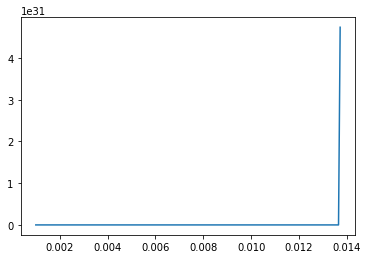

In [64]:
import matplotlib.pyplot as plt

plt.plot(expon_lr.rates, expon_lr.losses)

In [65]:
expon_lr.rates

[0.001,
 0.0010050001,
 0.001010025,
 0.0010150751,
 0.0010201505,
 0.0010252512,
 0.0010303775,
 0.0010355293,
 0.001040707,
 0.0010459105,
 0.00105114,
 0.0010563957,
 0.0010616777,
 0.0010669861,
 0.0010723211,
 0.0010776827,
 0.0010830711,
 0.0010884865,
 0.0010939289,
 0.0010993986,
 0.0011048956,
 0.0011104201,
 0.0011159722,
 0.0011215521,
 0.0011271598,
 0.0011327956,
 0.0011384595,
 0.0011441518,
 0.0011498726,
 0.001155622,
 0.0011614001,
 0.0011672071,
 0.0011730432,
 0.0011789084,
 0.001184803,
 0.001190727,
 0.0011966806,
 0.001202664,
 0.0012086773,
 0.0012147207,
 0.0012207943,
 0.0012268983,
 0.0012330328,
 0.0012391979,
 0.0012453939,
 0.0012516208,
 0.001257879,
 0.0012641683,
 0.0012704892,
 0.0012768416,
 0.0012832258,
 0.001289642,
 0.0012960902,
 0.0013025707,
 0.0013090835,
 0.001315629,
 0.0013222072,
 0.0013288182,
 0.0013354622,
 0.0013421396,
 0.0013488502,
 0.0013555945,
 0.0013623724,
 0.0013691842,
 0.0013760302,
 0.0013829103,
 0.0013898248,
 0.0013967738

In [66]:
expon_lr.losses

[98.02412414550781,
 151.72314453125,
 148.63958740234375,
 133.43844604492188,
 119.92765045166016,
 110.84058380126953,
 99.39385223388672,
 89.46501159667969,
 80.6410903930664,
 73.90681457519531,
 68.61809539794922,
 63.92599105834961,
 60.20570373535156,
 56.3277702331543,
 53.07382583618164,
 50.16809844970703,
 47.836456298828125,
 45.640403747558594,
 43.52691650390625,
 41.745086669921875,
 39.9770393371582,
 38.29879379272461,
 36.862457275390625,
 35.462669372558594,
 34.362422943115234,
 33.198970794677734,
 32.13033676147461,
 31.173006057739258,
 30.26560401916504,
 29.413846969604492,
 28.732053756713867,
 27.89839744567871,
 27.110015869140625,
 26.490554809570312,
 25.857620239257812,
 25.28847312927246,
 24.71000099182129,
 24.190765380859375,
 23.621225357055664,
 23.206378936767578,
 22.81227684020996,
 22.37611961364746,
 21.936229705810547,
 21.506134033203125,
 21.226686477661133,
 20.8671817779541,
 20.478275299072266,
 20.15571403503418,
 19.837596893310547,
 

최적의 학습률을 찾기 위한 방법으로  
>1. 1에폭동안 학습  
2. 학습을 한 번 할때마다 학습률에 일정 숫자를 곱하여 증가  
3. 로스가 갑자기 뛰어오르는 순간 포착  
4. 일반적으로 최적의 학습률은 그 지점보다 약 10배 낮은 지점이라고 함  
  
그래프를 띄우려 하는데 후반부의 로스가 무한이라 표현이 안됨.  
그래프에 제한을 주고 다시 띄워보겠음

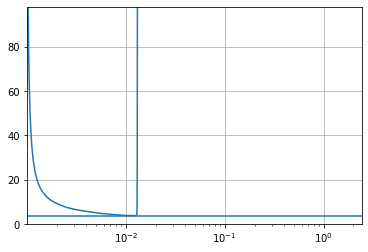

In [68]:
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale("log")
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
plt.grid()
plt.show()

In [71]:
min_loss = min(expon_lr.losses)
min_idx = expon_lr.losses.index(min_loss)
target_lr = expon_lr.rates[min_idx]
target_lr

0.012474591

In [75]:
opt_lr = target_lr/10
opt_lr

0.001247459091246128

해당 학습률을 기반으로 그리드서치해보겠음 (사실 모델의 구조에 따라 바꿔야 하지만.. 일단 귀찮으므로)

In [95]:
target_model = get_model(n_hidden=2, n_neu=200, lr=opt_lr)

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
h_1 (Dense)                  (None, 200)               157000    
_________________________________________________________________
h_2 (Dense)                  (None, 200)               40200     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2010      
Total params: 199,210
Trainable params: 199,210
Non-trainable params: 0
_________________________________________________________________


In [101]:
dir_name = "my_mnist_logs"
dir_path = os.path.join(os.curdir, dir_name)
if os.path.exists(dir_path):
    pass
else:
    os.mkdir(dir_path)

run_index = 5 # 실행할 때마다 이 값을 늘립니다
run_logdir = os.path.join(os.curdir, "my_mnist_logs", "run_{:03d}".format(run_index))
run_logdir

'.\\my_mnist_logs\\run_005'

In [97]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_mnist_model.h5", save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

hist = target_model.fit(x_train, y_train, epochs=100, batch_size=128,
                   validation_data=(x_val, y_val),
                   callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])

Epoch 1/100
391/391 [==============================] - 1s 3ms/step - loss: 2.2709 - accuracy: 0.1506 - val_loss: 2.0689 - val_accuracy: 0.4690
Epoch 2/100
391/391 [==============================] - 1s 1ms/step - loss: 2.0094 - accuracy: 0.5268 - val_loss: 1.7824 - val_accuracy: 0.6867
Epoch 3/100
391/391 [==============================] - 1s 1ms/step - loss: 1.7191 - accuracy: 0.6863 - val_loss: 1.4625 - val_accuracy: 0.7599
Epoch 4/100
391/391 [==============================] - 1s 1ms/step - loss: 1.4118 - accuracy: 0.7457 - val_loss: 1.1762 - val_accuracy: 0.8032
Epoch 5/100
391/391 [==============================] - 1s 1ms/step - loss: 1.1504 - accuracy: 0.7869 - val_loss: 0.9631 - val_accuracy: 0.8277
Epoch 6/100
391/391 [==============================] - 1s 1ms/step - loss: 0.9632 - accuracy: 0.8061 - val_loss: 0.8152 - val_accuracy: 0.8429
Epoch 7/100
391/391 [==============================] - 1s 1ms/step - loss: 0.8305 - accuracy: 0.8235 - val_loss: 0.7124 - val_accuracy: 0.8539

Epoch 58/100
391/391 [==============================] - 1s 1ms/step - loss: 0.2817 - accuracy: 0.9214 - val_loss: 0.2598 - val_accuracy: 0.9258
Epoch 59/100
391/391 [==============================] - 1s 1ms/step - loss: 0.2814 - accuracy: 0.9193 - val_loss: 0.2582 - val_accuracy: 0.9263
Epoch 60/100
391/391 [==============================] - 1s 1ms/step - loss: 0.2729 - accuracy: 0.9232 - val_loss: 0.2570 - val_accuracy: 0.9264
Epoch 61/100
391/391 [==============================] - 1s 1ms/step - loss: 0.2751 - accuracy: 0.9229 - val_loss: 0.2556 - val_accuracy: 0.9267
Epoch 62/100
391/391 [==============================] - 1s 1ms/step - loss: 0.2803 - accuracy: 0.9210 - val_loss: 0.2544 - val_accuracy: 0.9281
Epoch 63/100
391/391 [==============================] - 1s 1ms/step - loss: 0.2698 - accuracy: 0.9232 - val_loss: 0.2528 - val_accuracy: 0.9277
Epoch 64/100
391/391 [==============================] - 1s 1ms/step - loss: 0.2641 - accuracy: 0.9244 - val_loss: 0.2519 - val_accuracy:

In [85]:
x_train.shape

(50000, 28, 28)

In [86]:
x_val.shape

(0, 28, 28)

In [87]:
x_train_full.shape

(60000, 28, 28)

In [100]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=3e-1),
              metrics=["accuracy"])

In [102]:
hist = model.fit(x_train, y_train, epochs=100, batch_size=128,
                   validation_data=(x_val, y_val),
                   callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])

Epoch 1/100
391/391 [==============================] - 1s 2ms/step - loss: 0.5986 - accuracy: 0.8171 - val_loss: 0.1478 - val_accuracy: 0.9582
Epoch 2/100
391/391 [==============================] - 1s 2ms/step - loss: 0.1354 - accuracy: 0.9579 - val_loss: 0.1018 - val_accuracy: 0.9699
Epoch 3/100
391/391 [==============================] - 1s 1ms/step - loss: 0.0900 - accuracy: 0.9732 - val_loss: 0.1196 - val_accuracy: 0.9647
Epoch 4/100
391/391 [==============================] - 1s 2ms/step - loss: 0.0636 - accuracy: 0.9819 - val_loss: 0.0826 - val_accuracy: 0.9757
Epoch 5/100
391/391 [==============================] - 1s 2ms/step - loss: 0.0458 - accuracy: 0.9867 - val_loss: 0.0954 - val_accuracy: 0.9716
Epoch 6/100
391/391 [==============================] - 1s 2ms/step - loss: 0.0360 - accuracy: 0.9894 - val_loss: 0.0763 - val_accuracy: 0.9768
Epoch 7/100
391/391 [==============================] - 1s 1ms/step - loss: 0.0273 - accuracy: 0.9920 - val_loss: 0.1108 - val_accuracy: 0.9678

층의 갯수와 뉴런 총 갯수는 똑같은데 학습률과 층당 뉴런수가 달라서 성능이 차이남.  
정말 알다가도 모르겠음. 병목 구조로 만들어야 하는건가??